In [63]:
library(data.table)

# Introduction

In this homework, CBF dataset will be used. The main of homework is to try different time series representation techniques to compare their performance. In addition, different validation technique will be used by knowing existing dataset includes timeseries. In this technique k'th points will be selected as test dataset for validation. In Task 1, Genlasso with default k fold validation will be used. This situation is also mentioned **in homework description and lecture.** So, manuel fold selection will be applied in only task 2, Regression Tree. By using this validation, the best lambda value for the first task, and the best max_depth value for the second task tried to be achieved. For both model, how to model created will be described in the first parts of the tasks. 

At task 3, performance comparison will be behold. In order to achieve this objective, a boxplot will be used. Moreover, 1-NN will be also tried at task 4 to understand how much models find proper points for representations. At the end of task 4, two separate accuracy numbers and tables will be obtained.

# Context
(In order to get specified techniques rapidly, a context part is added to Notebook.)

1. [Data Preparation](#1)
1. [Task 1: Genlasso](#2)
1. [Task 2: Regression Tree with customized Validation](#3)
1. [Task 3: Performance Comparison by Boxplot](#4)
1. [Task 4: Accuracy with 1-NN](#5)
1. [Last Comment and Conclusion](#6)

<a id="1"></a>
# Data Preparation

In [2]:
set.seed(35)

In [3]:
train=fread("CBF/CBF_TRAIN.txt")
test=fread("CBF/CBF_TEST.txt")

In [4]:
str(train)

Classes 'data.table' and 'data.frame':	30 obs. of  129 variables:
 $ V1  : num  1 1 1 3 2 2 1 3 2 1 ...
 $ V2  : num  -0.464 -0.897 -0.465 -0.187 -1.136 ...
 $ V3  : num  -0.555 -0.686 -0.568 -0.621 -1.319 ...
 $ V4  : num  -0.843 -1.351 -0.032 -0.816 -1.845 ...
 $ V5  : num  -0.866 -1.459 -0.635 -0.521 -0.789 ...
 $ V6  : num  -0.936 -1.165 -0.603 -0.79 -0.252 ...
 $ V7  : num  -0.817 -1.404 -0.267 -0.968 -1.488 ...
 $ V8  : num  -0.264 -1.822 -0.267 -1.487 -0.669 ...
 $ V9  : num  -1.258 -0.832 -0.931 -0.278 -0.34 ...
 $ V10 : num  -1.25 -1.016 -0.449 -0.835 -1.046 ...
 $ V11 : num  -0.9183 -0.8035 -0.7213 0.0506 -0.3122 ...
 $ V12 : num  -0.922 -1.26 -0.397 -0.811 -1.031 ...
 $ V13 : num  -0.984 -1.139 -0.962 -1.226 -1.201 ...
 $ V14 : num  -1.288 -0.879 -1.421 -0.668 -0.65 ...
 $ V15 : num  -1.143 -1.549 -0.783 -0.777 -1.62 ...
 $ V16 : num  -1.0489 -0.9242 -0.4624 0.0641 -0.4128 ...
 $ V17 : num  -0.365 -1.395 -1.176 -1.254 -1.051 ...
 $ V18 : num  -0.691 0.777 -0.502 -0.789 -1.17

<a id="2"></a>
# Task 1: Genlasso

In [62]:
library("genlasso", quietly = TRUE)

## Values of i'th index Time Series

In [6]:
value_obtainer=function(dataset, index){
    return (as.numeric(dataset[index,2:129]))
}

## Fused Lasso Function

In [7]:
fused_results=vector("list", 30)

By using fused_results list, performance of 30 timeseries will be stored.

In [8]:
fused_lasso=function(dataset, index, control=0){
    result = trendfilter(value_obtainer(train, index), ord=0) 
    cv = cv.trendfilter(result)   
    plot(cv)#Performance of the lambda values
    print(paste0(index,". Timeseries") )
    print(paste0("Lambda Value of ",index,". dataset for min value: ", cv$lambda.min))
    print(paste0("Lambda Value of ",index,". dataset for 1se value: ", cv$lambda.1se))
    sqrt(seq(1:500000)**2)# In order to get aligned plots with results.(Time consumption)
    
    plot(result, lambda=cv$lambda.min, main=paste0("Plot of ", index,". Timeseries with lambda min parameter"))  

    if(control==1){
        sqrt(seq(1:500000)**2)
        return(result)
    } 
    return(list(result, cv))
}

value_obtainer with ord=0 equals to fusedlasso1d. After getting this value, cv is used to get best lambda value. After getting this value, perfomance of model by considering lambda value will be inspected by looking plot(cv) graph. In order to get best model, lambda.1se will be used as model input for all timeseries. In addition, both lambda.min and lambda.1se will be written before the plots.

## Example Result

For example code, first timeseries will be modeled by mentioned function.

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "1. Timeseries"
[1] "Lambda Value of 1. dataset for min value: 0.5087665975"
[1] "Lambda Value of 1. dataset for 1se value: 2.74044973866672"


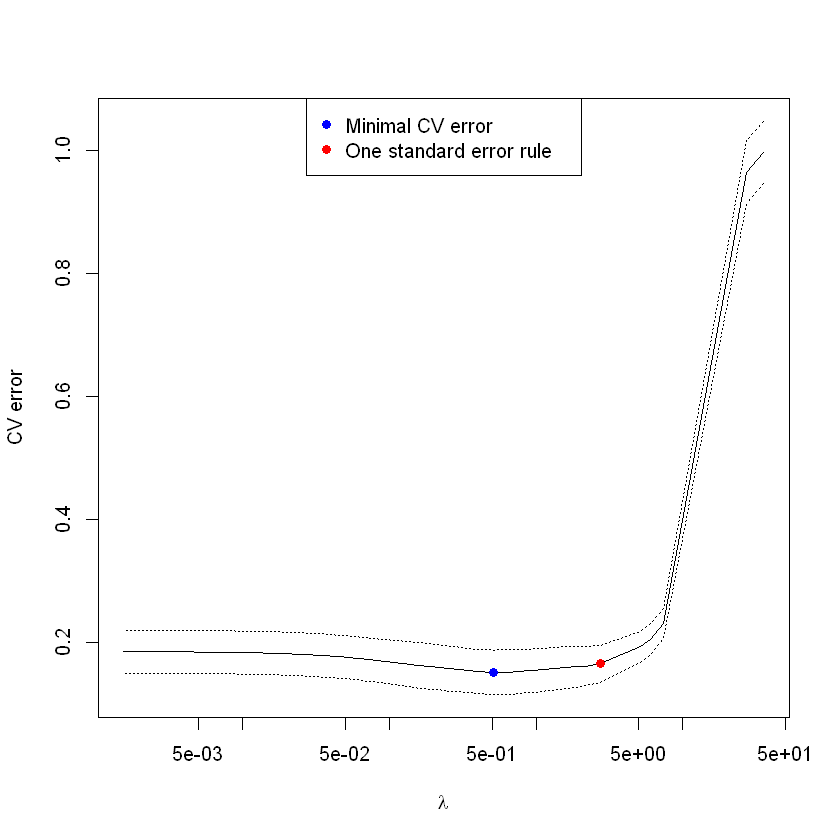

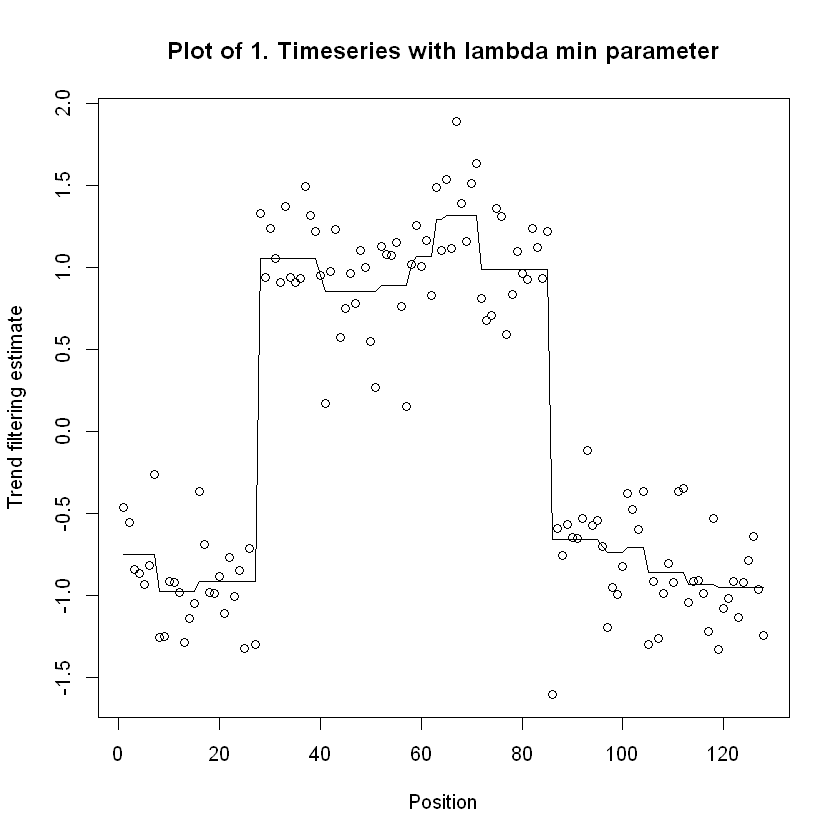

In [9]:
fused_results[[1]]=fused_lasso(train, 1, 0)

At the beginning, name of the timeseries and 2 lambda values are written. In addition, plot of lambda values are also displayed to understand which lambda value can be better option. As mentioned, lambda.min value will be used for all time series, and both graphs for all timeseries will be displayed by using for loop. In addition, manuel validation was not applied to this model because demanded validation technique is existing in genlasso **is mentioned in homework description and lecture.** In evaluation, this fact must be considered.

## Results of Task 1 for All Time Series

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "1. Timeseries"
[1] "Lambda Value of 1. dataset for min value: 0.5087665975"
[1] "Lambda Value of 1. dataset for 1se value: 2.74044973866672"


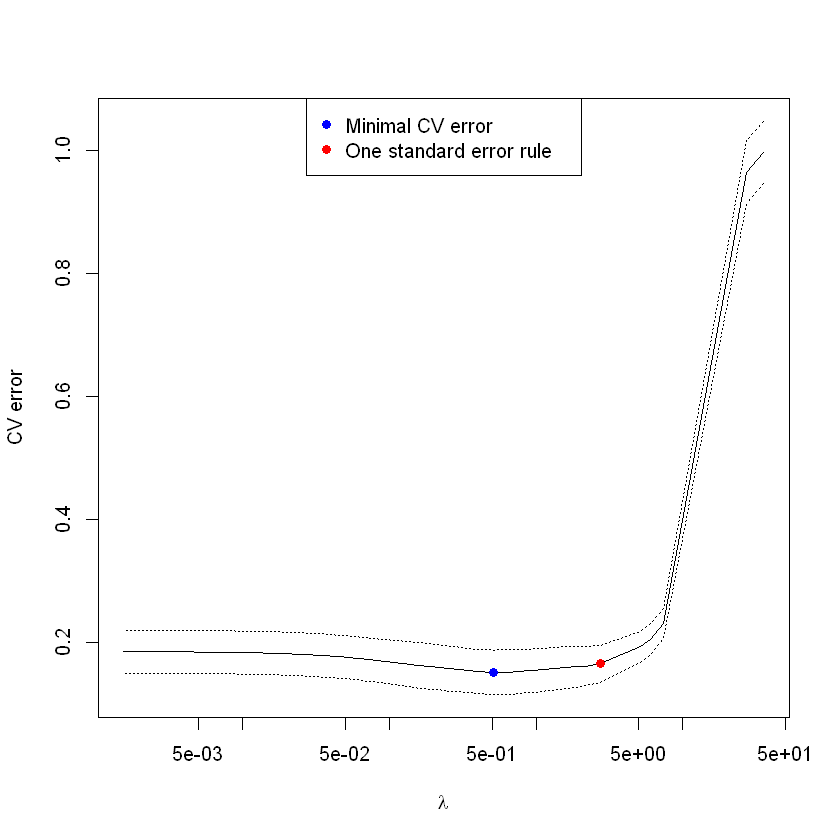

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


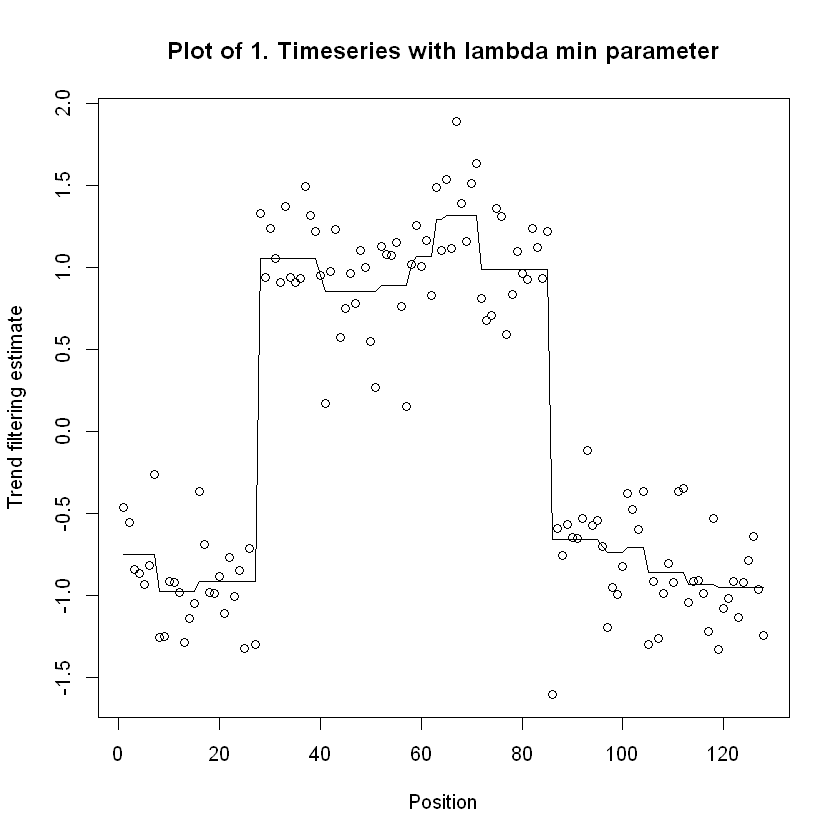

[1] "2. Timeseries"
[1] "Lambda Value of 2. dataset for min value: 1.54482427000001"
[1] "Lambda Value of 2. dataset for 1se value: 3.68318913770684"


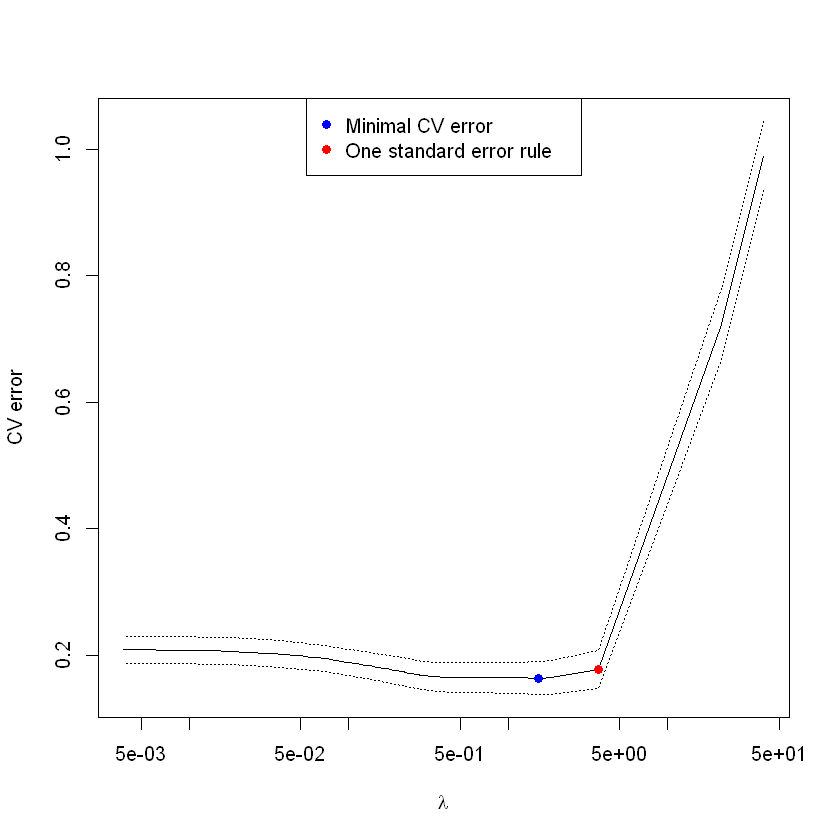

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


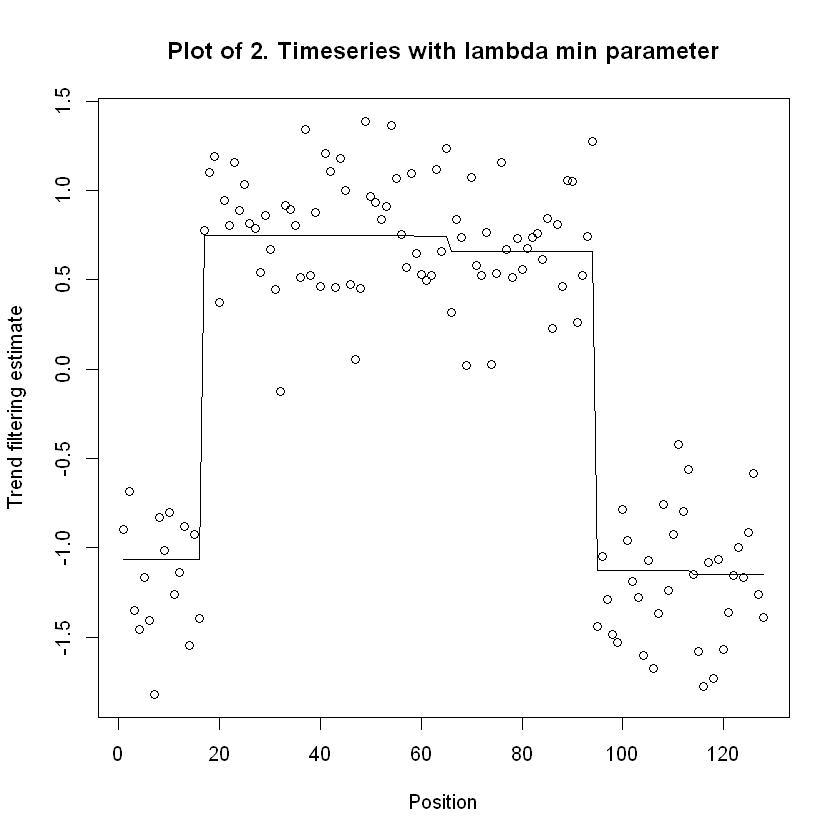

[1] "3. Timeseries"
[1] "Lambda Value of 3. dataset for min value: 0.673140352142856"
[1] "Lambda Value of 3. dataset for 1se value: 1.76711718240919"


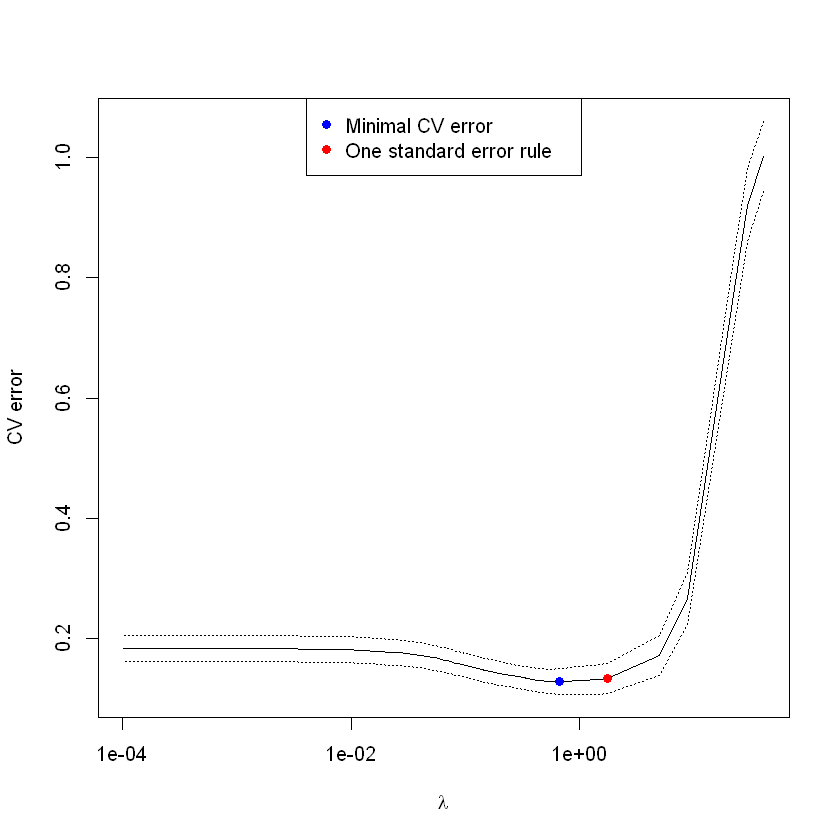

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


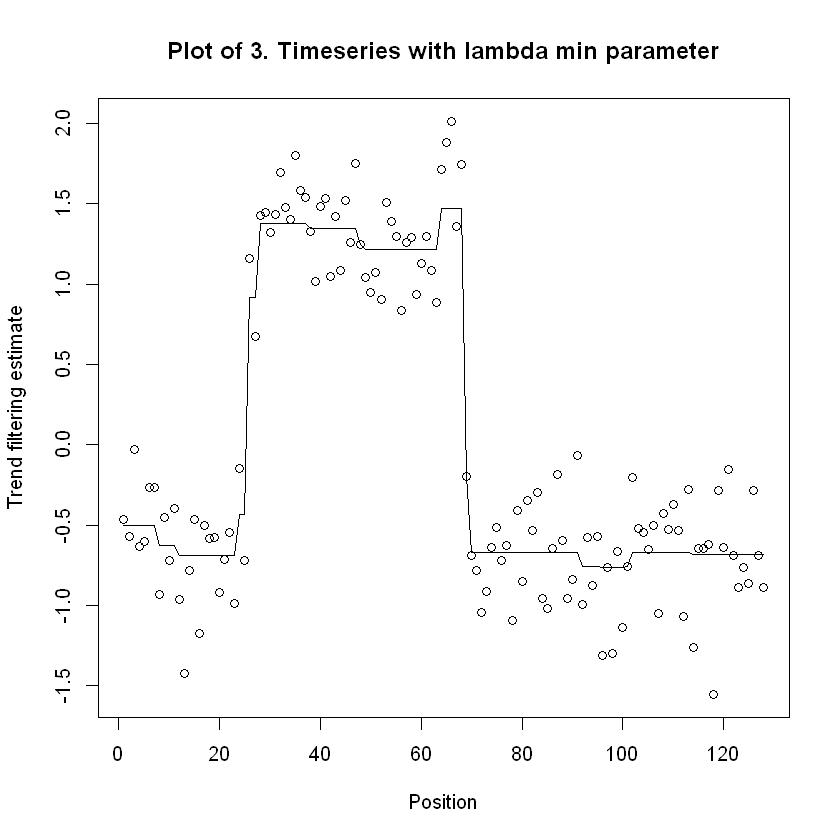

[1] "4. Timeseries"
[1] "Lambda Value of 4. dataset for min value: 1.21465872541667"
[1] "Lambda Value of 4. dataset for 1se value: 2.79903382499999"


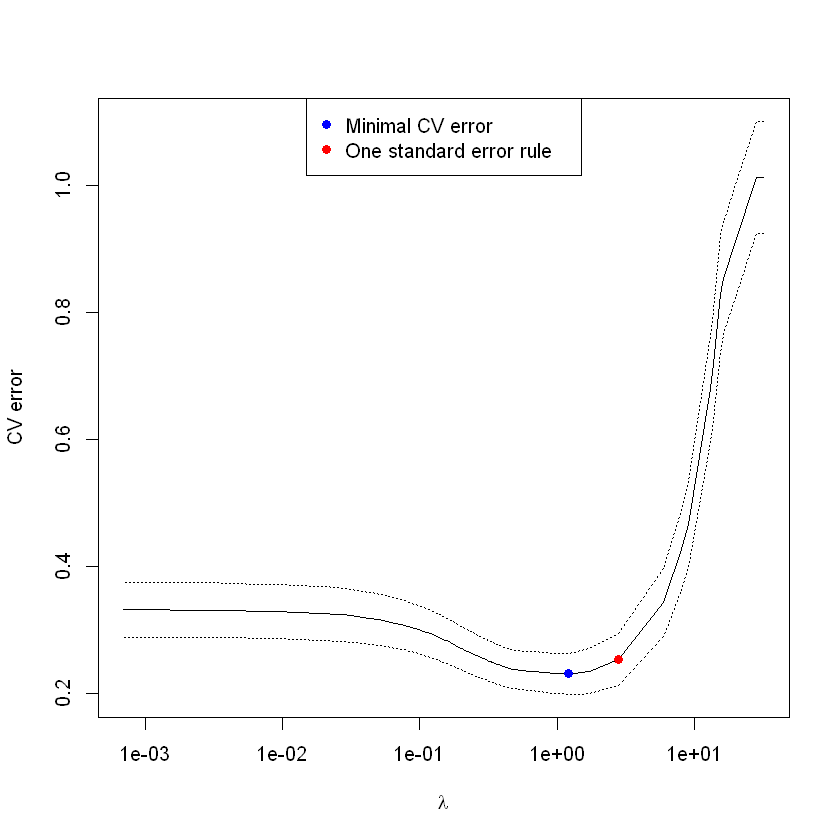

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


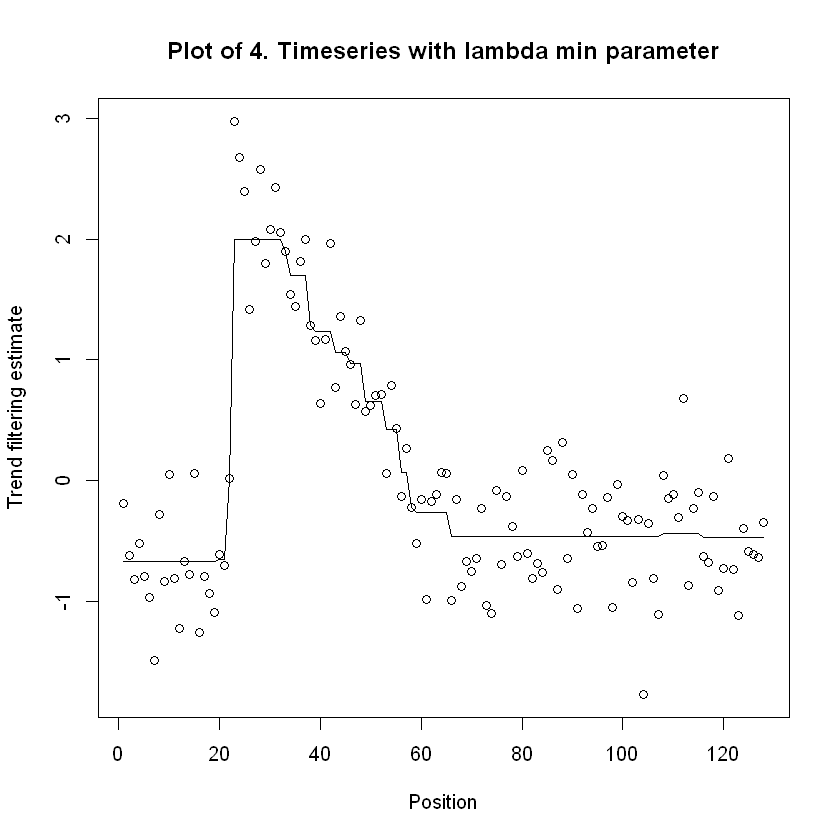

[1] "5. Timeseries"
[1] "Lambda Value of 5. dataset for min value: 1.02161963043478"
[1] "Lambda Value of 5. dataset for 1se value: 3.32583449999999"


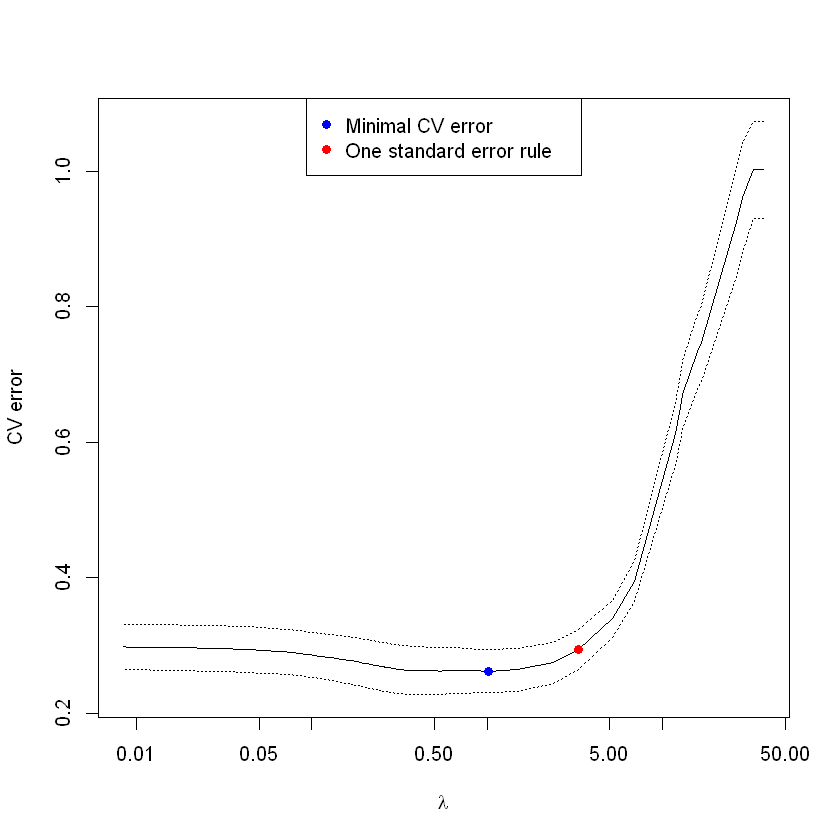

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


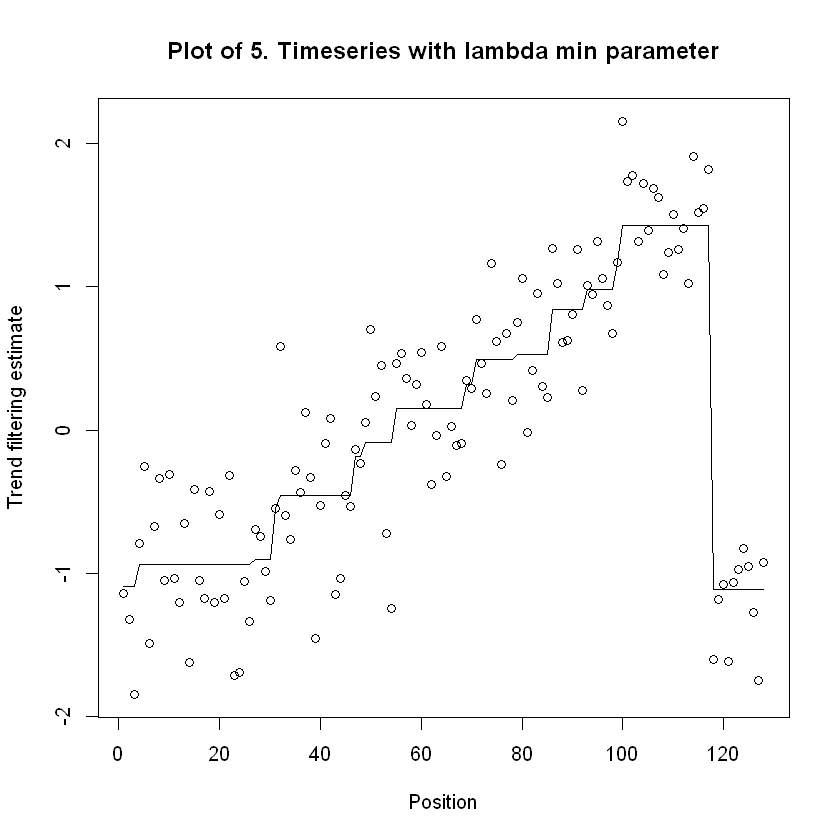

[1] "6. Timeseries"
[1] "Lambda Value of 6. dataset for min value: 1.35417875325"
[1] "Lambda Value of 6. dataset for 1se value: 2.87431018214808"


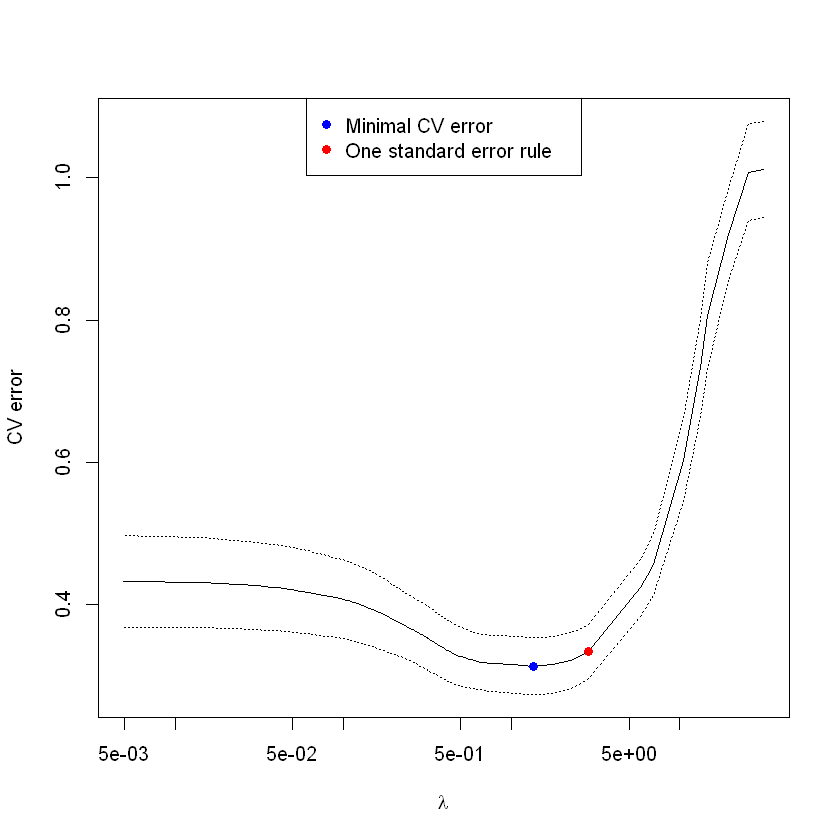

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


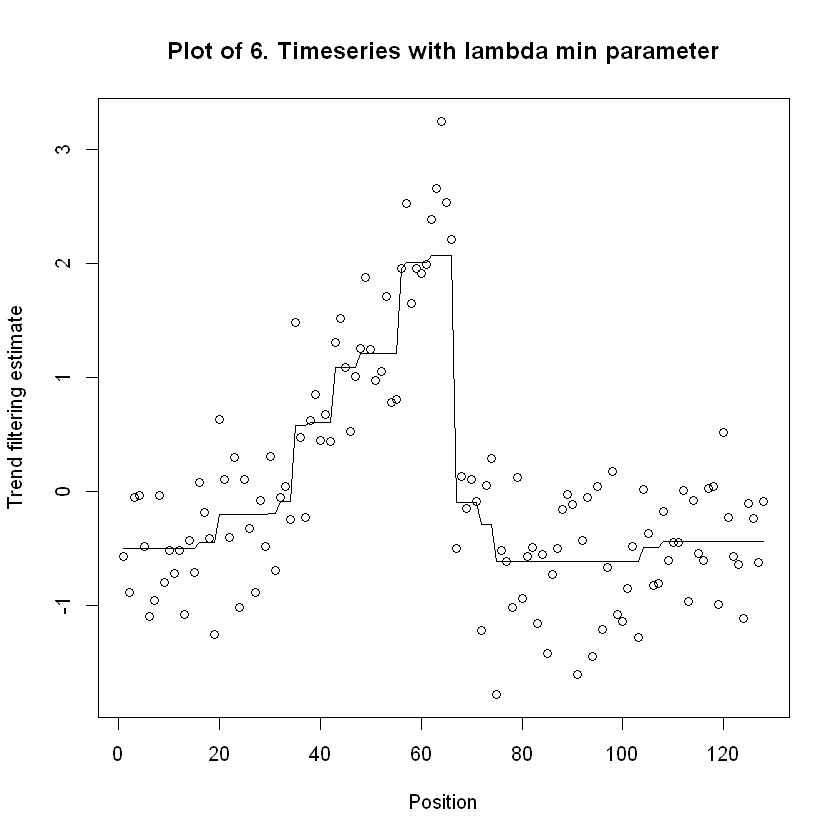

[1] "7. Timeseries"
[1] "Lambda Value of 7. dataset for min value: 1.22983253178571"
[1] "Lambda Value of 7. dataset for 1se value: 2.70999707599999"


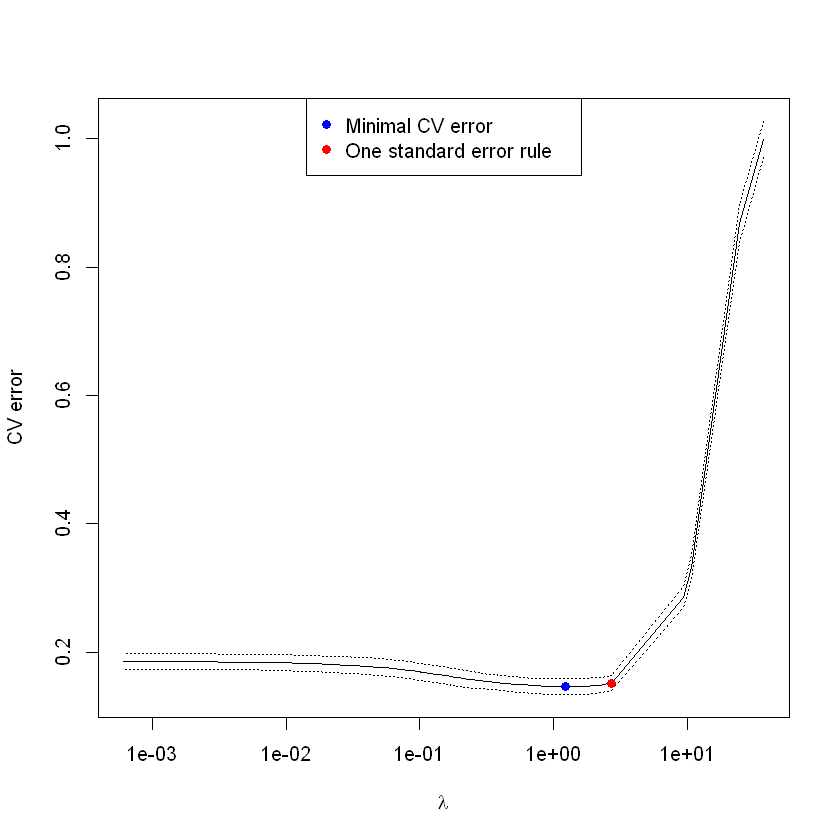

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


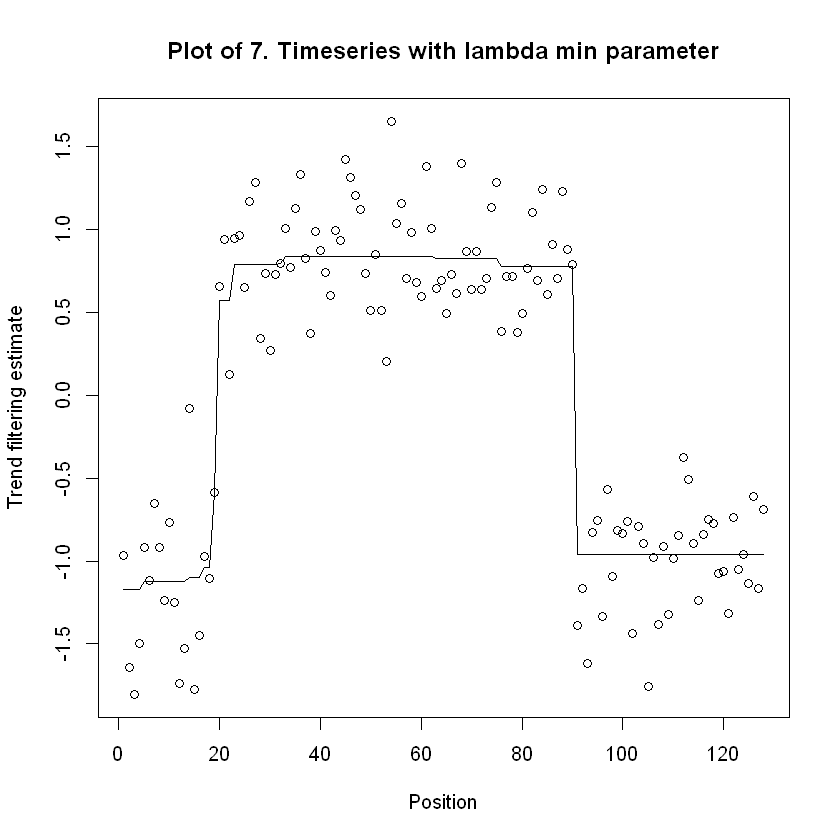

[1] "8. Timeseries"
[1] "Lambda Value of 8. dataset for min value: 1.12426292142857"
[1] "Lambda Value of 8. dataset for 1se value: 2.58996471857142"


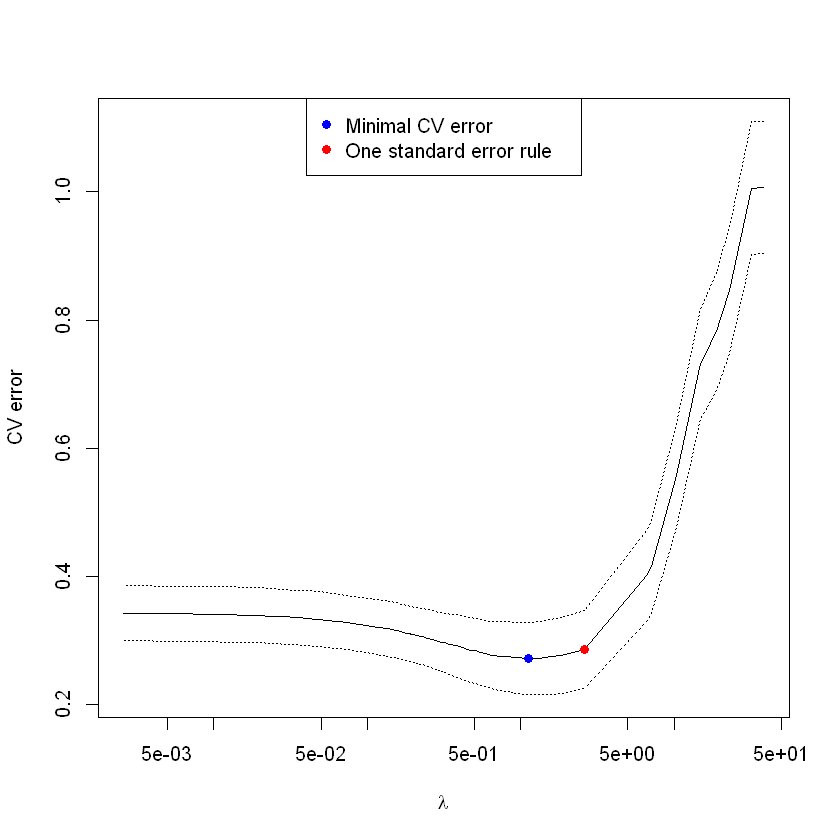

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


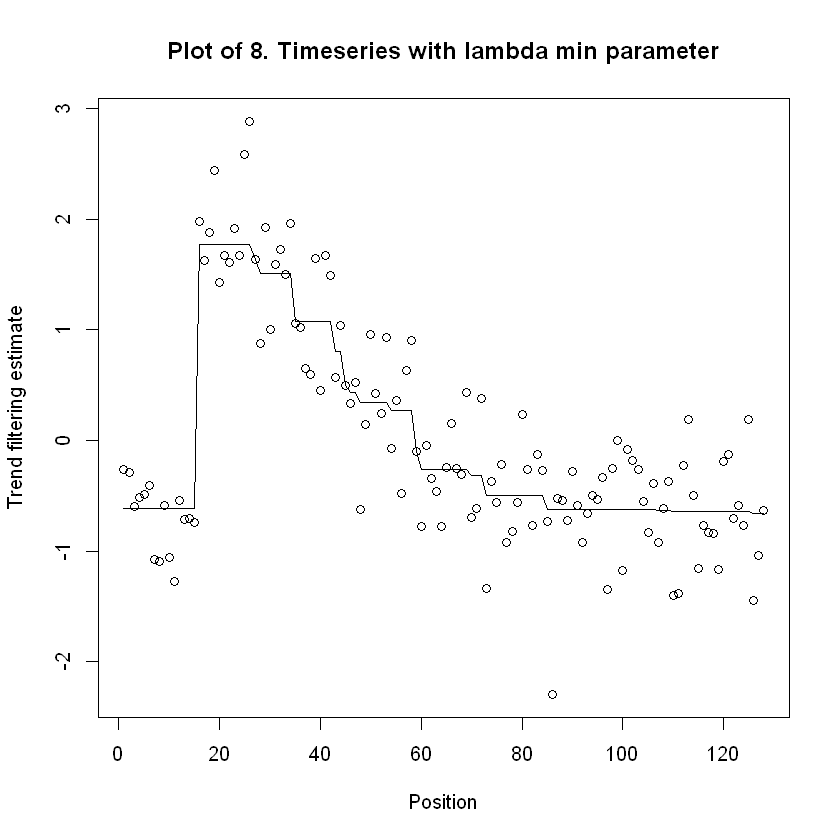

[1] "9. Timeseries"
[1] "Lambda Value of 9. dataset for min value: 1.01200804"
[1] "Lambda Value of 9. dataset for 1se value: 2.11069420000001"


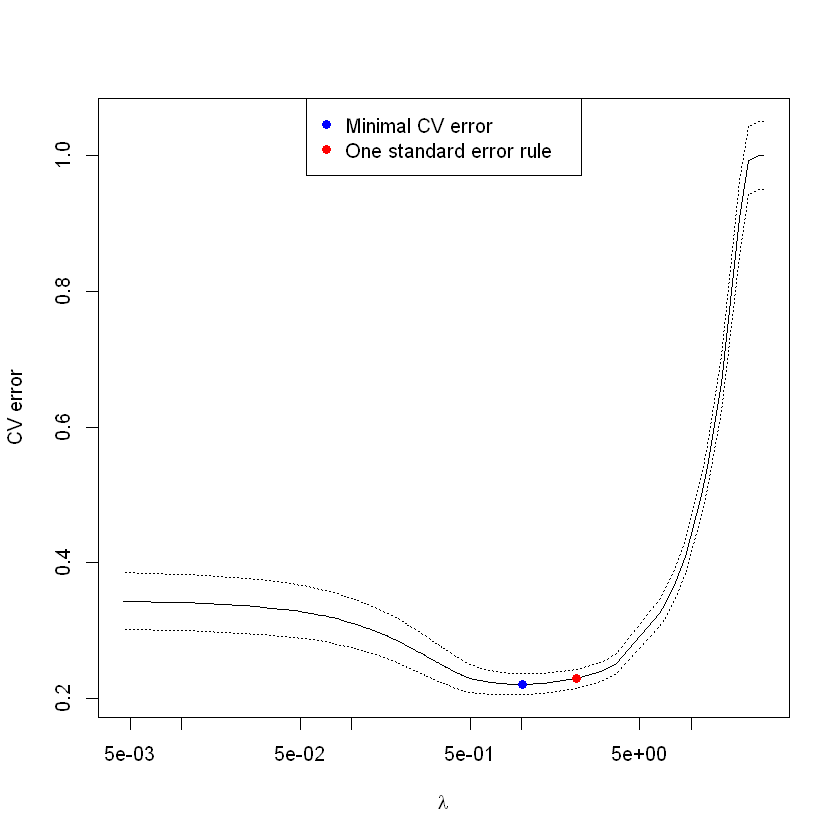

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


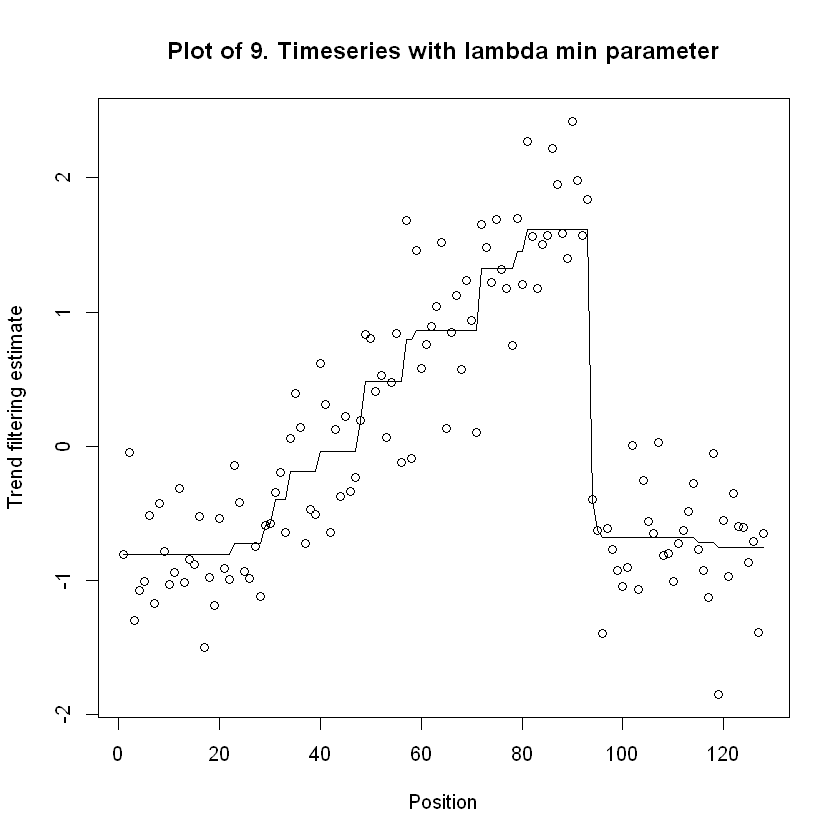

[1] "10. Timeseries"
[1] "Lambda Value of 10. dataset for min value: 0.155083875"
[1] "Lambda Value of 10. dataset for 1se value: 2.26862352833336"


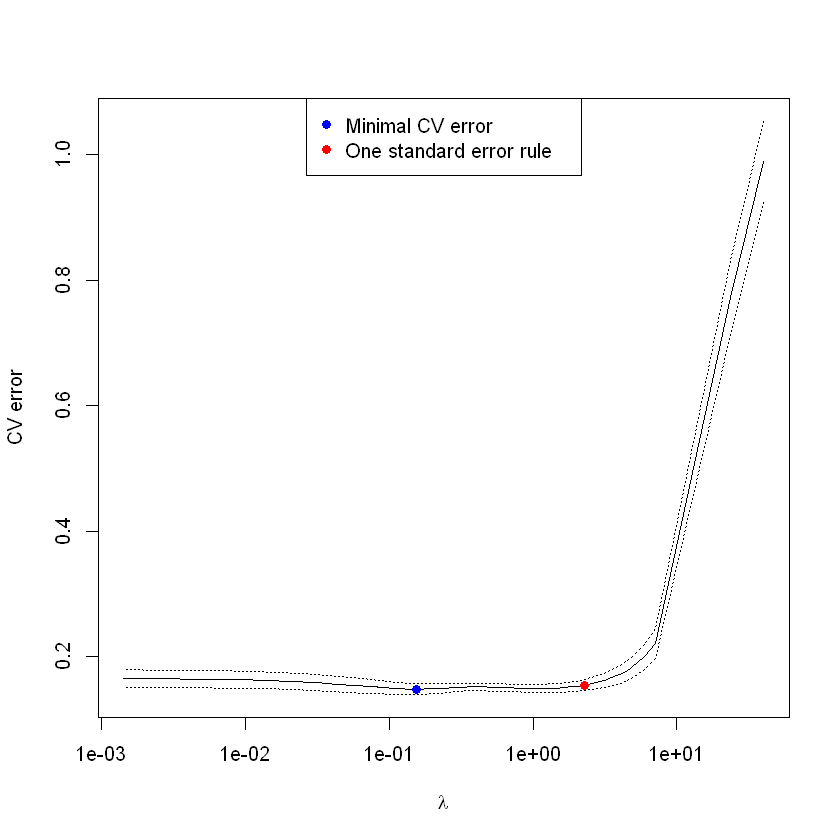

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


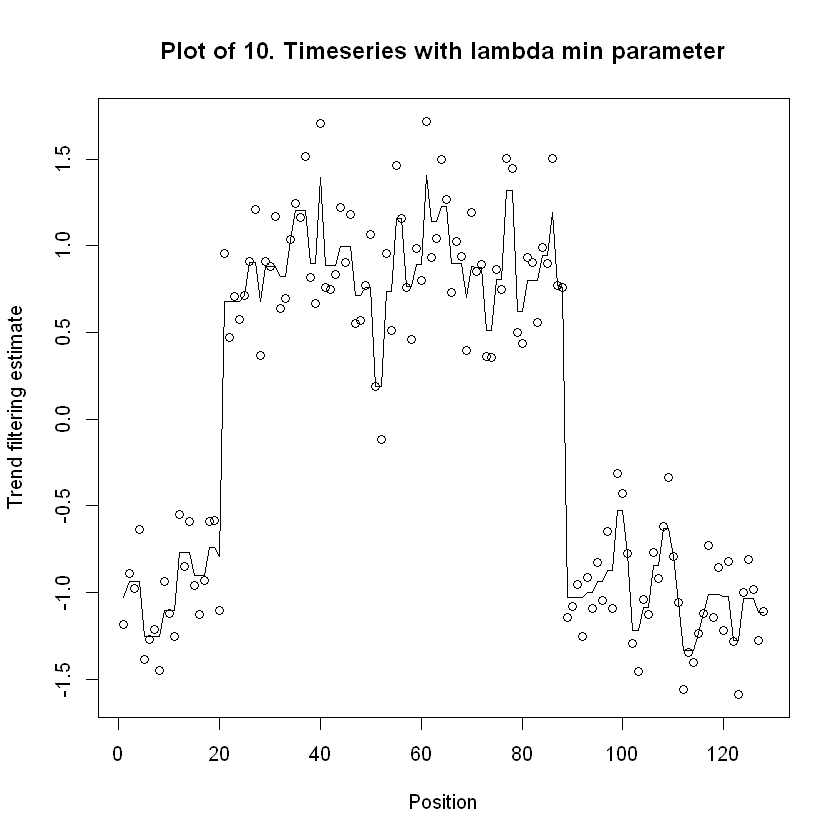

[1] "11. Timeseries"
[1] "Lambda Value of 11. dataset for min value: 0.987385322857142"
[1] "Lambda Value of 11. dataset for 1se value: 4.25619744999999"


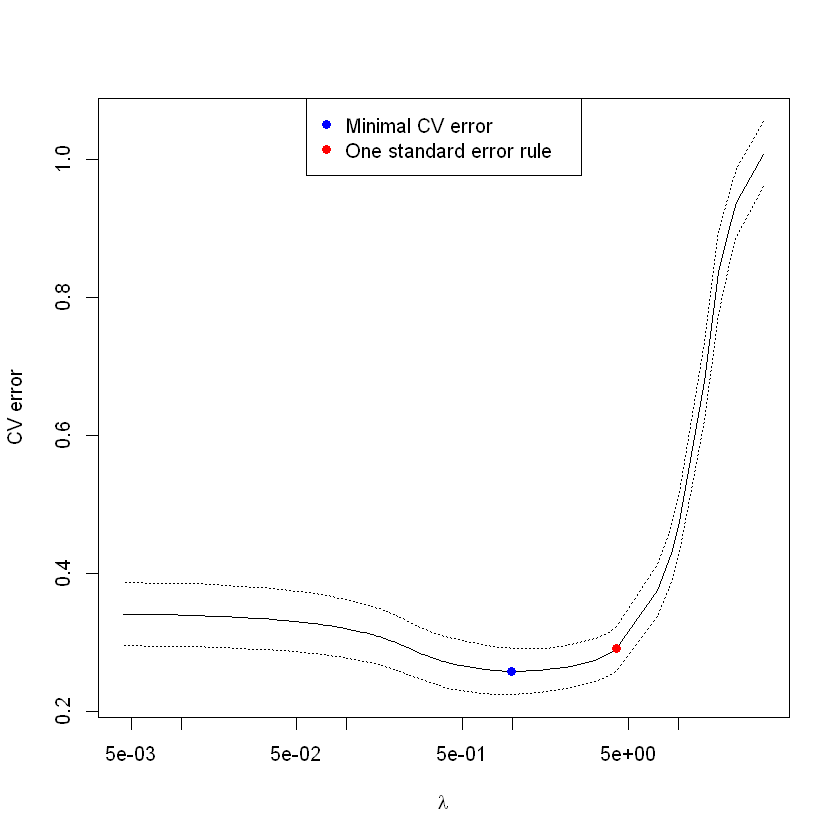

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


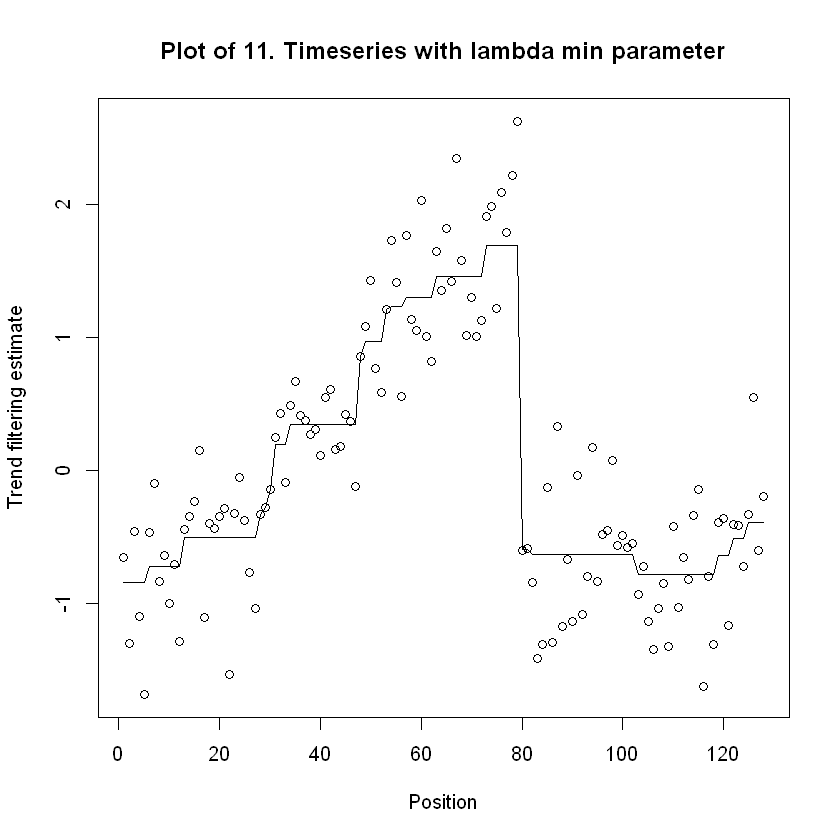

[1] "12. Timeseries"
[1] "Lambda Value of 12. dataset for min value: 0.836120653823529"
[1] "Lambda Value of 12. dataset for 1se value: 3.17205142211764"


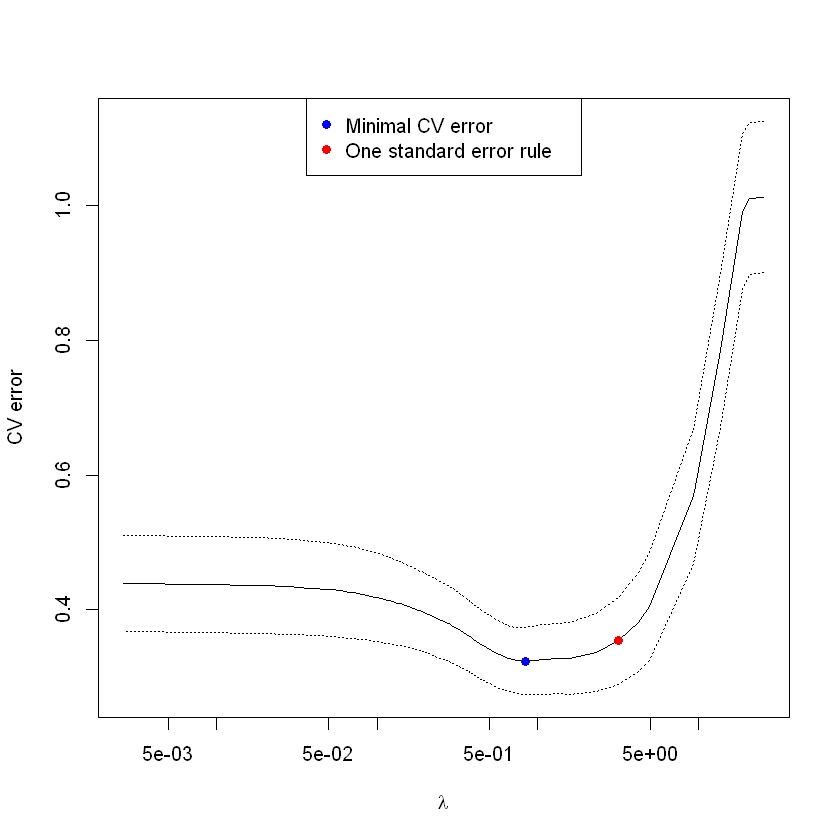

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


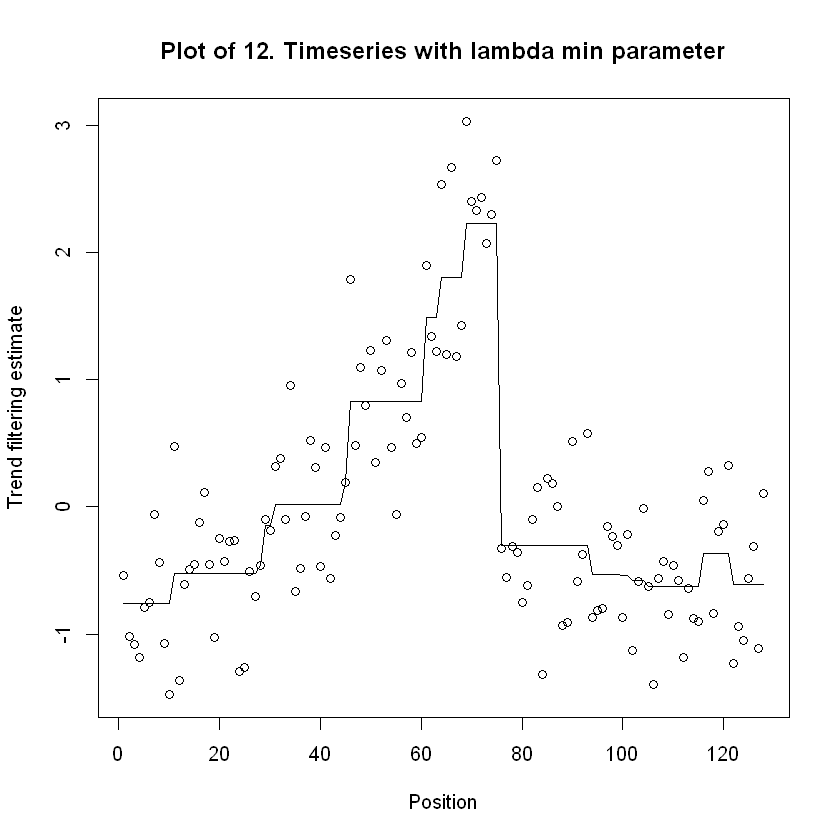

[1] "13. Timeseries"
[1] "Lambda Value of 13. dataset for min value: 1.2025240679"
[1] "Lambda Value of 13. dataset for 1se value: 1.28094162973215"


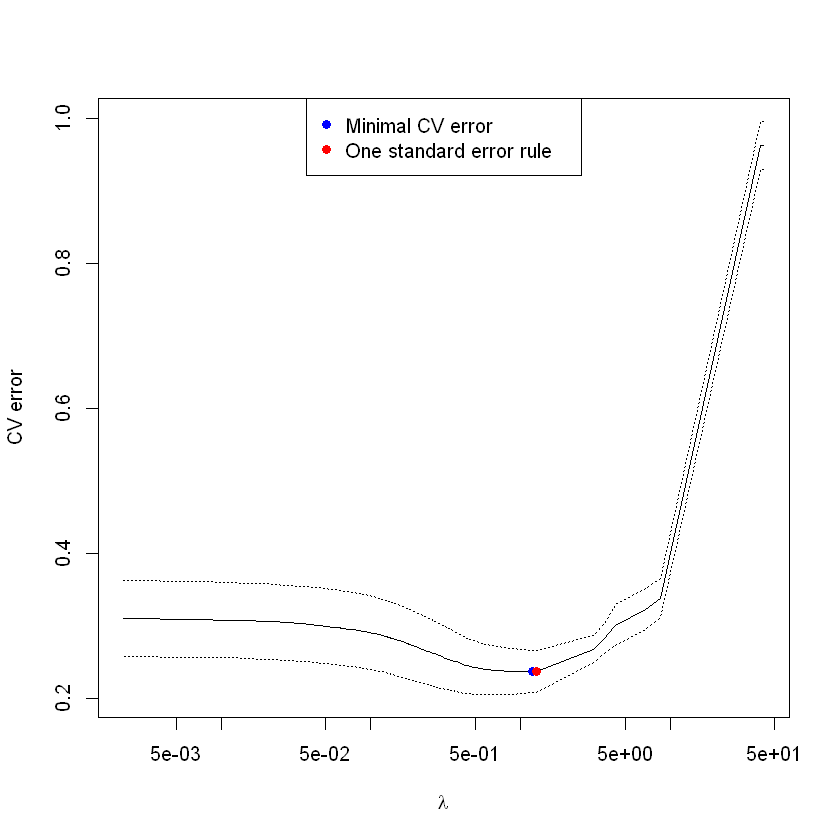

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


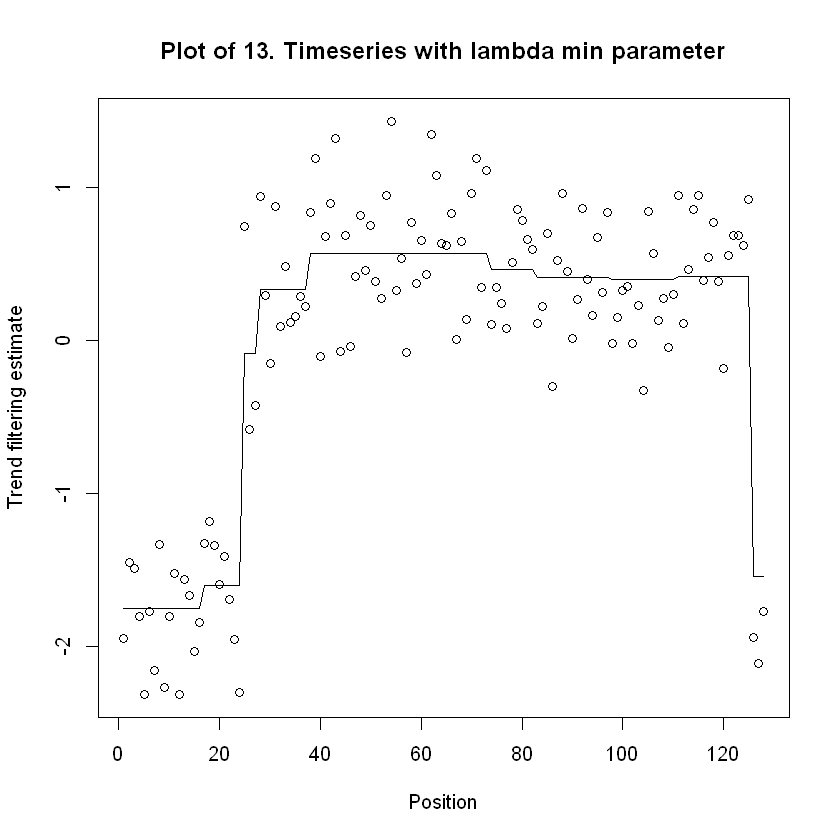

[1] "14. Timeseries"
[1] "Lambda Value of 14. dataset for min value: 0.947380811999998"
[1] "Lambda Value of 14. dataset for 1se value: 3.31463047399993"


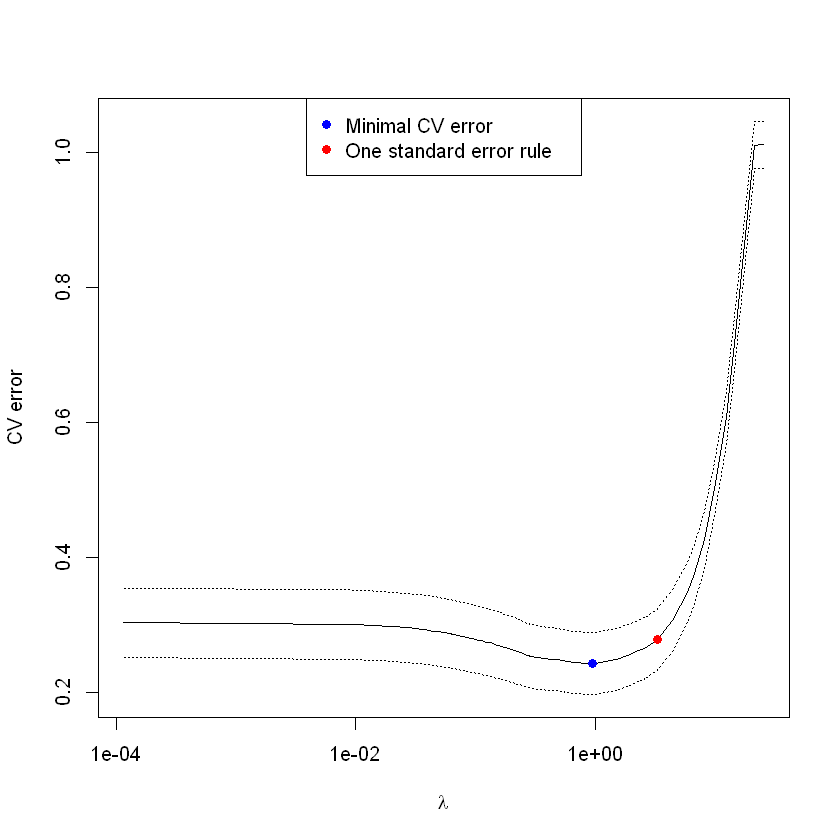

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


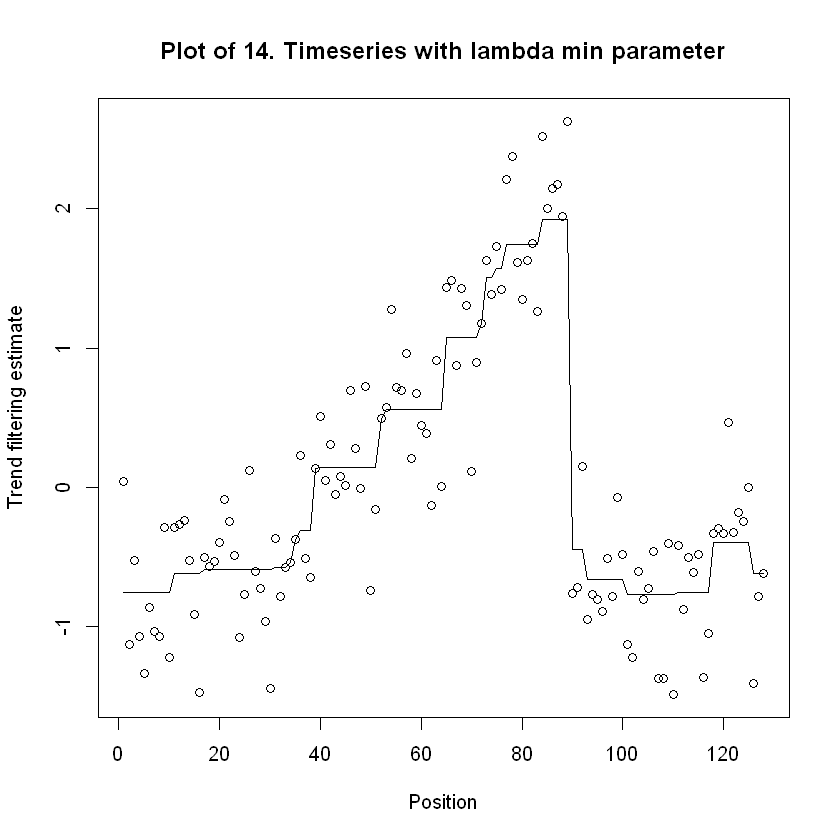

[1] "15. Timeseries"
[1] "Lambda Value of 15. dataset for min value: 1.04626645"
[1] "Lambda Value of 15. dataset for 1se value: 3.542481695"


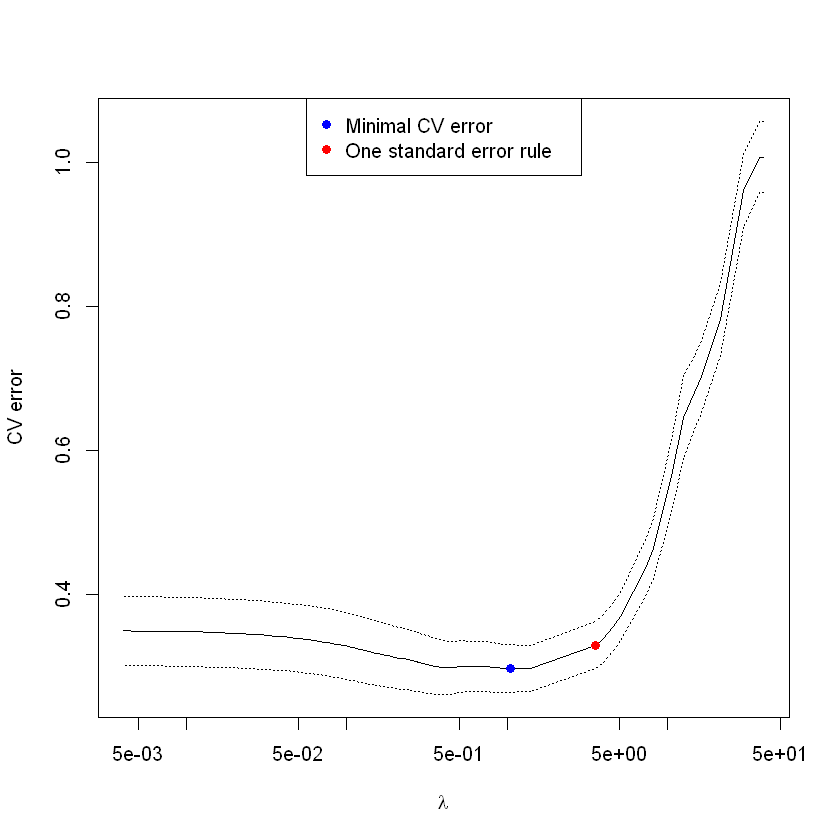

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


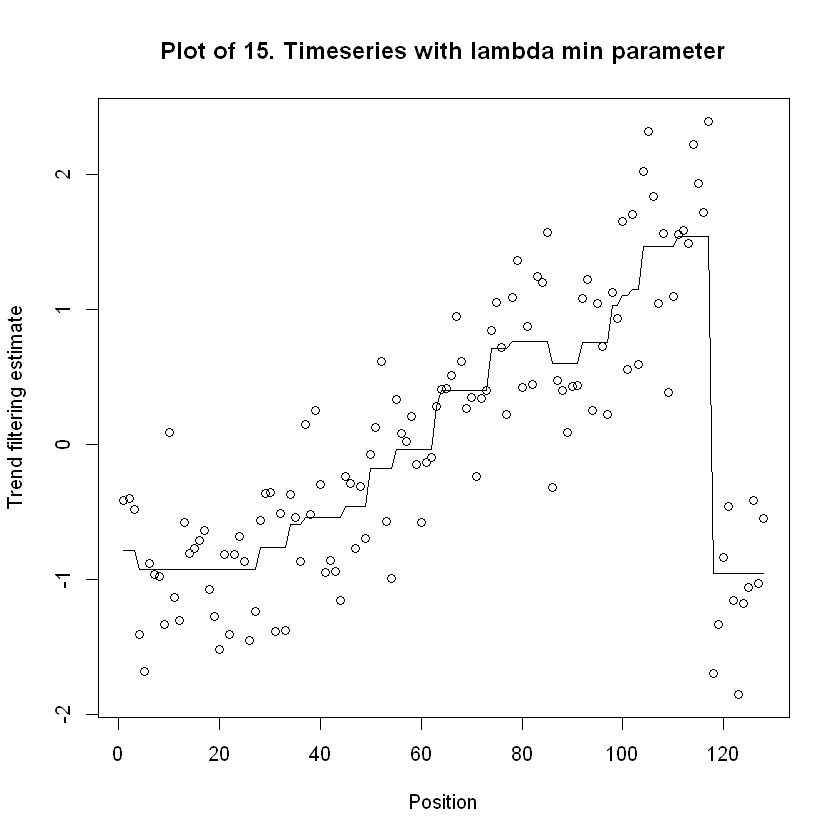

[1] "16. Timeseries"
[1] "Lambda Value of 16. dataset for min value: 0.976470802857144"
[1] "Lambda Value of 16. dataset for 1se value: 3.85010511666666"


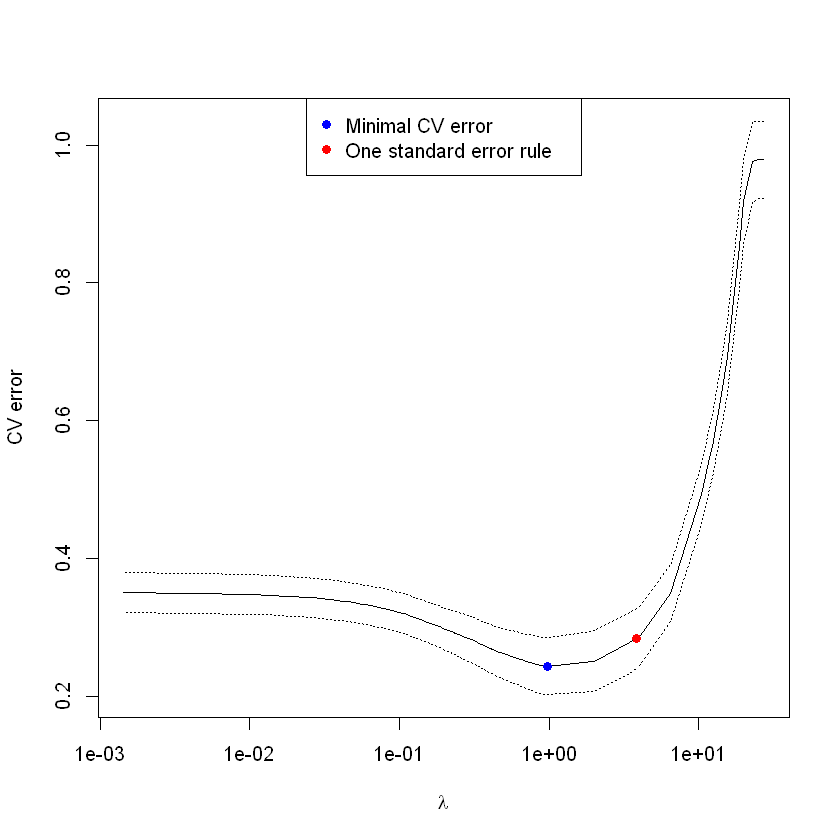

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


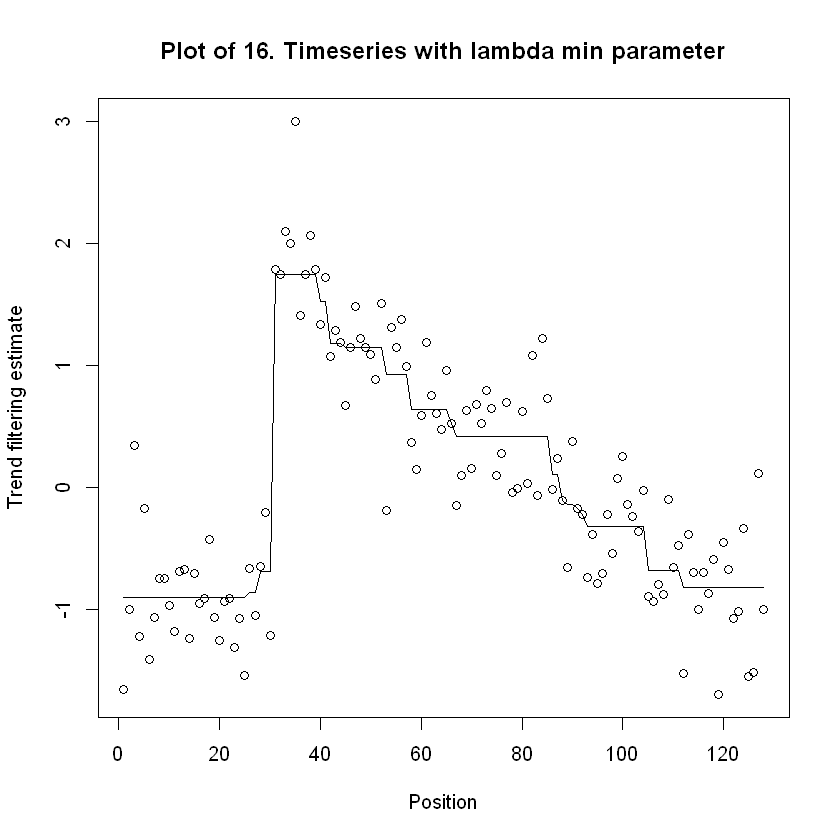

[1] "17. Timeseries"
[1] "Lambda Value of 17. dataset for min value: 0.599057512"
[1] "Lambda Value of 17. dataset for 1se value: 1.72319757369231"


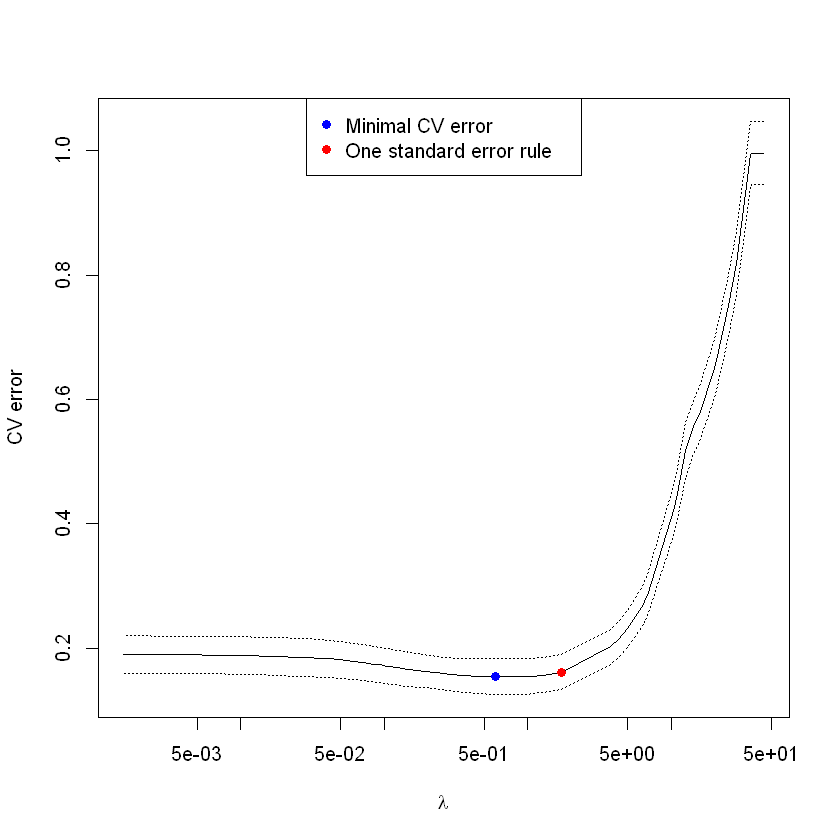

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


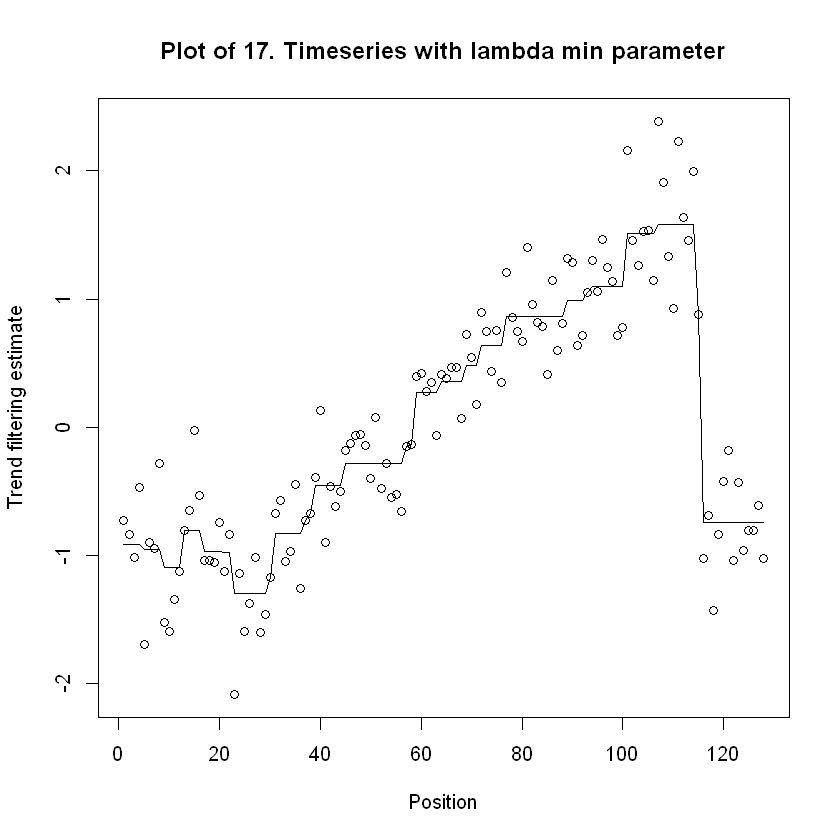

[1] "18. Timeseries"
[1] "Lambda Value of 18. dataset for min value: 1.019046925"
[1] "Lambda Value of 18. dataset for 1se value: 3.54746912999999"


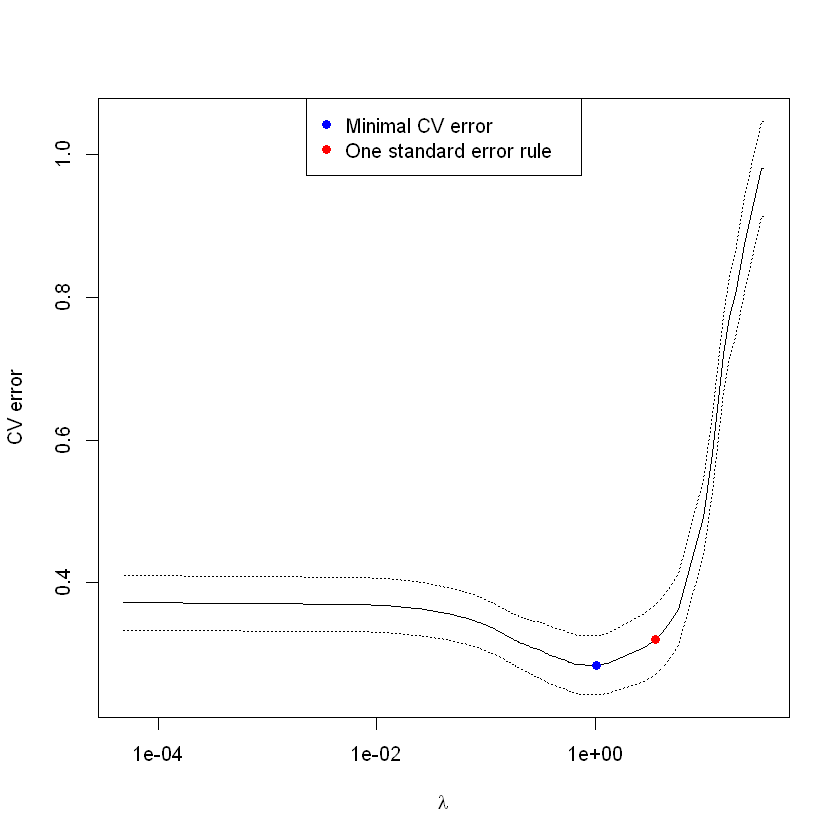

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


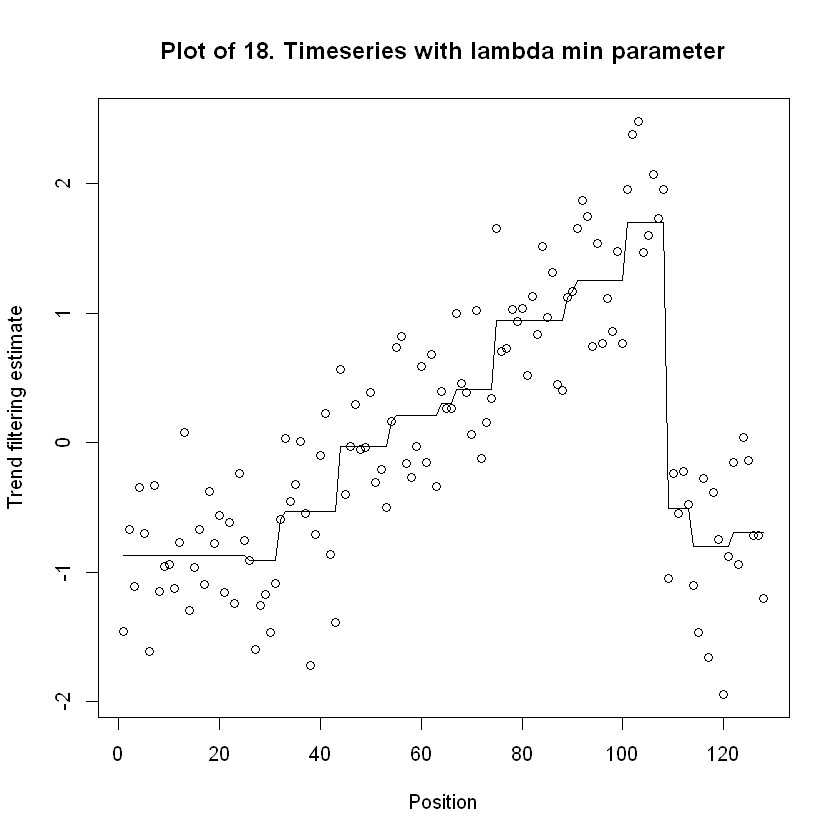

[1] "19. Timeseries"
[1] "Lambda Value of 19. dataset for min value: 0.970683237333312"
[1] "Lambda Value of 19. dataset for 1se value: 2.89434150000001"


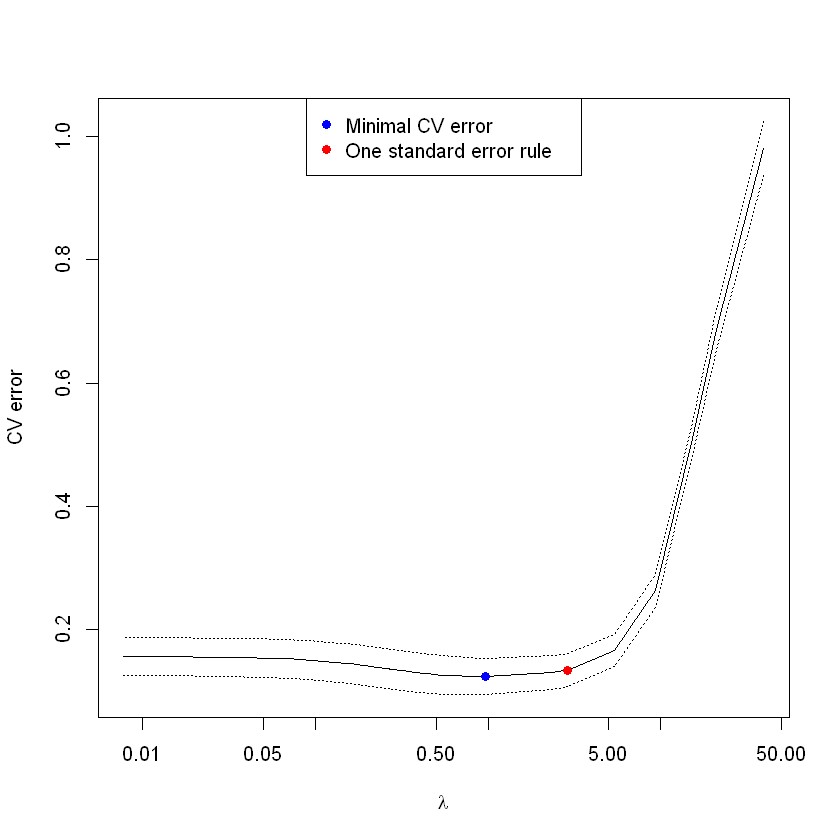

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


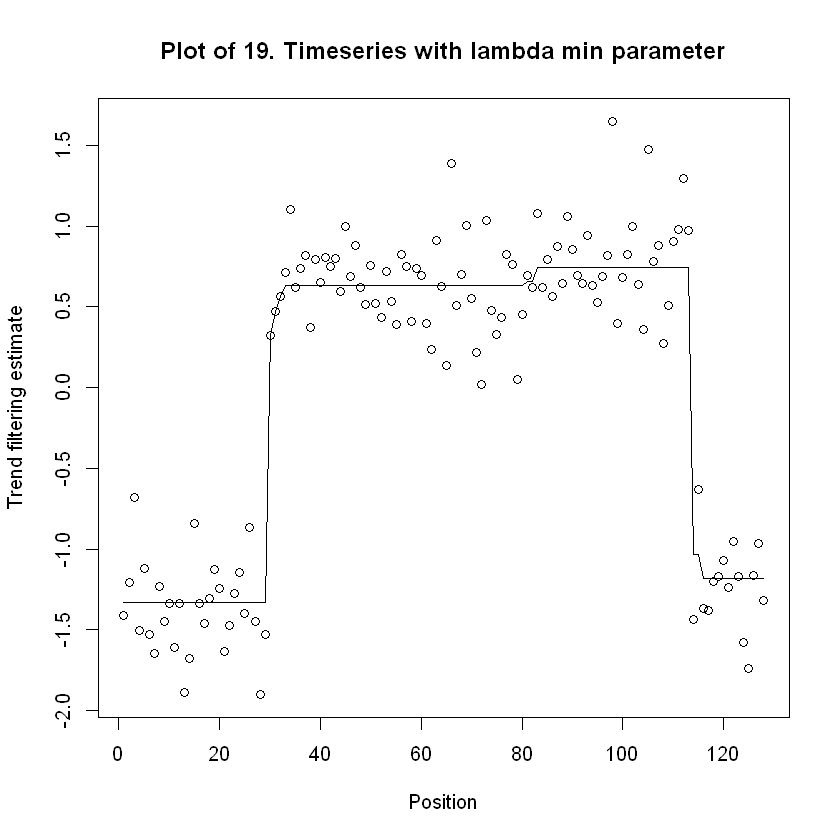

[1] "20. Timeseries"
[1] "Lambda Value of 20. dataset for min value: 0.3821081"
[1] "Lambda Value of 20. dataset for 1se value: 1.97882005255881"


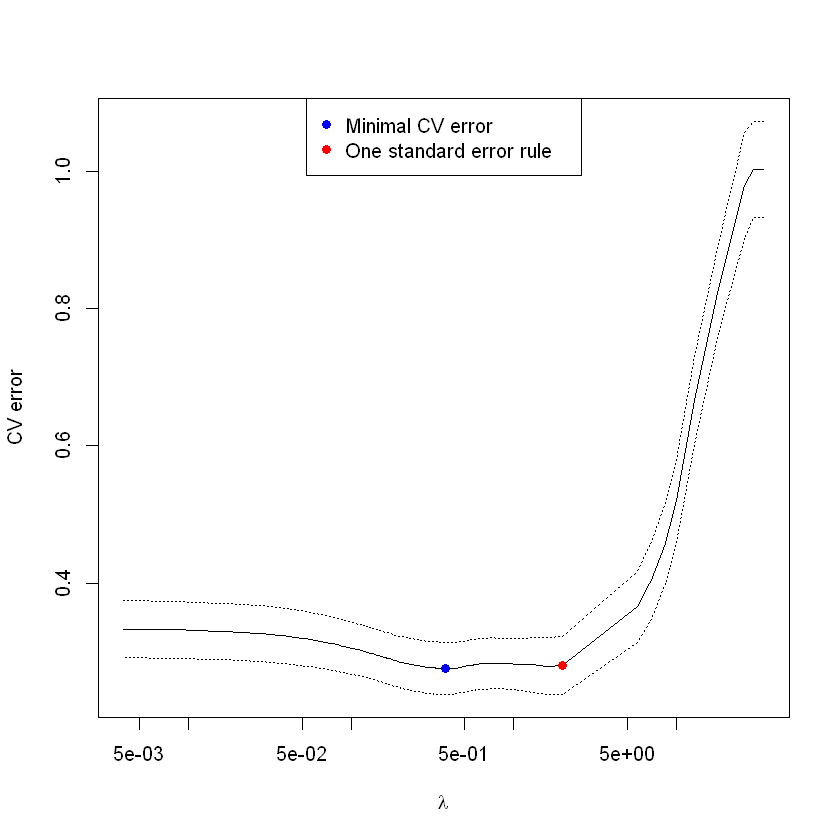

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


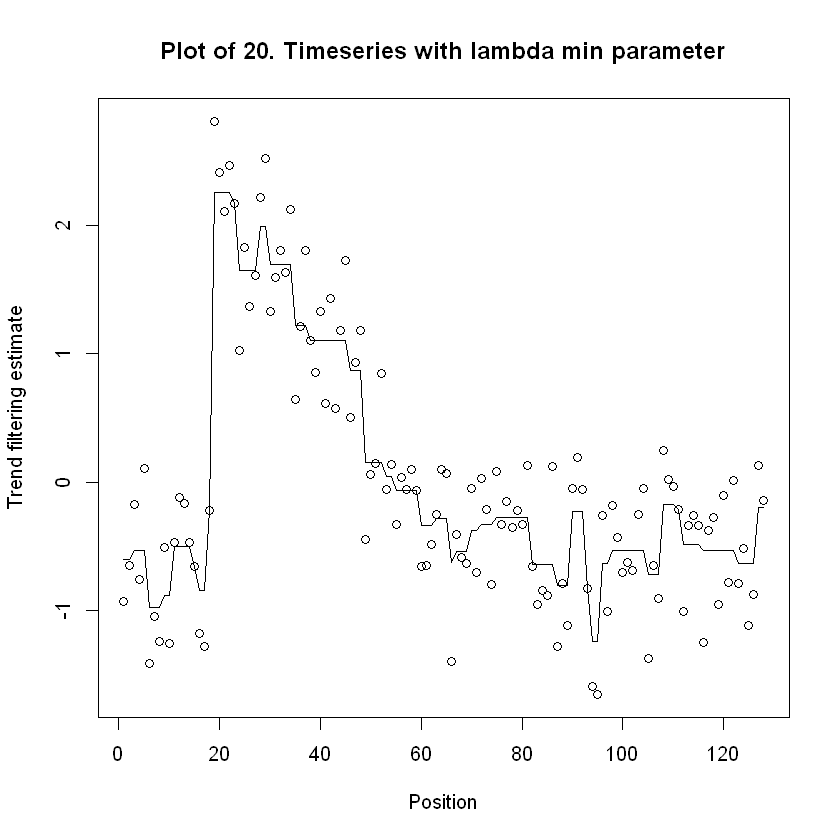

[1] "21. Timeseries"
[1] "Lambda Value of 21. dataset for min value: 0.95865362982353"
[1] "Lambda Value of 21. dataset for 1se value: 1.25555311"


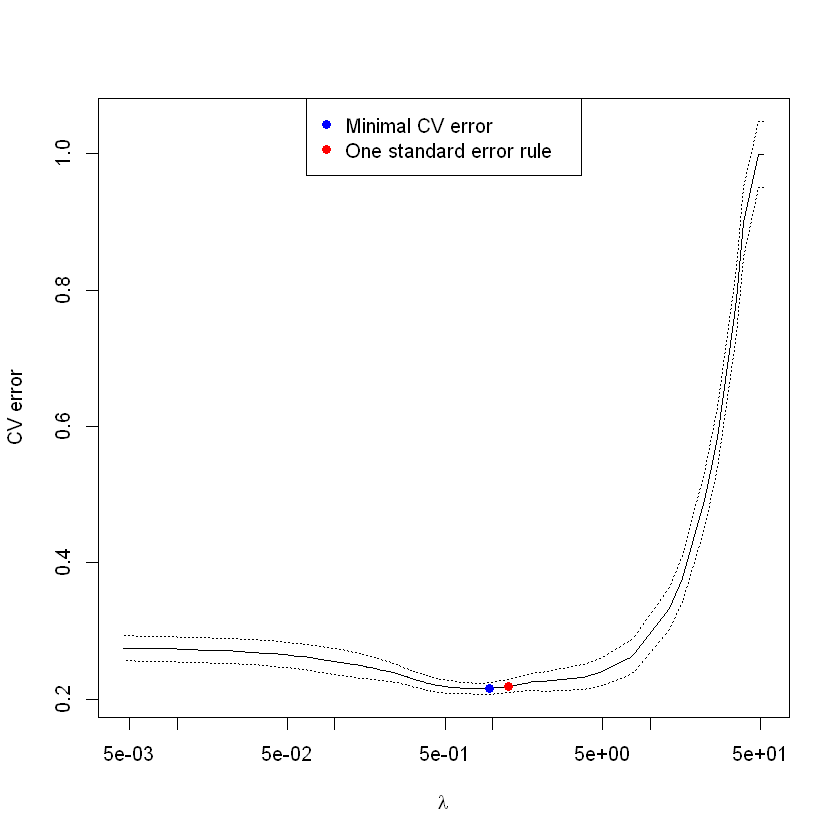

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


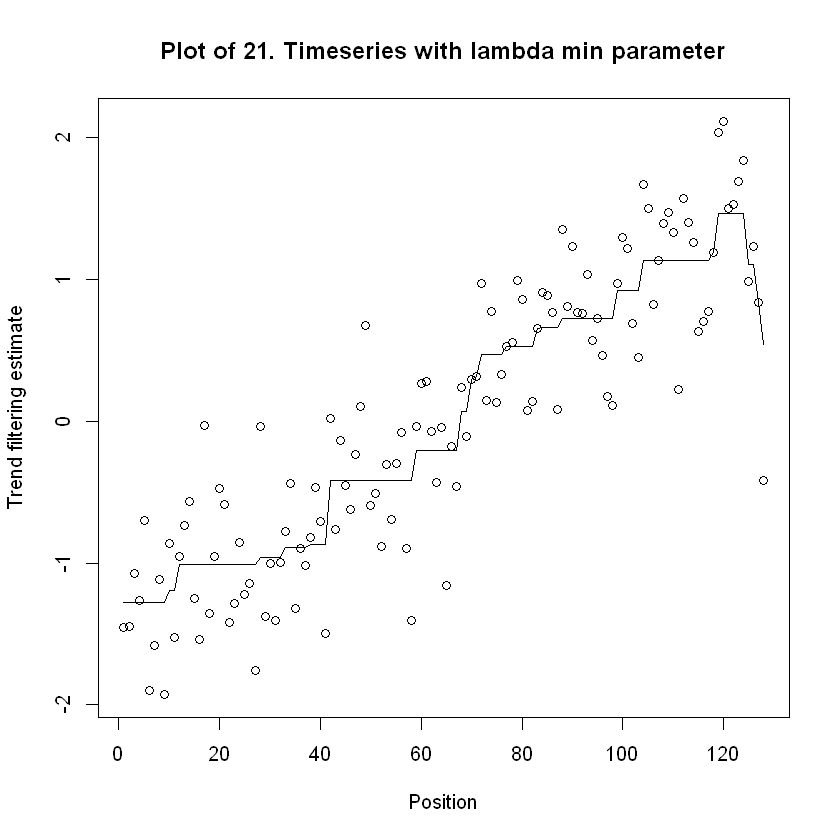

[1] "22. Timeseries"
[1] "Lambda Value of 22. dataset for min value: 0.588207126777778"
[1] "Lambda Value of 22. dataset for 1se value: 1.53021594555554"


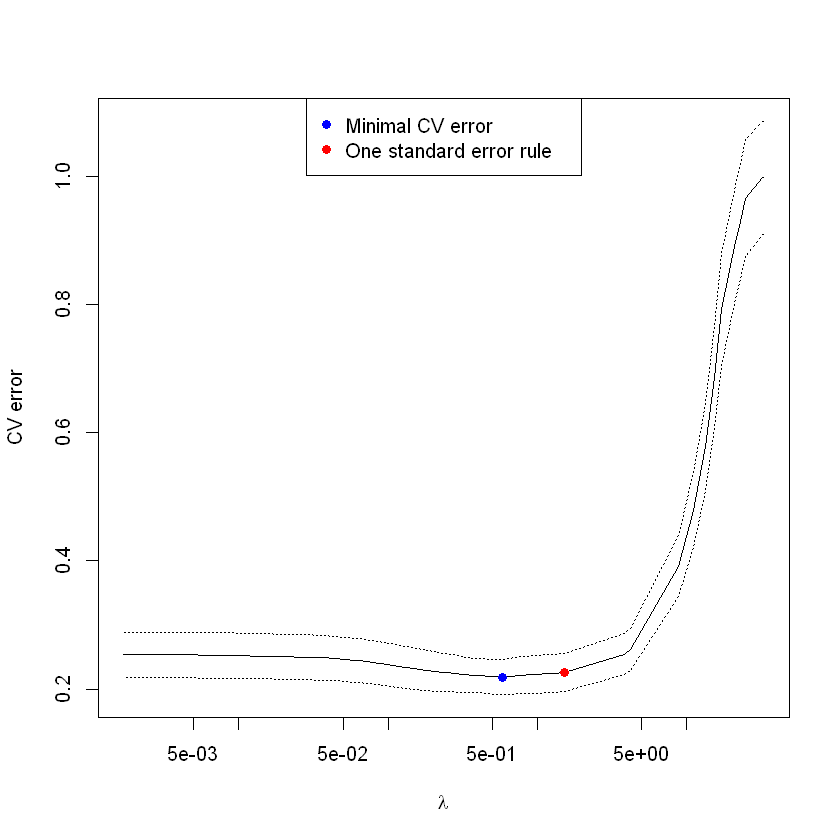

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


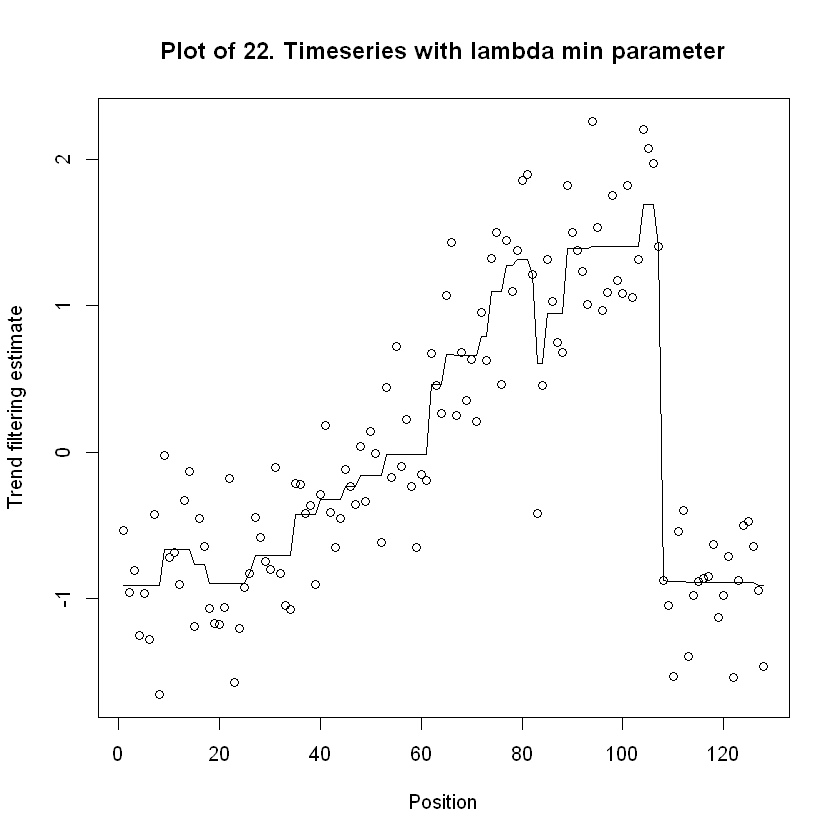

[1] "23. Timeseries"
[1] "Lambda Value of 23. dataset for min value: 0.774408884642857"
[1] "Lambda Value of 23. dataset for 1se value: 3.42123133371054"


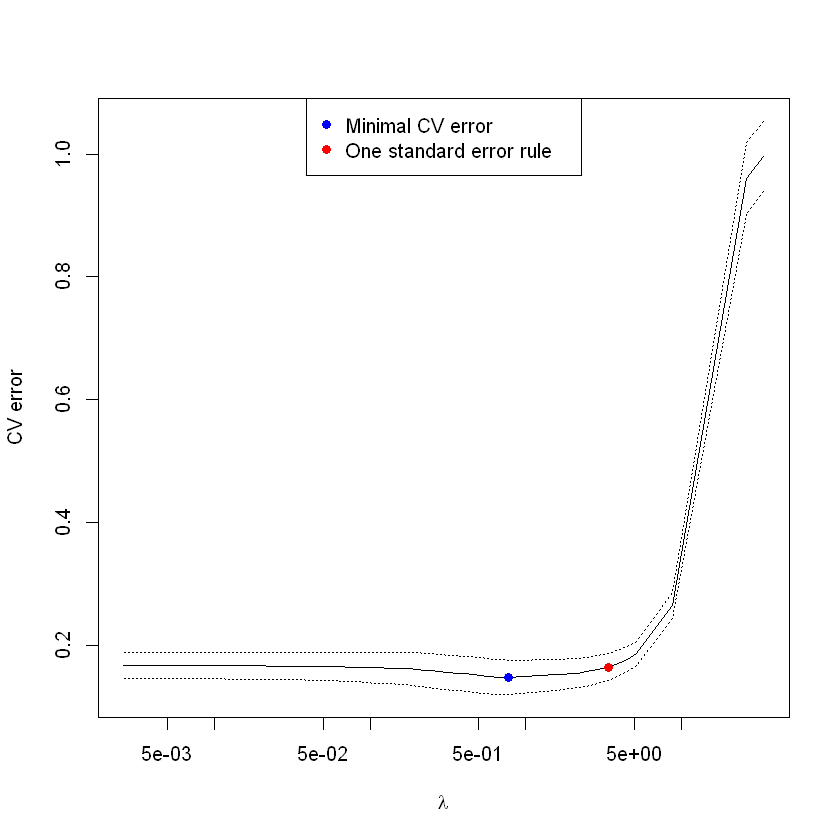

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


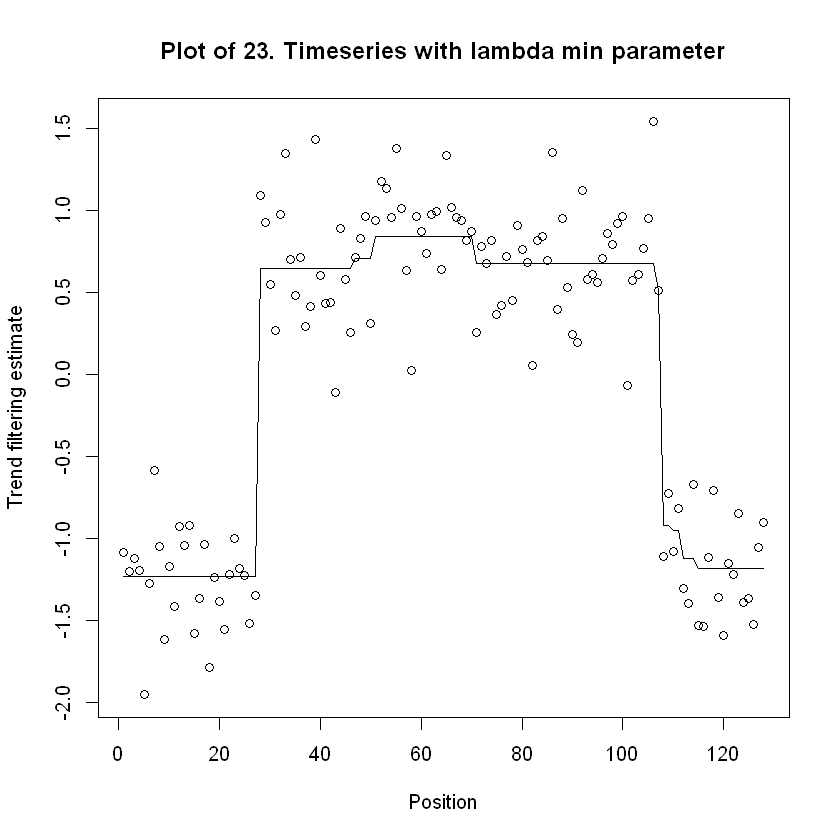

[1] "24. Timeseries"
[1] "Lambda Value of 24. dataset for min value: 2.2537324608108"
[1] "Lambda Value of 24. dataset for 1se value: 3.92683693600004"


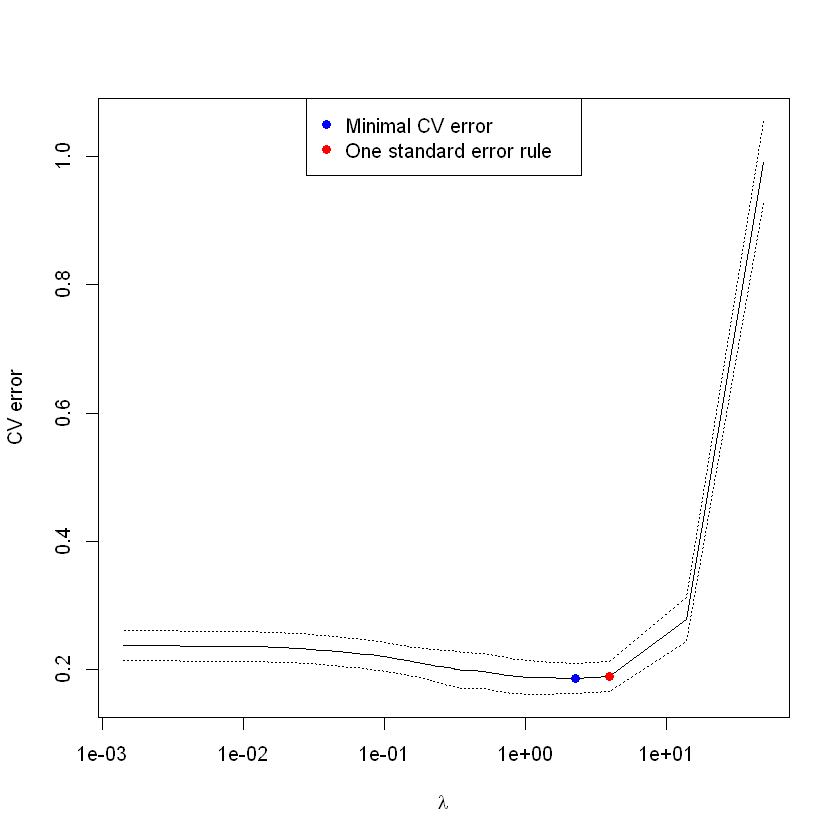

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


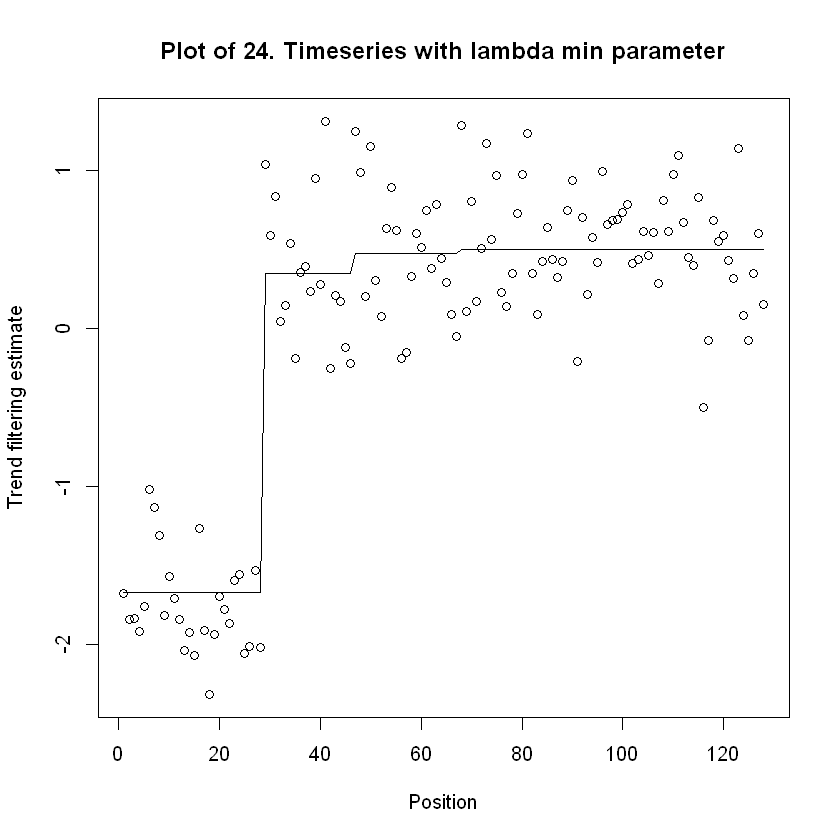

[1] "25. Timeseries"
[1] "Lambda Value of 25. dataset for min value: 0.99321292"
[1] "Lambda Value of 25. dataset for 1se value: 2.21244419999999"


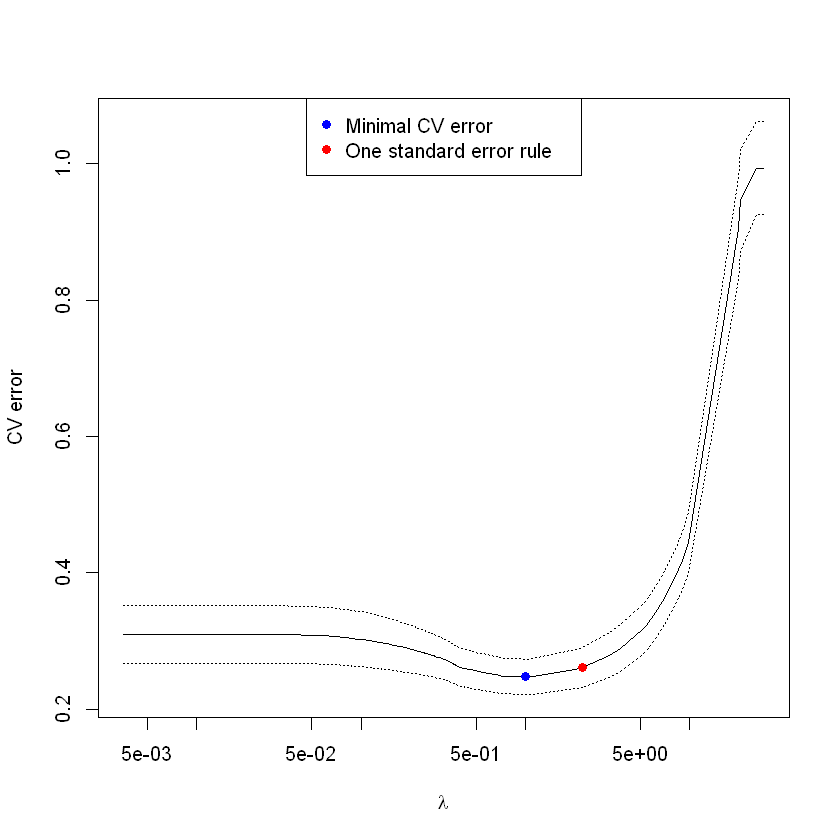

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


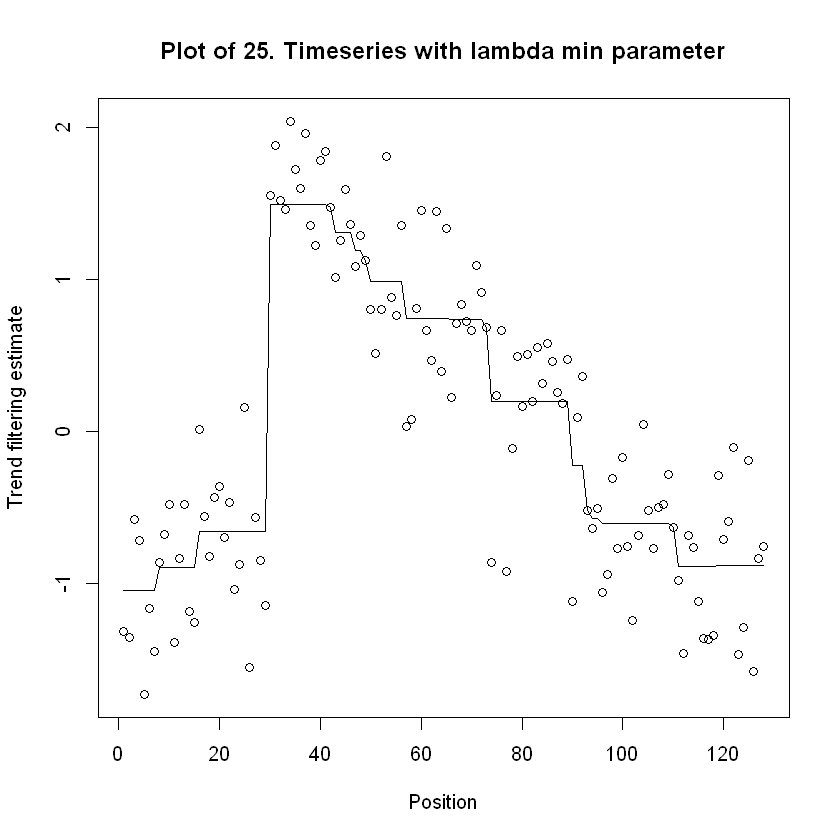

[1] "26. Timeseries"
[1] "Lambda Value of 26. dataset for min value: 0.708578827545454"
[1] "Lambda Value of 26. dataset for 1se value: 2.17342980275652"


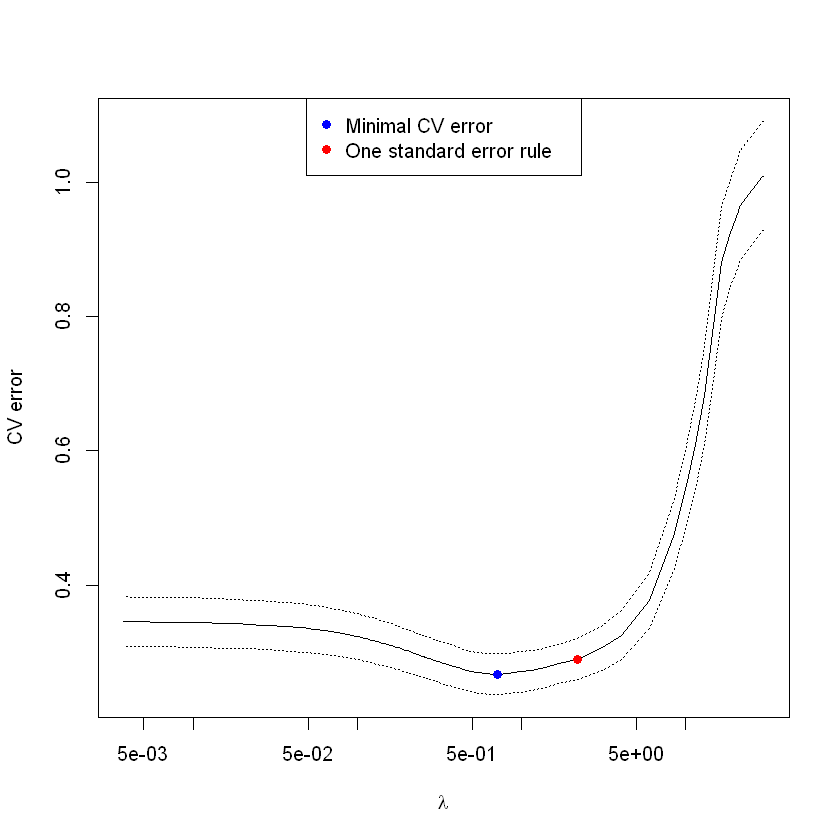

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


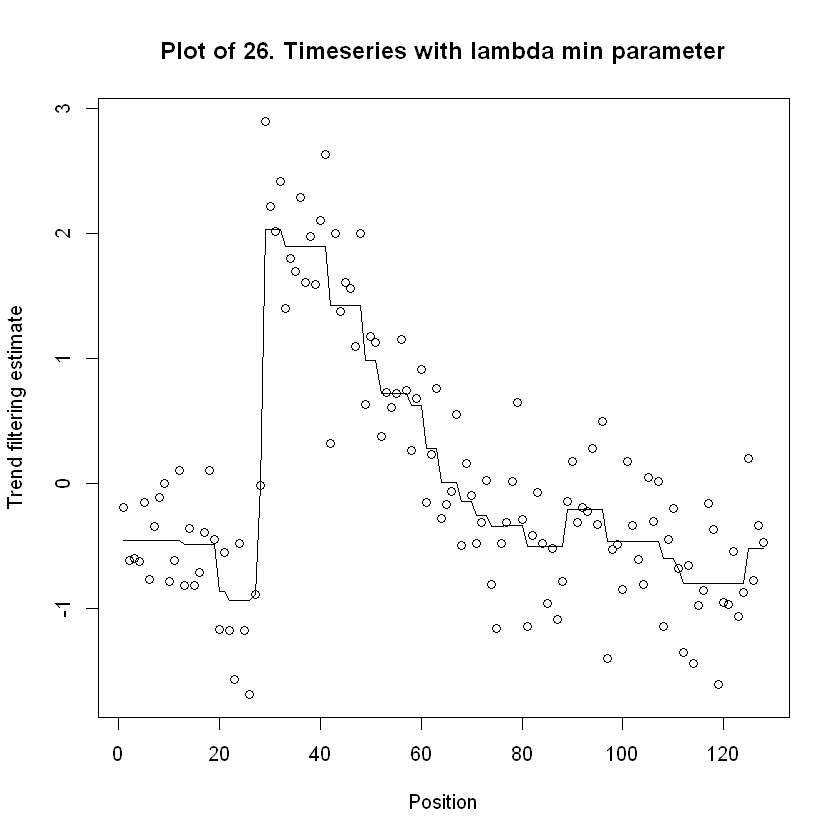

[1] "27. Timeseries"
[1] "Lambda Value of 27. dataset for min value: 0.978447472153846"
[1] "Lambda Value of 27. dataset for 1se value: 3.56322471733341"


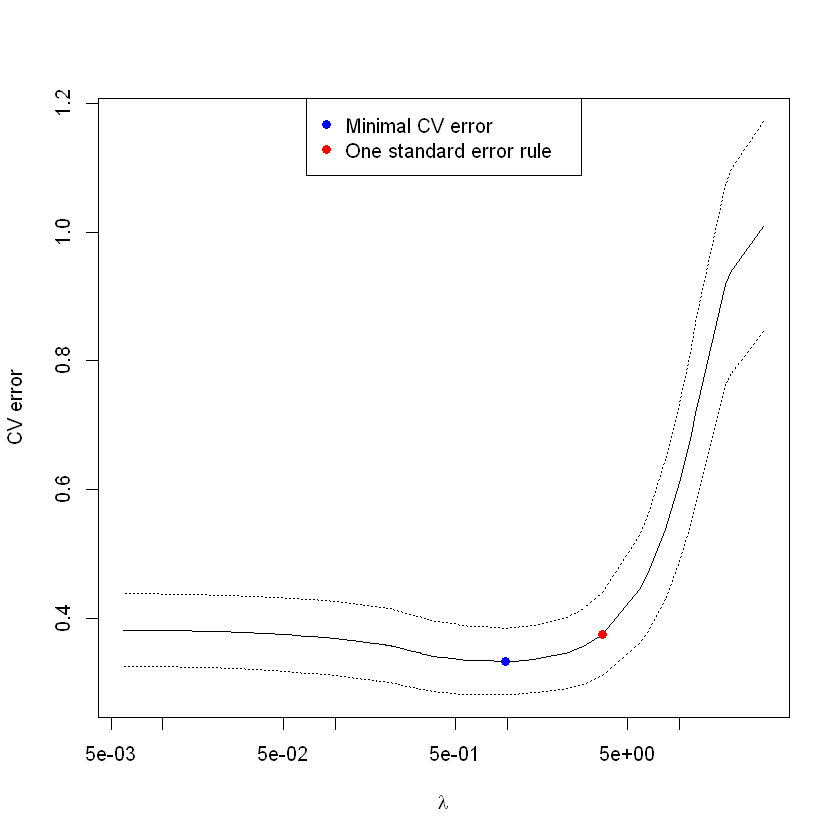

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


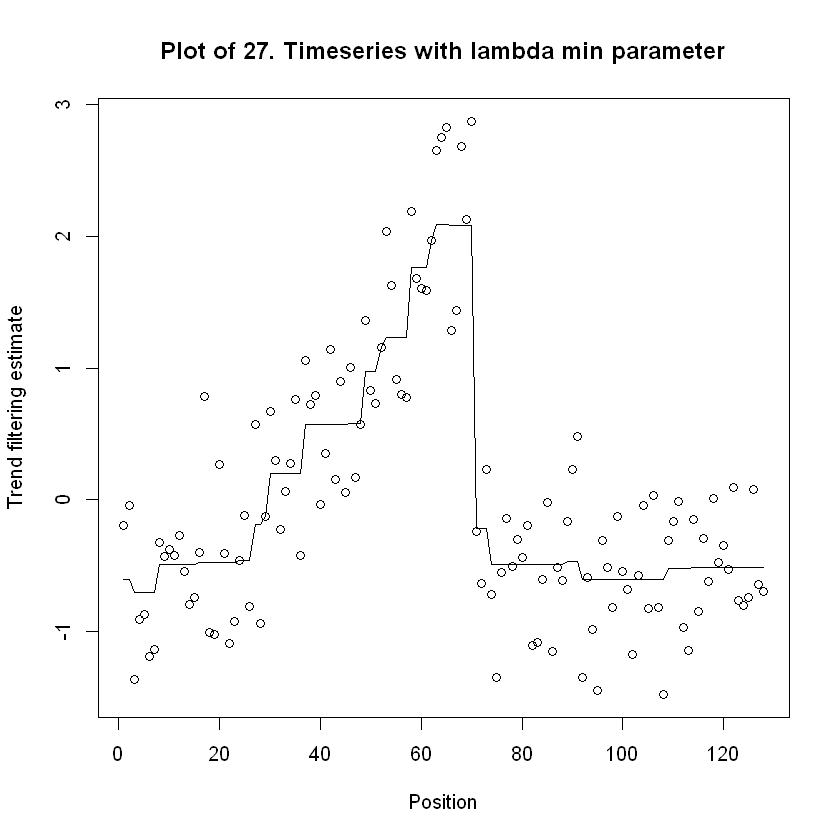

[1] "28. Timeseries"
[1] "Lambda Value of 28. dataset for min value: 1.371785149"
[1] "Lambda Value of 28. dataset for 1se value: 2.57305699563768"


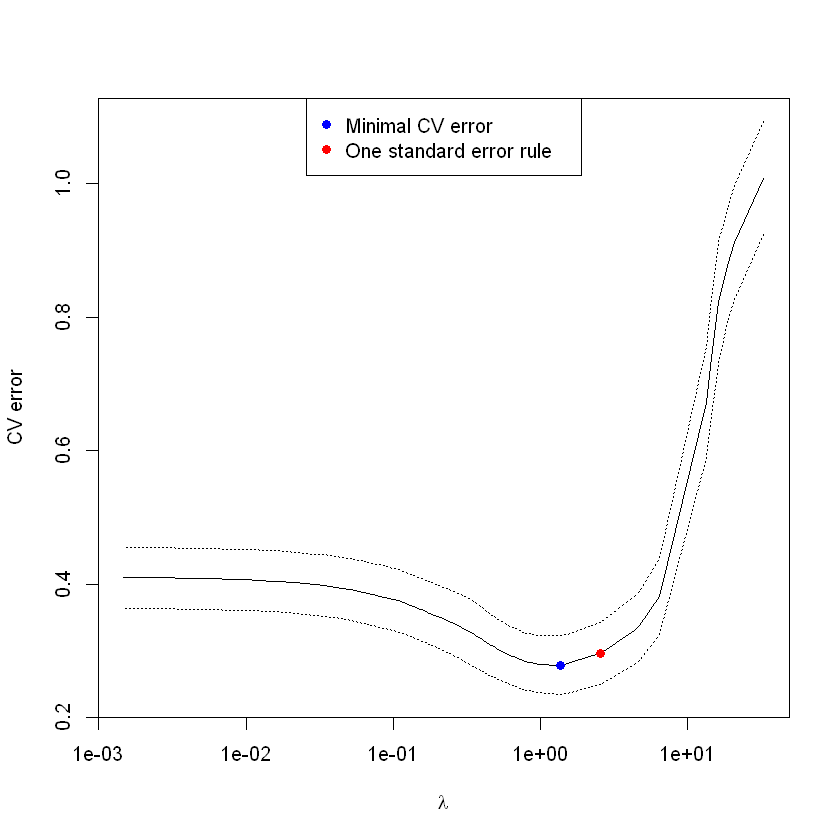

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


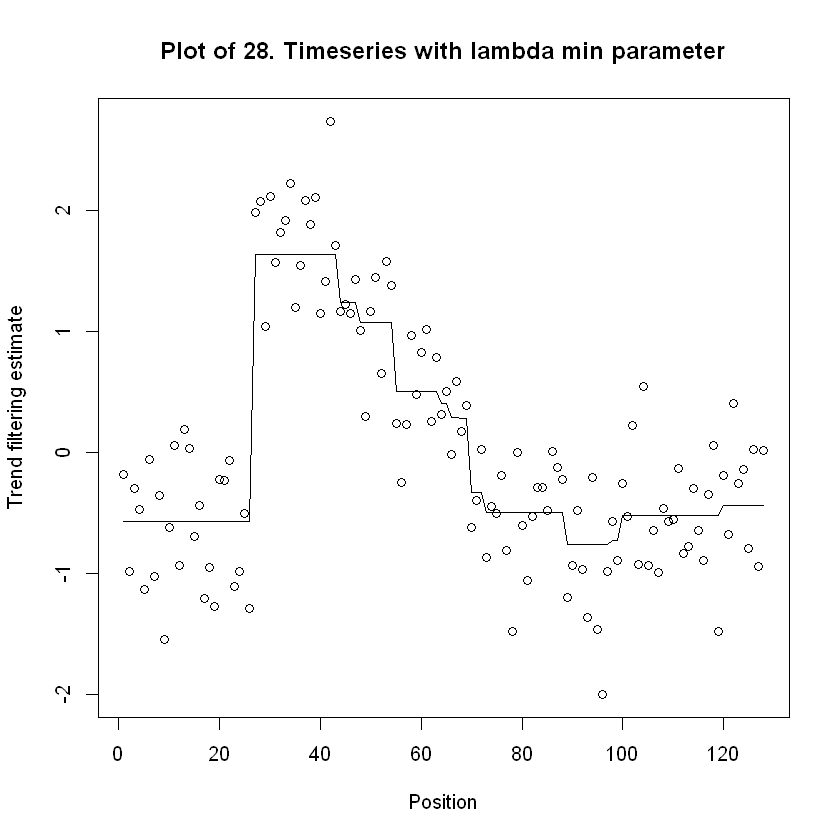

[1] "29. Timeseries"
[1] "Lambda Value of 29. dataset for min value: 0.549018224"
[1] "Lambda Value of 29. dataset for 1se value: 2.54716689060009"


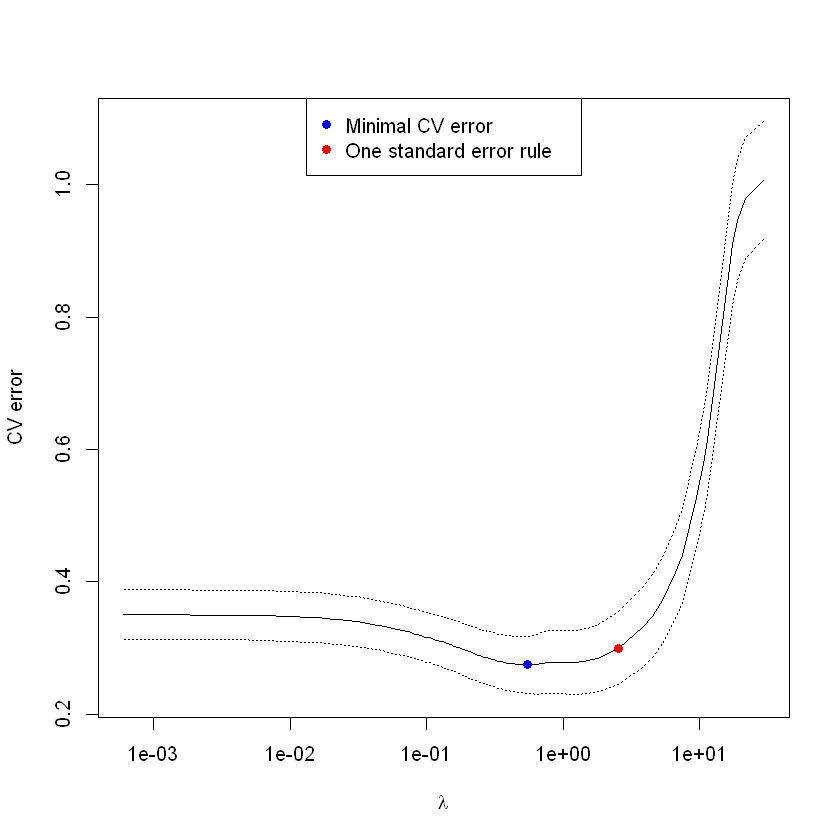

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


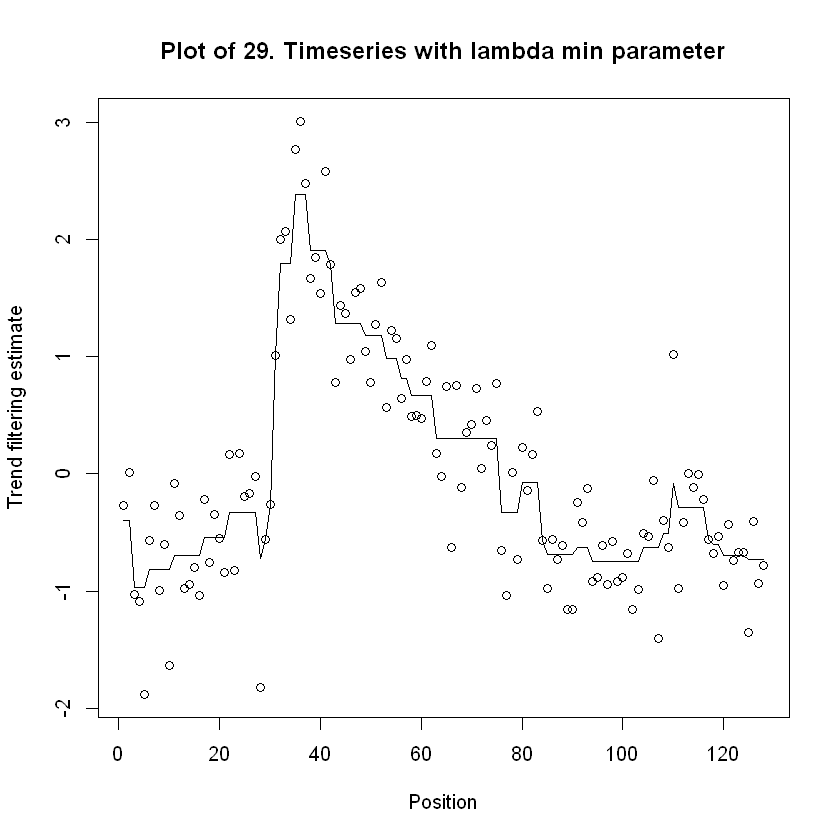

[1] "30. Timeseries"
[1] "Lambda Value of 30. dataset for min value: 0.293850541666667"
[1] "Lambda Value of 30. dataset for 1se value: 3.9982433249999"


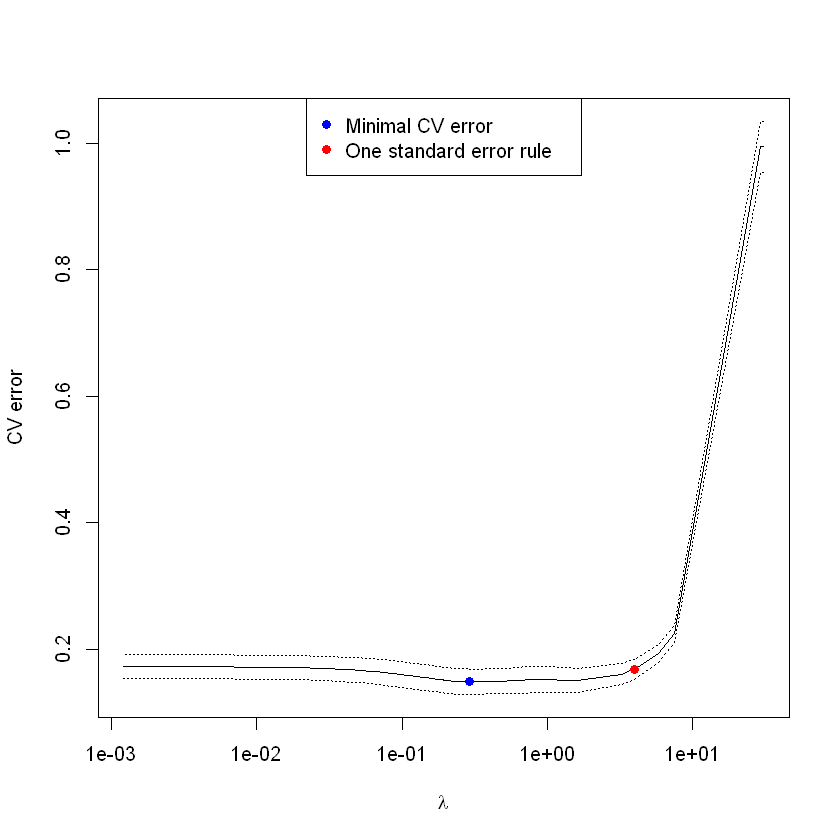

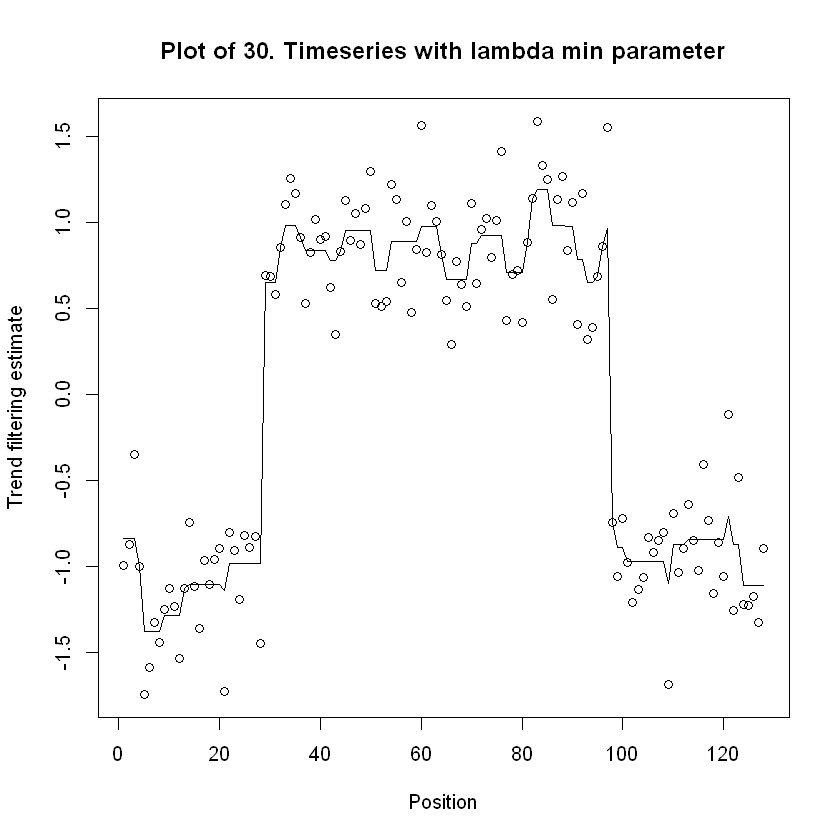

In [10]:
for(i in seq(1:30)){
    fused_results[[i]]=fused_lasso(train, i)
}

Result of all timeseries can be found in this section. All displays are seperated, by expressions, and lambda values. So, this sitation can make it easier to control. In addition, it can be said that lambda.min value cause a lot of shift in prediction values, which can means overfitting in some situations. Meanwhile, all plots include somehow patterns of timeseries. So, it can be said that it is a good representation model to generalize the points of timeseries.

<a id="3"></a>
# Task 2: Regression Tree with customized Validation

In [64]:
library(caret)
library(rpart)

In [12]:
train_perf=train[,c(-1)]

A new dataframe, train_perf, was created to remove class information.

### Value Obtainer as DataFrame

In [13]:
value_obtainer_2=function(dataset, index, time_index, control){# 0 for train data, 1 for teset data
    if(control==0){
        all_time=seq(1, 128)
        all_time_final = all_time[!all_time %in% time_index]
        a=data.table(time=as.numeric(all_time_final), values=as.numeric(dataset[index,.SD,.SDcols=all_time_final]))
        return(a)#Train Dataset
    }
    else if(control==1){
        a=data.table(time=as.numeric(time_index), values=as.numeric(dataset[index,.SD,.SDcols=time_index]))
        return(a)#Test Dataset    
    }
    
    return (a)
}

In order to apply customized validation technique, differnt value_obtainer was defined. Control includes the train or test dataset information. If control is 0, then function return values for train dataset. Moreover, time_index includes current test dataset indexes by considering the k'th information.

### Performance Controller

In [14]:
perf_function=function(forecast, actual){
    n=length(actual)
    error=actual-forecast
    mean=mean(actual)
    sd=sd(actual)
    FBias=sum(error)/sum(actual)
    MPE=sum(error/actual)/n
    MAPE=sum(abs(error/actual))/n
    RMSE=sqrt(sum(error^2))/n
    MAD=sum(abs(error))/n
    WMAPE=MAD/mean
    l=data.frame(n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE)
    return(l)
}

Performance function to get RMSE values on test datasets. 10 different dataset was created for each max_depth parameter for one time series.

### Example Code for Regressor

For first time series, an example code was created to describe the code.

In [15]:
regression_results=vector("list", 5)

A list created to store performance of the models for 5 differnt max_depth value. By considering this list, the best parameters for max_depth information.

In [16]:
for(i in seq(1, 5)){
    regression_fold_result=vector("list", 10)
    for(j in seq(1, 10)){
        current_index=seq(0, 110, 10)+j#Test indexes by considering k information. it include k'th indexes
        if(j<=8){# In order to control above 120, a condition was created
            last_index=120+j
            current_index[13]=last_index
        }
        
        train_loop=value_obtainer_2(train_perf, 1, current_index, 0)# Train dataset by k'th index
        test_loop=value_obtainer_2(train_perf, 1, current_index, 1 )# Test dataset by k'th index
        
        model = train(values ~., data = train_loop, 
              method = "rpart",
              tuneGrid = data.frame(cp = 0),         
              control = rpart.control(minsplit = 20, minbucket = 10, maxdepth=i))# Max_depth parameter tuning   
        
        prediction_folds=predict(model,newdata=test_loop)
        regression_fold_result[[j]]=perf_function(prediction_folds, test_loop$values)#Performance Result for k'th performance.
        
}

    fold_results=t(colSums(rbindlist(regression_fold_result)))
    regression_results[[i]]=as.data.frame(fold_results)
}

5 different parameters were tried for max_depth information. In addition, custom cross validation was applied in second for loop. In addition, min_split=20, min_bucket=10, and cp=0 were assigned as mentioned in the description of homework.

In [17]:
reg_res=rbindlist(regression_results)
reg_res[,max_depth:=seq(1,5)]

rbindlist is used to create dataframe for performance of models with different max_depth. 

In [18]:
reg_res

n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE,max_depth
128,0.01065383,10.29315,21.49203,7.829556,2.277579,6.703218,202.78260,1
128,0.01065383,10.29315,26.23742,4.475559,1.030317,2.687912,85.44759,2
128,0.01065383,10.29315,27.88158,4.428331,1.039888,2.713523,85.05516,3
128,0.01065383,10.29315,27.00000,4.460407,1.038501,2.780869,86.66474,4
128,0.01065383,10.29315,27.13154,4.450938,1.037014,2.775027,87.29551,5


An example dataframe, for models

In [19]:
which.min(reg_res$RMSE)

[1] 2

The best parameter for max_dept.

In [20]:
current_dt=value_obtainer_2(train, 1, seq(1, 128), 1)

In [21]:
model_final = train(values ~., data = current_dt, 
          method = "rpart",
          tuneGrid = data.frame(cp = 0),
          control = rpart.control(minsplit = 20, minbucket = 10, maxdepth=which.min(reg_res$RMSE)))
    regression_results[[i]]=model$results 

The final model was created by considering the founded the best max_depth information.

## Example Result

In [22]:
predictions=predict(model_final,newdata=current_dt)

Predict with final model.

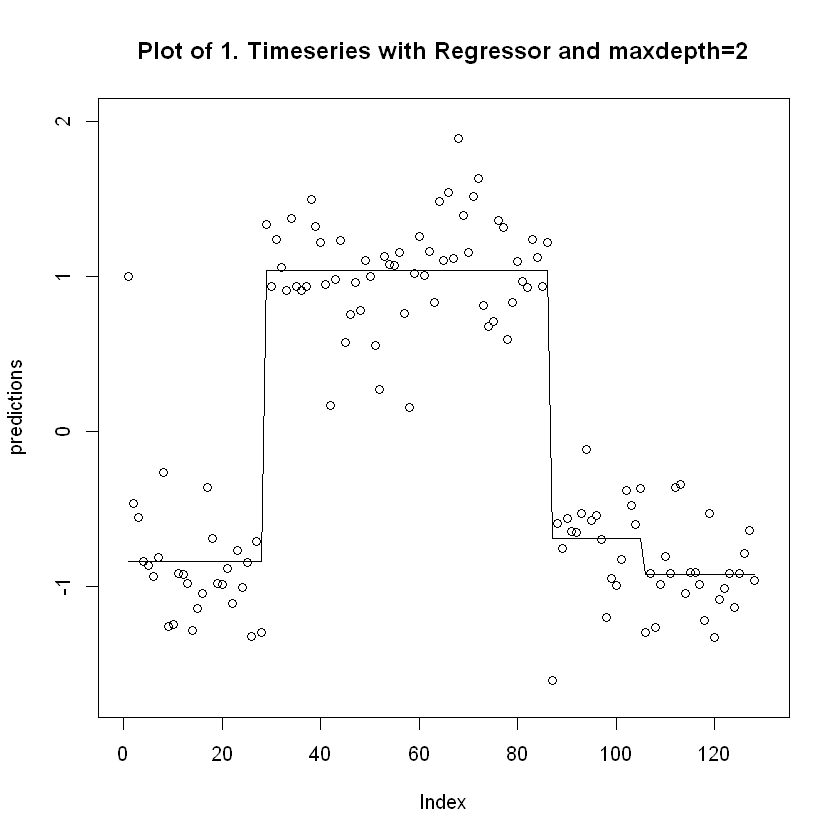

In [23]:
plot(predictions,type="l", xlim=c(0,130), ylim=c(-1.7,2), main="Plot of 1. Timeseries with Regressor and maxdepth=2")
points(current_dt[,.(values)])

The plot of the regressor tree with the best max_dept parameter. Similar logic will be hold for all timeseries to obtain best max_depth parameter with customized validation. Then, a final model with obtained the best max_depth parameter on the whole dataset. At the the end, predictions and actual points will be displayed. In addition, performance dataframes and the best max_depth values will be displayed after the plots.

## Regression Function

In [24]:
regression_results=vector("list", 30)

To store, all performance result with different max_depth parameter, a vector was created.

In [25]:
regression_function=function(dataset, index){
    regression_results=vector("list", 5)

    current_dt=value_obtainer_2(dataset, index, seq(1, 128), 1)
    for(i in seq(1, 5)){
    regression_fold_result=vector("list", 10)
        for(j in seq(1, 10)){
            current_index=seq(0, 110, 10)+j#Test indexes by considering k information. it include k'th indexes
            if(j<=8){# In order to control above 120, a condition was created
                last_index=120+j
                current_index[13]=last_index
            }

            train_loop=value_obtainer_2(train_perf, index, current_index, 0)# Train dataset by k'th index
            test_loop=value_obtainer_2(train_perf, index, current_index, 1 )# Test dataset by k'th index

            model = train(values ~., data = train_loop, 
                  method = "rpart",
                  tuneGrid = data.frame(cp = 0),         
                  control = rpart.control(minsplit = 20, minbucket = 10, maxdepth=i))# Max_depth parameter tuning   
            
            prediction_folds=predict(model,newdata=test_loop)
            regression_fold_result[[j]]=perf_function(prediction_folds, test_loop$values)#Performance Result for k'th performance.

    }

    fold_results=t(colSums(rbindlist(regression_fold_result)))
    regression_results[[i]]=as.data.frame(fold_results)
}
    

    reg_res=rbindlist(regression_results)
    reg_res[,max_depth:=seq(1,5)]

    
    best_parameter=which.min(reg_res$RMSE)

    model_final = train(values ~., data = current_dt, 
              method = "rpart",
              tuneGrid = data.frame(cp = 0),
              control = rpart.control(minsplit = 20, minbucket = 10, maxdepth=best_parameter))

    predictions=predict(model_final,newdata=current_dt)
    
    plot(predictions,type="l", xlim=c(0,130), ylim=c(-1.7,2), main=paste0("Plot of ", index,". Timeseries with Regressor and maxdepth=",best_parameter))
    points(current_dt[,.(values)])
    
    return(list(reg_res,predictions))
      
}

This loop includes all steps of the mentioned regressor tree. In addition, plot was created in this loop.

## Results of Task 1 for All Time Series

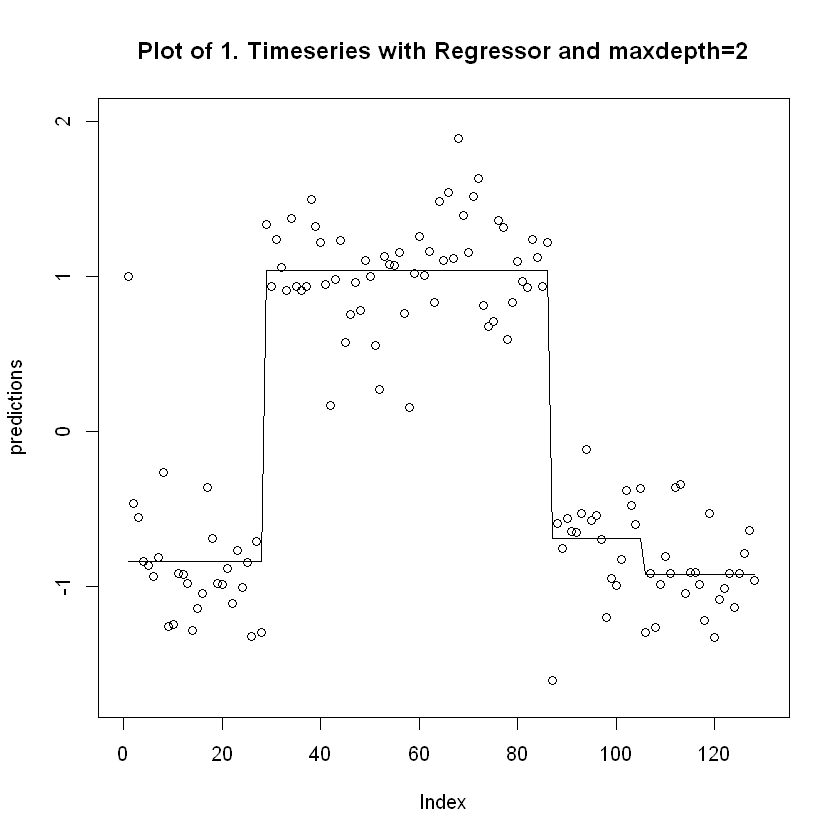

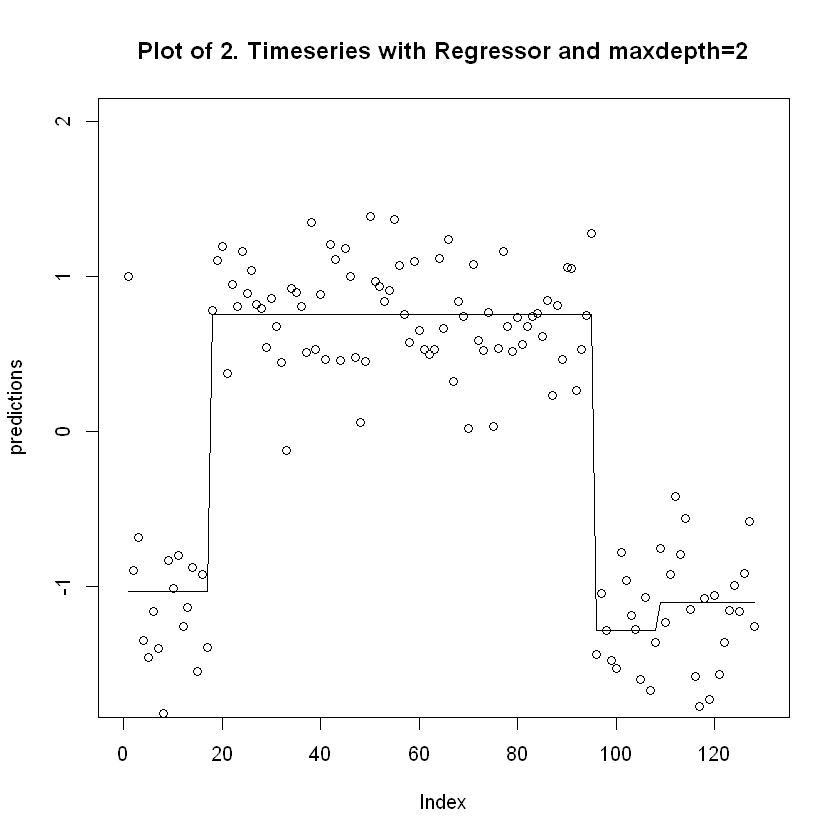

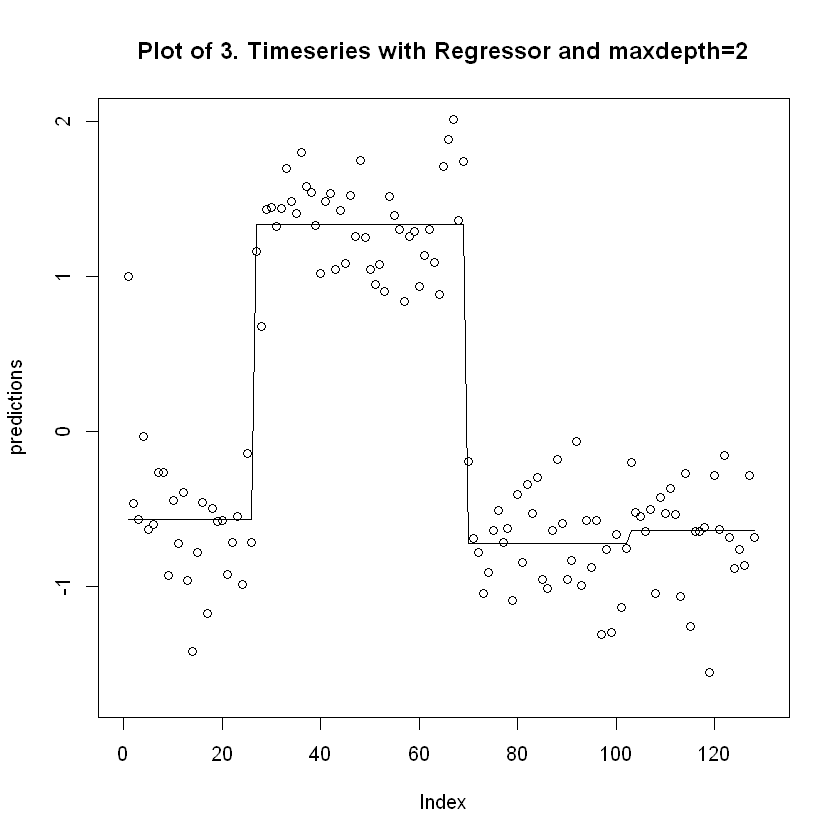

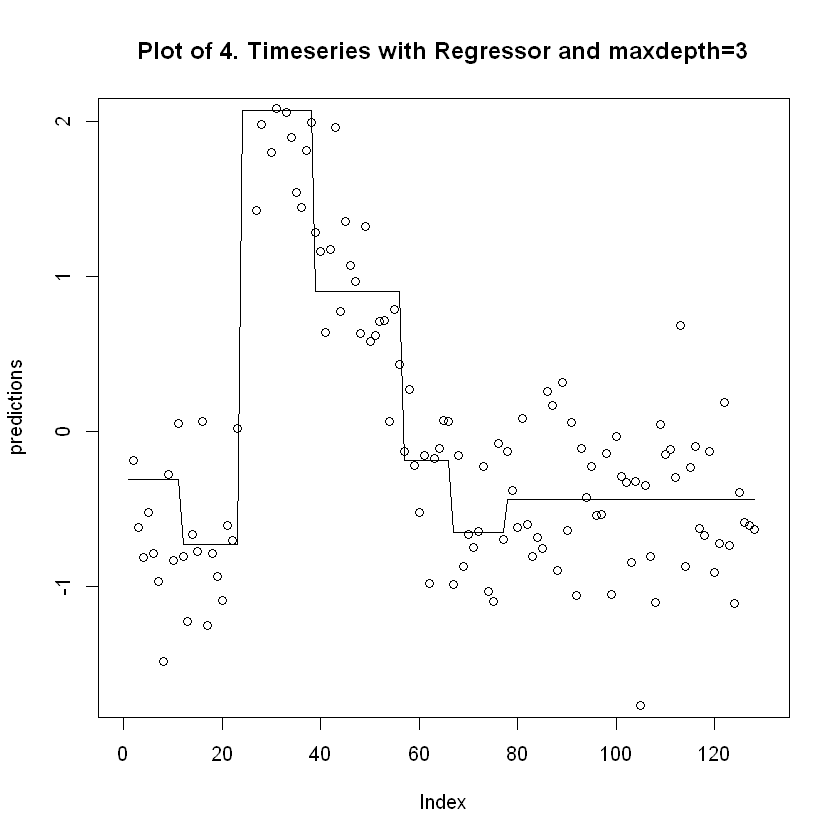

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

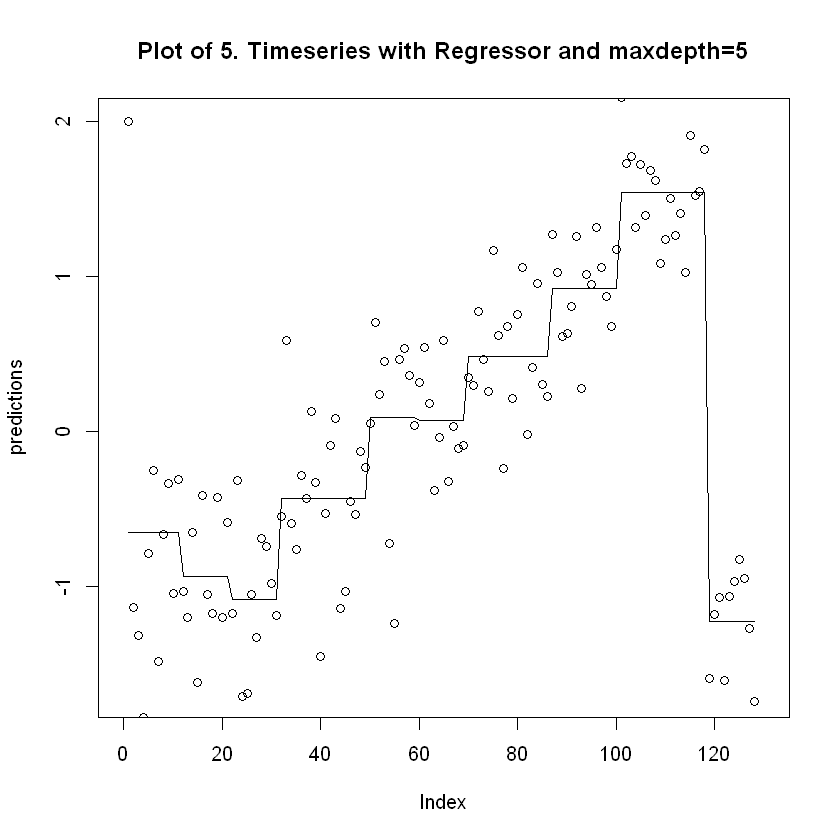

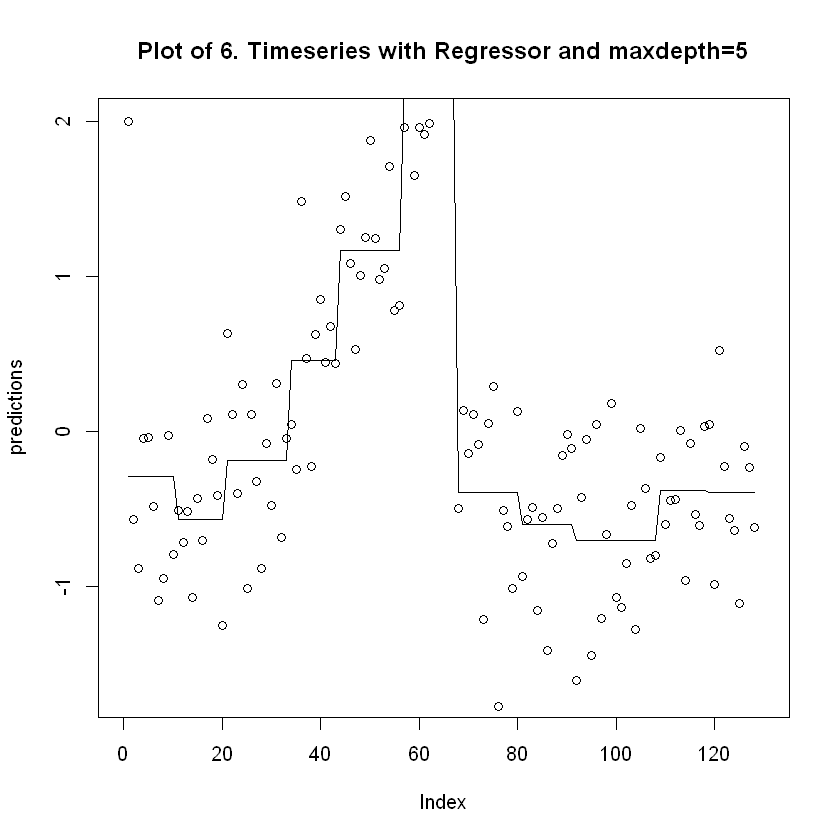

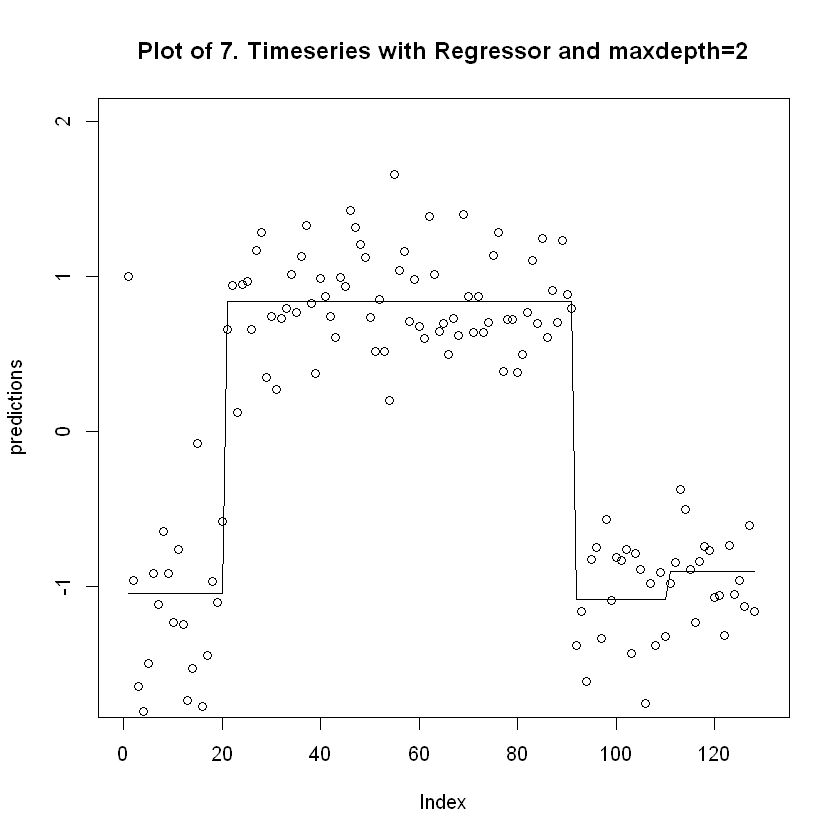

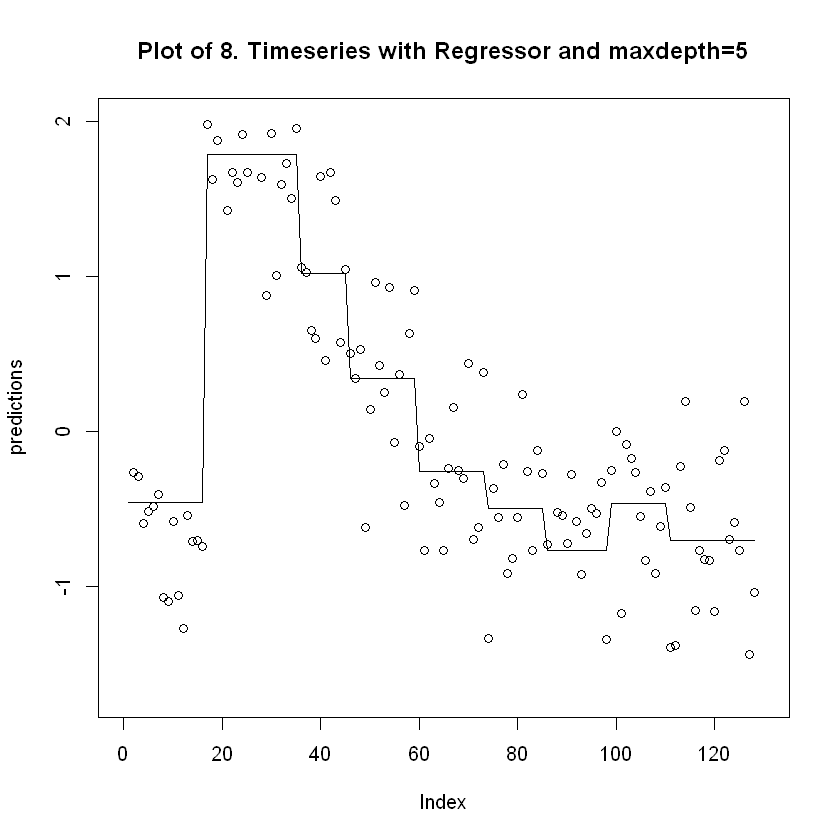

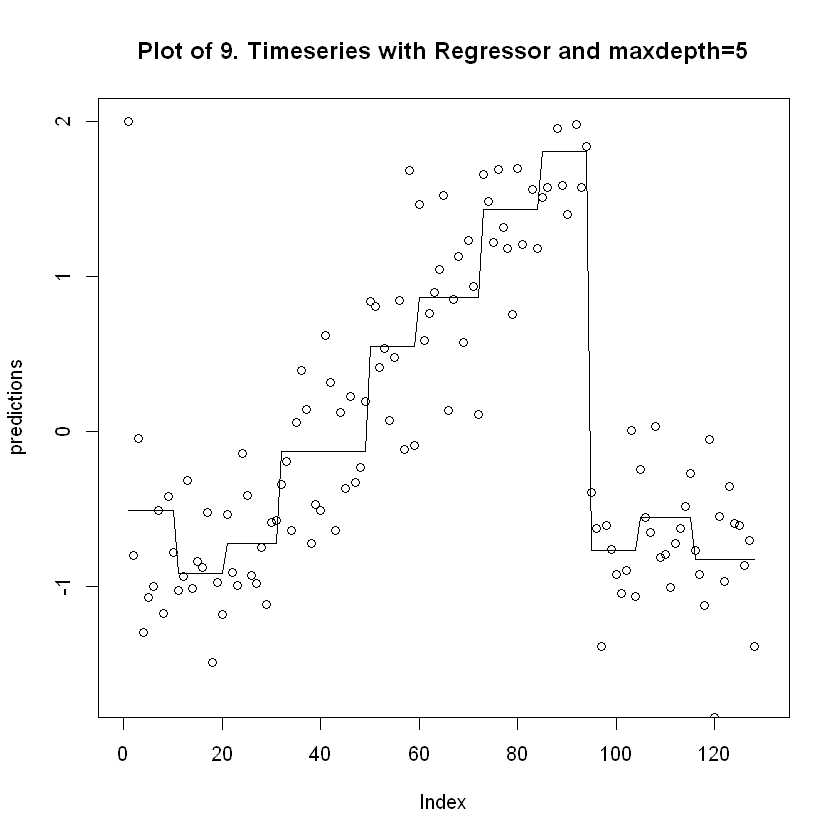

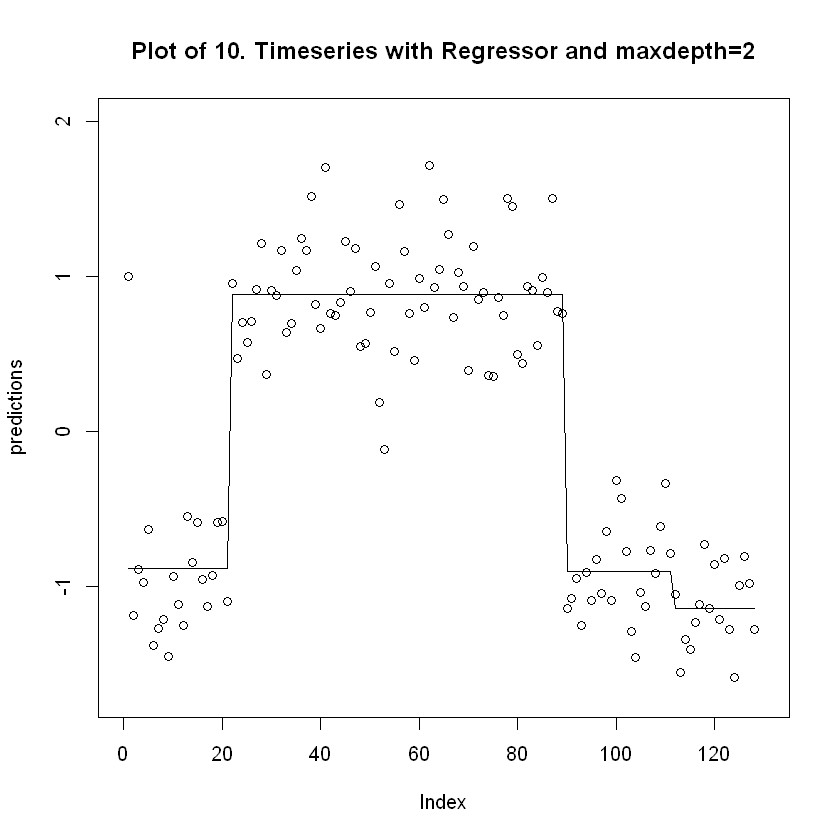

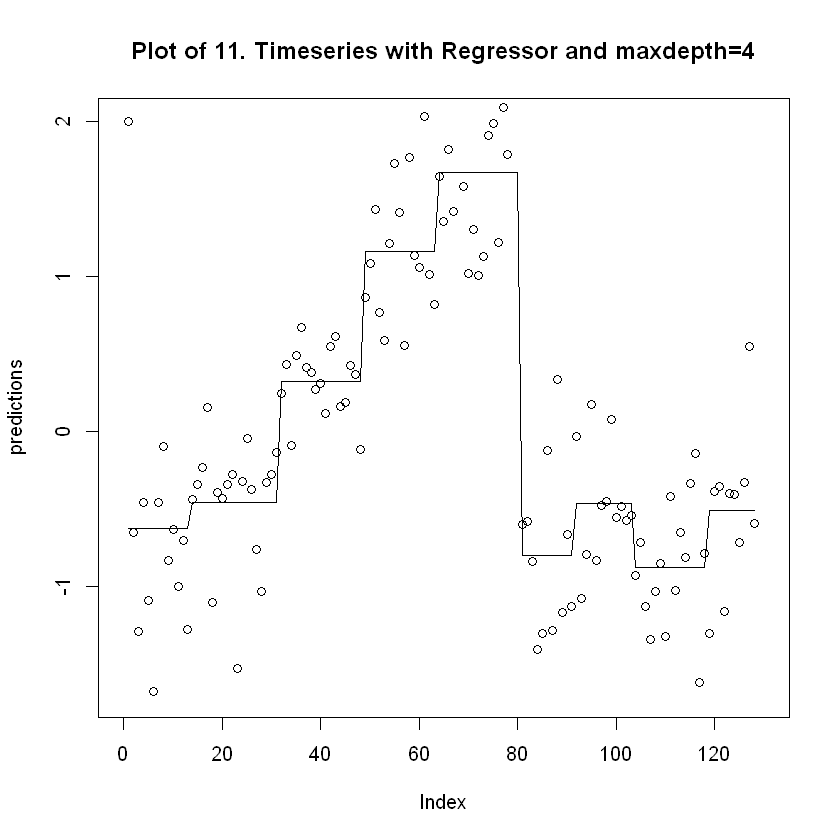

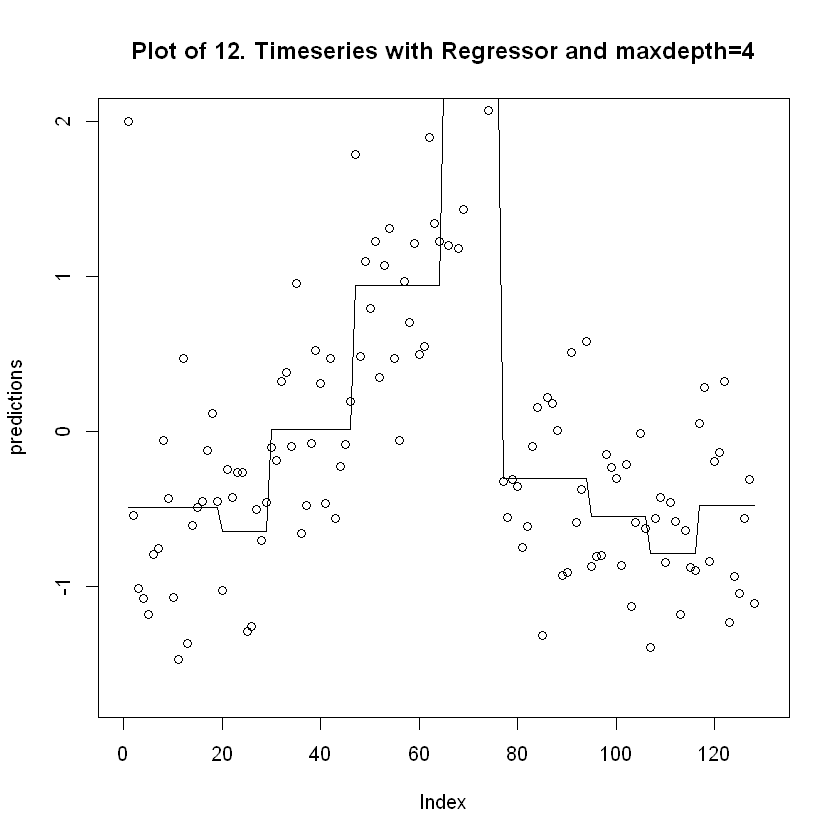

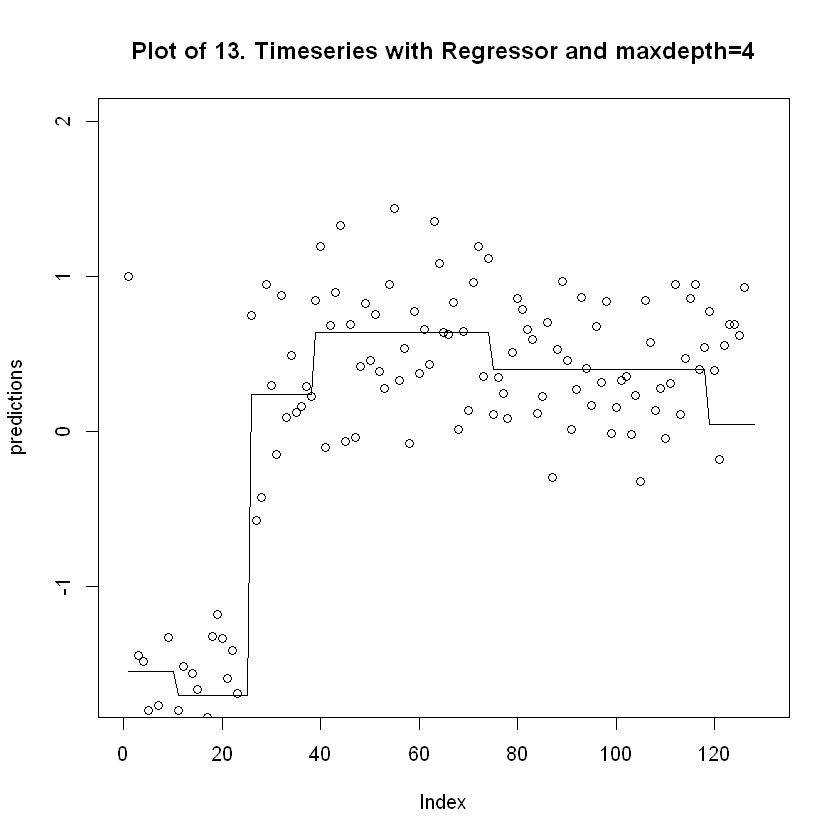

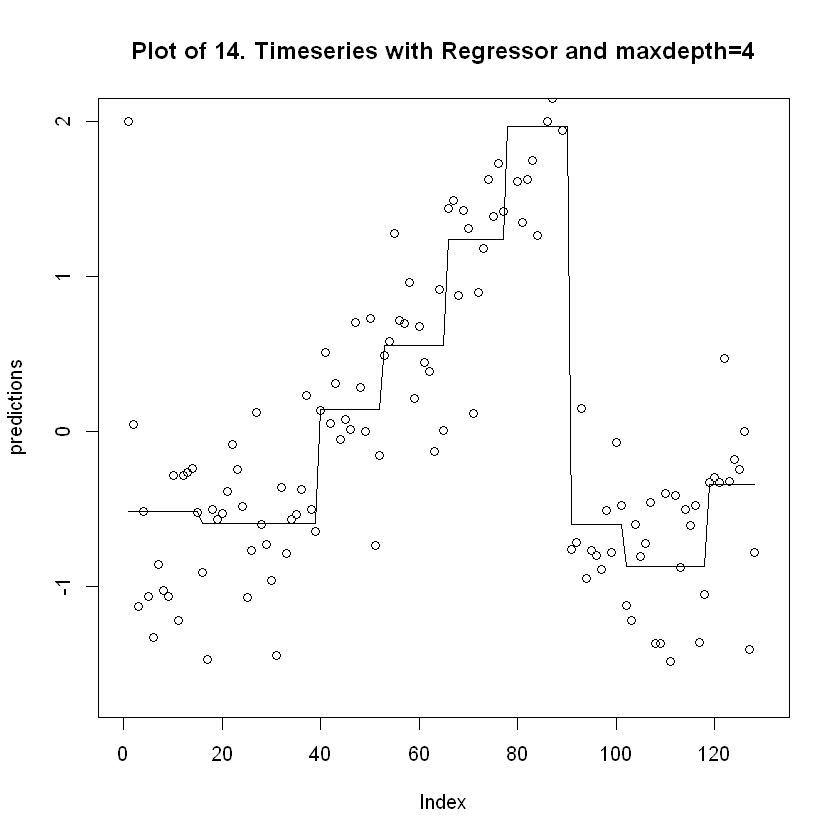

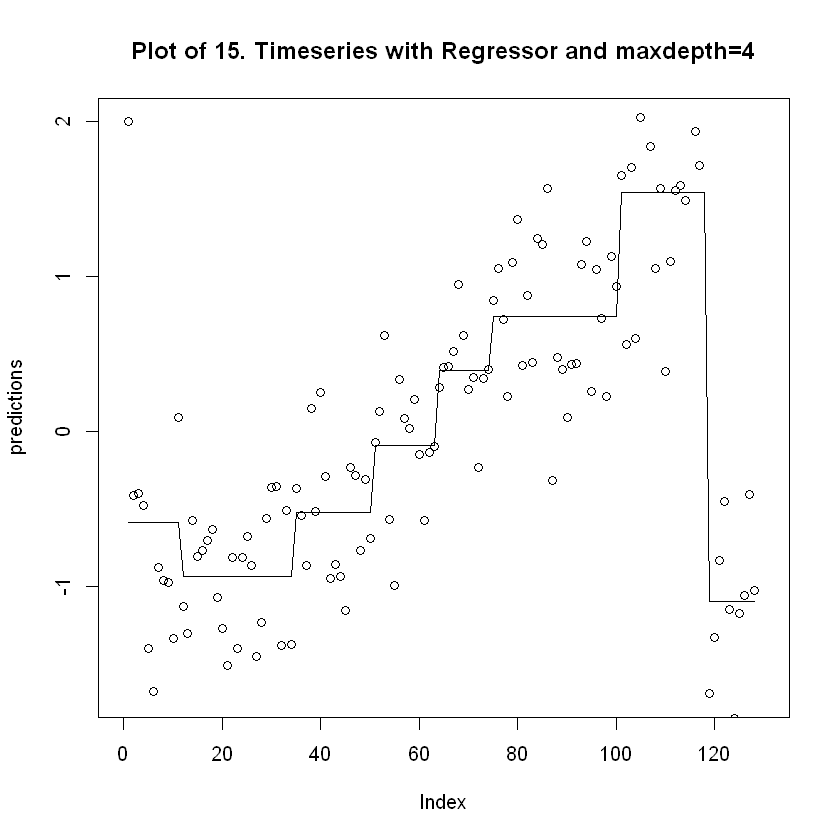

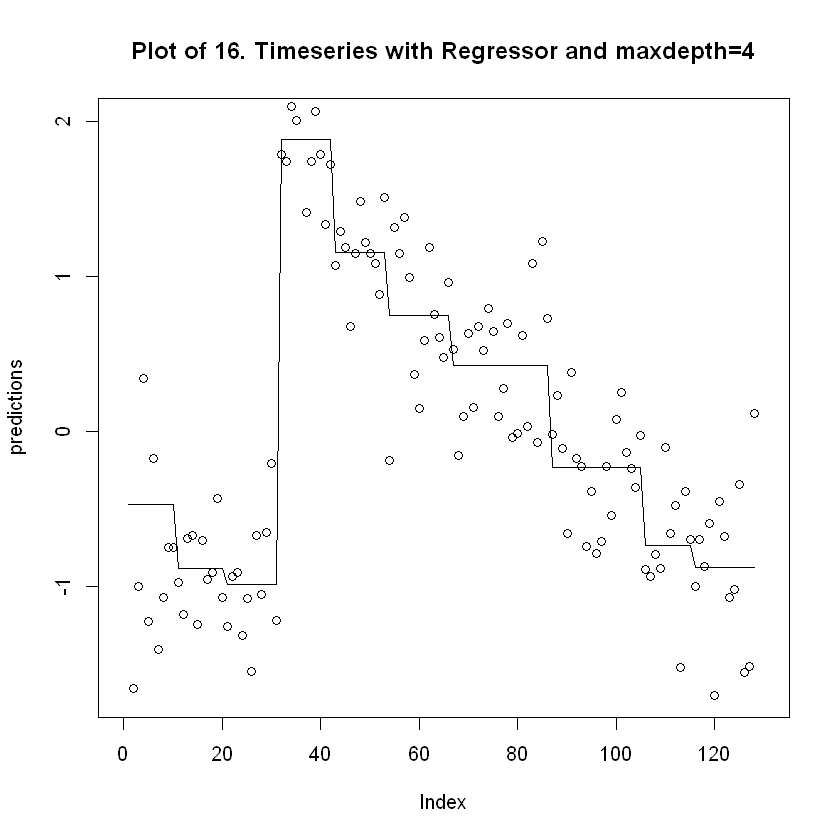

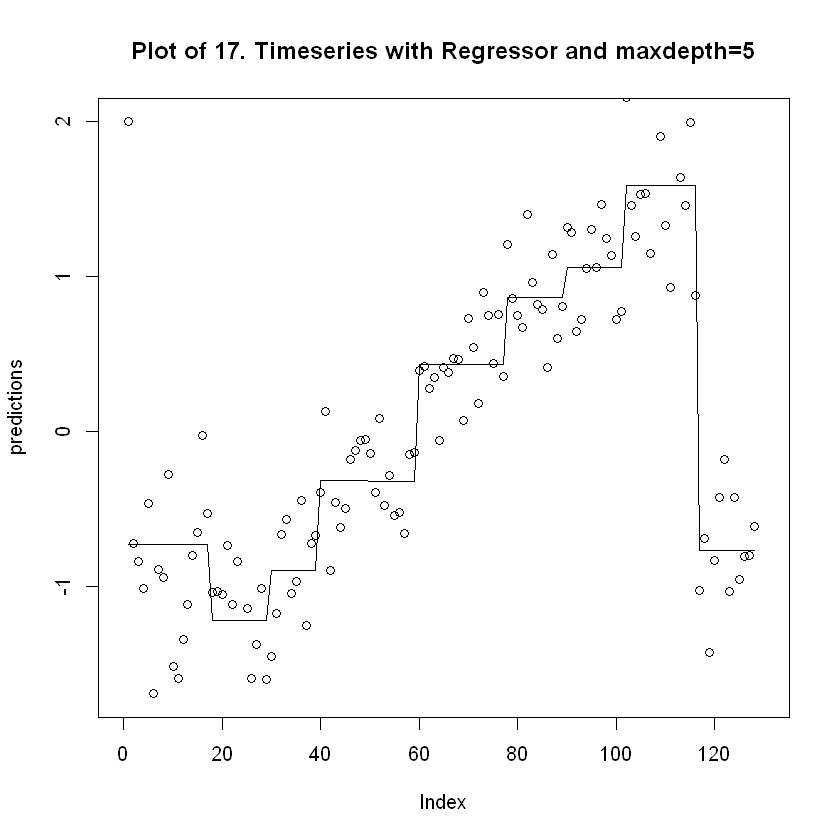

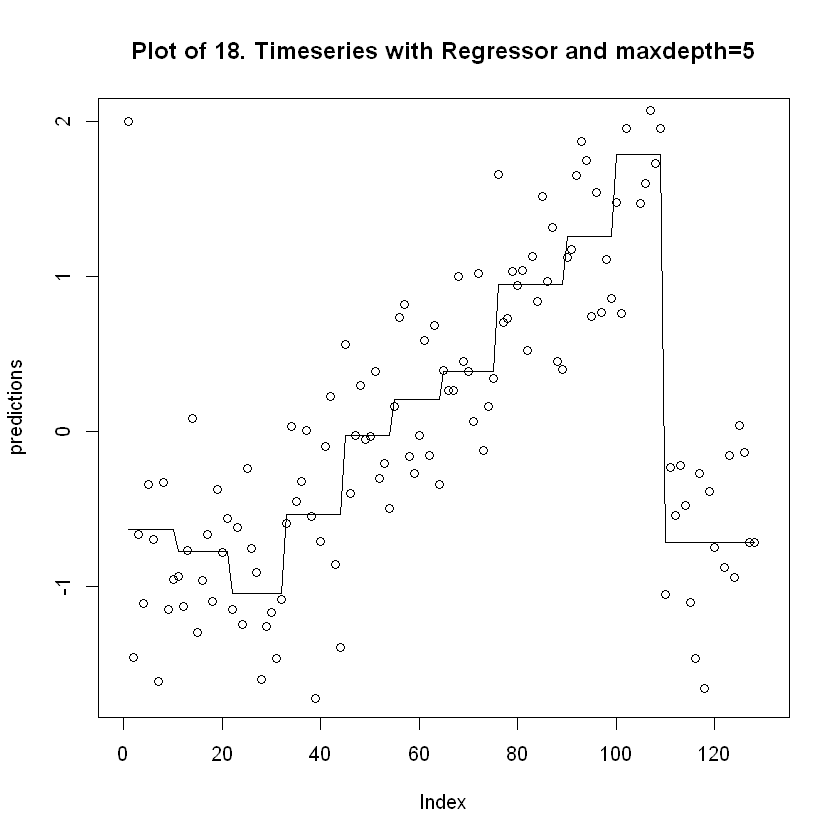

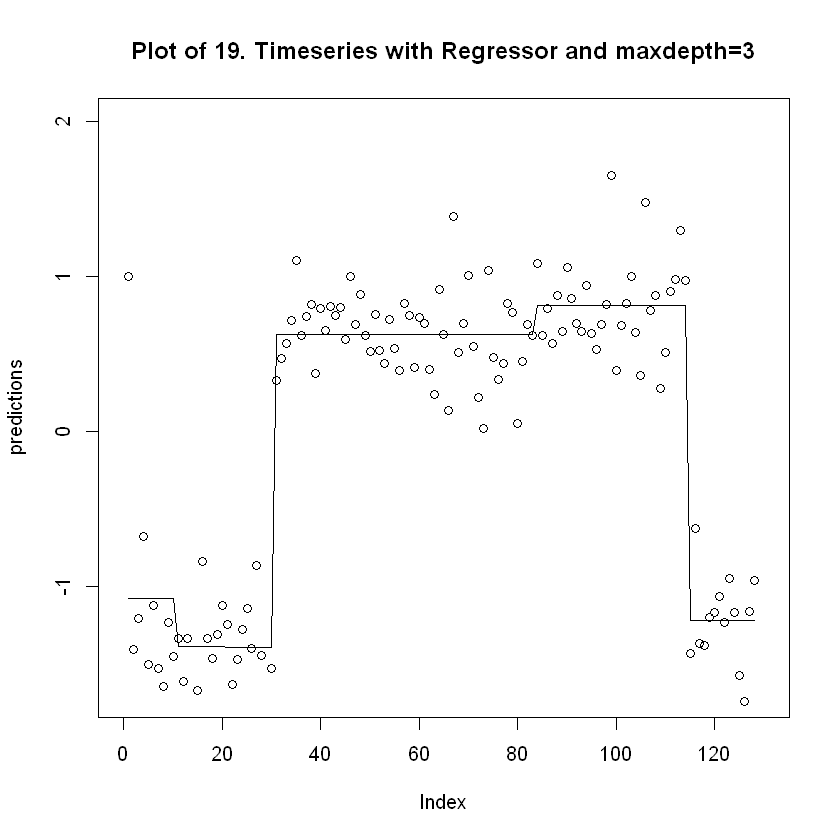

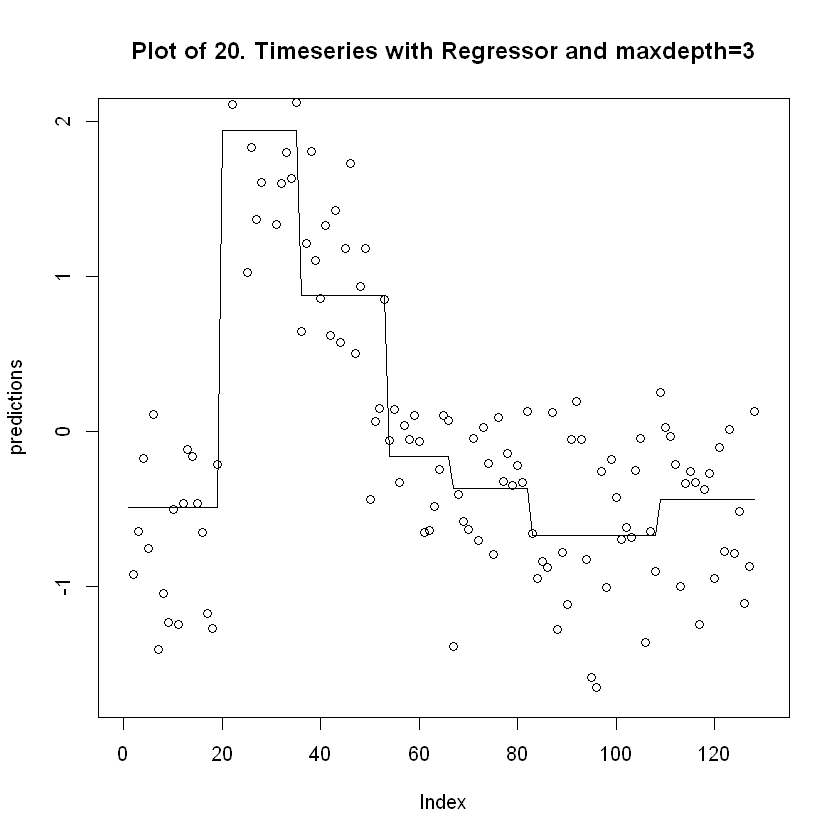

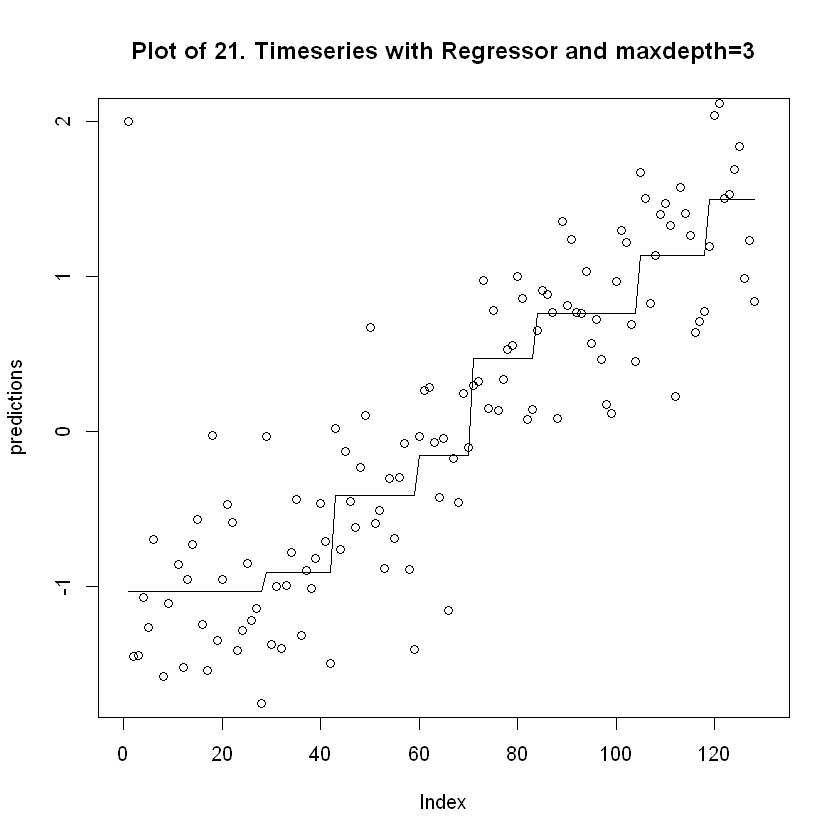

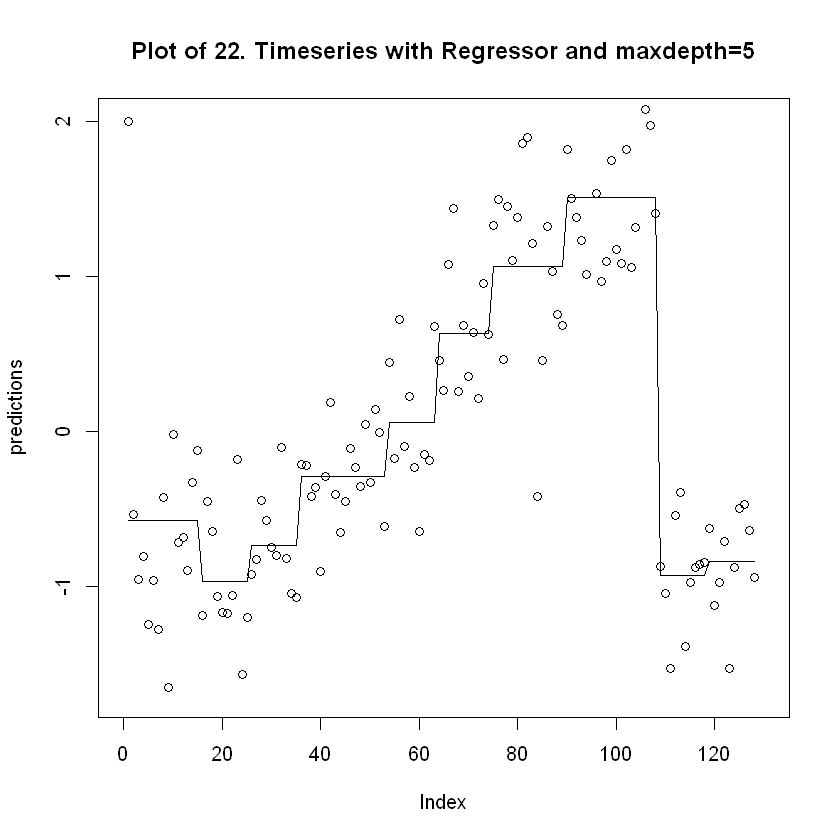

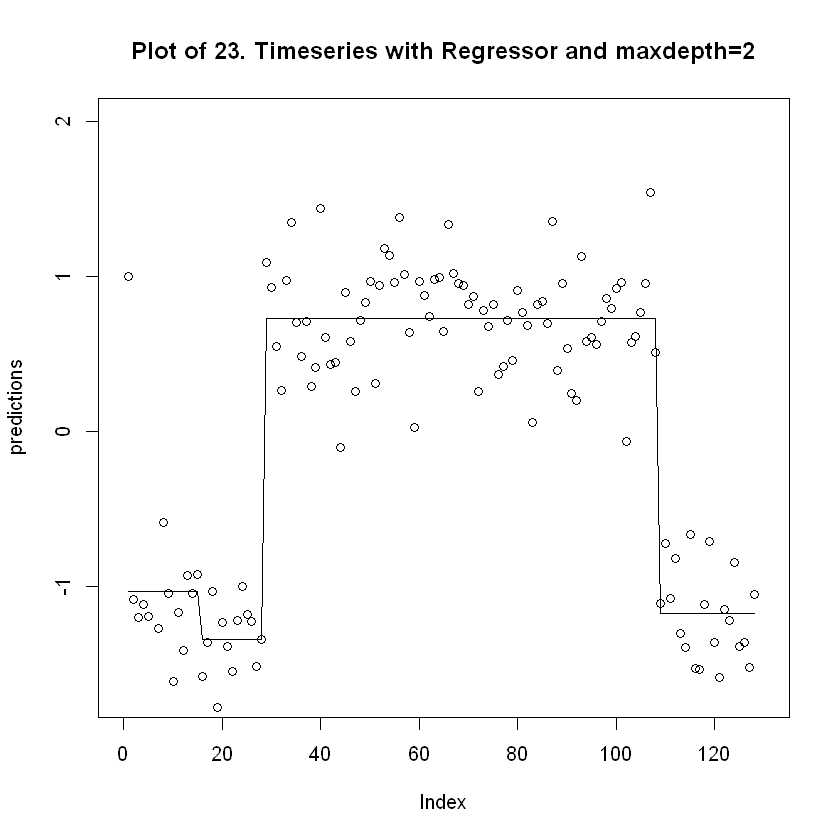

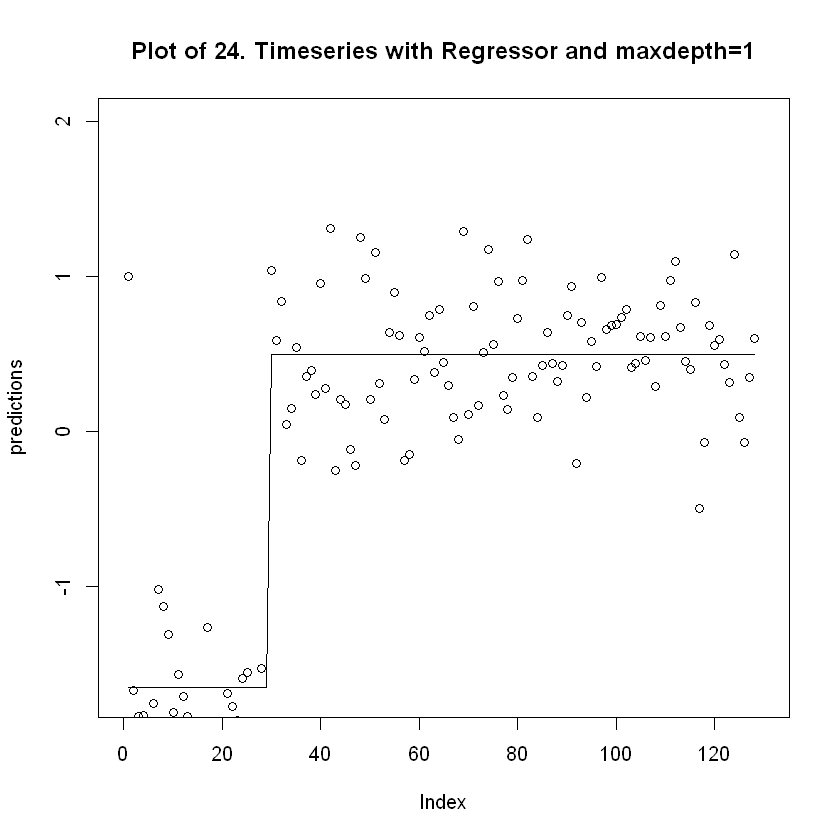

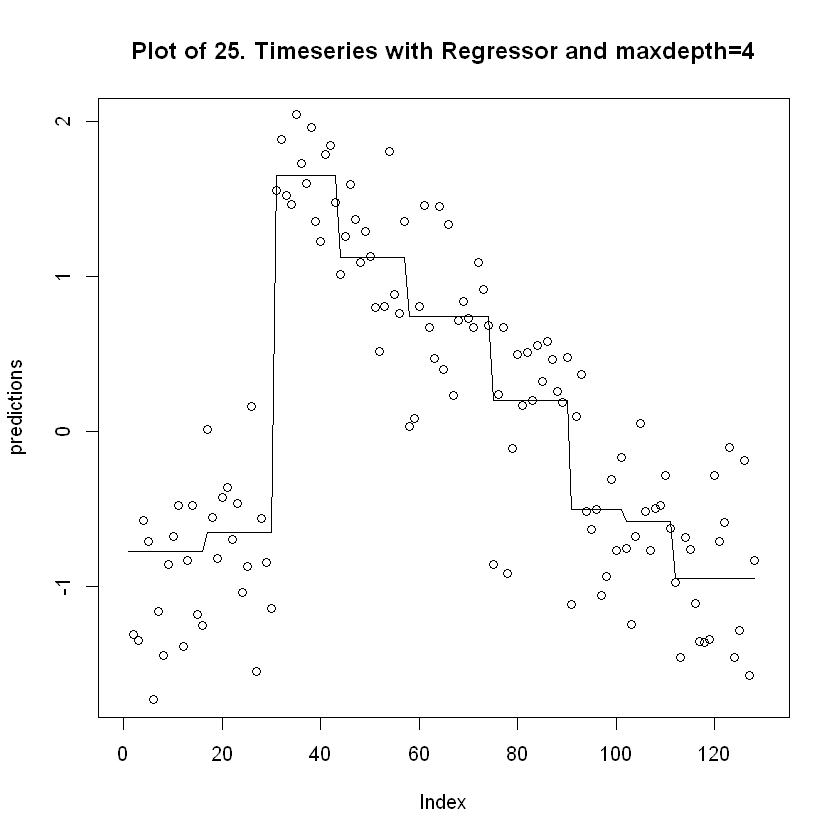

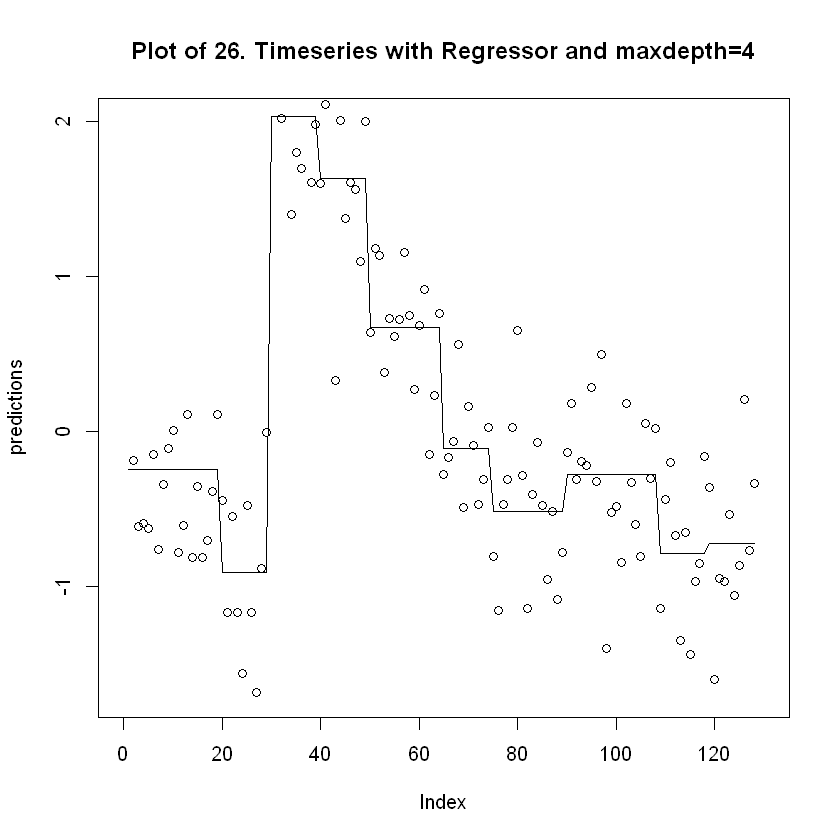

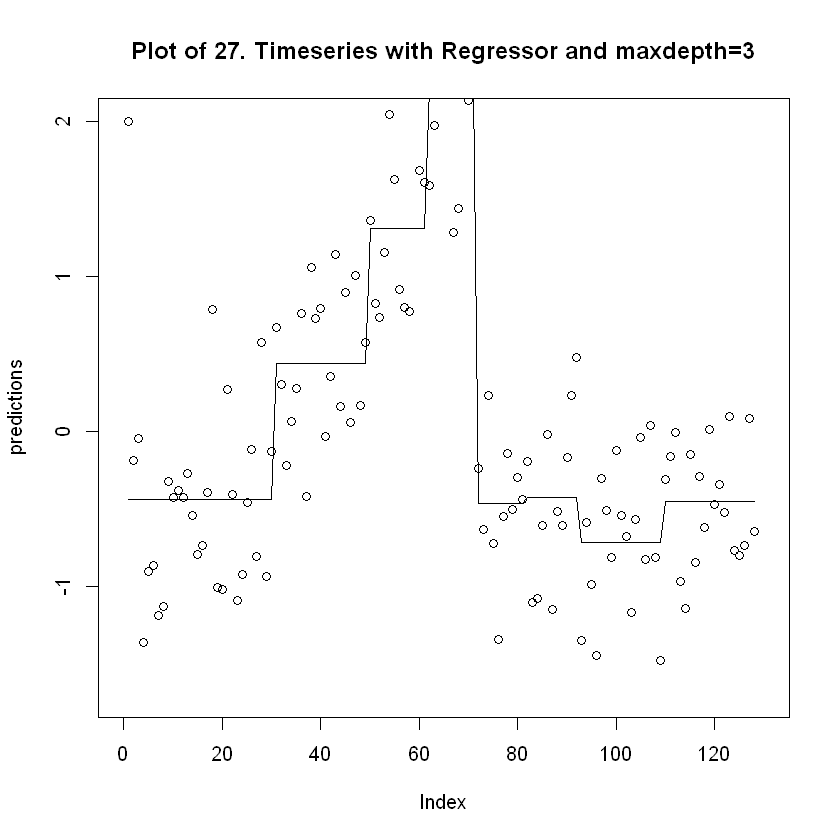

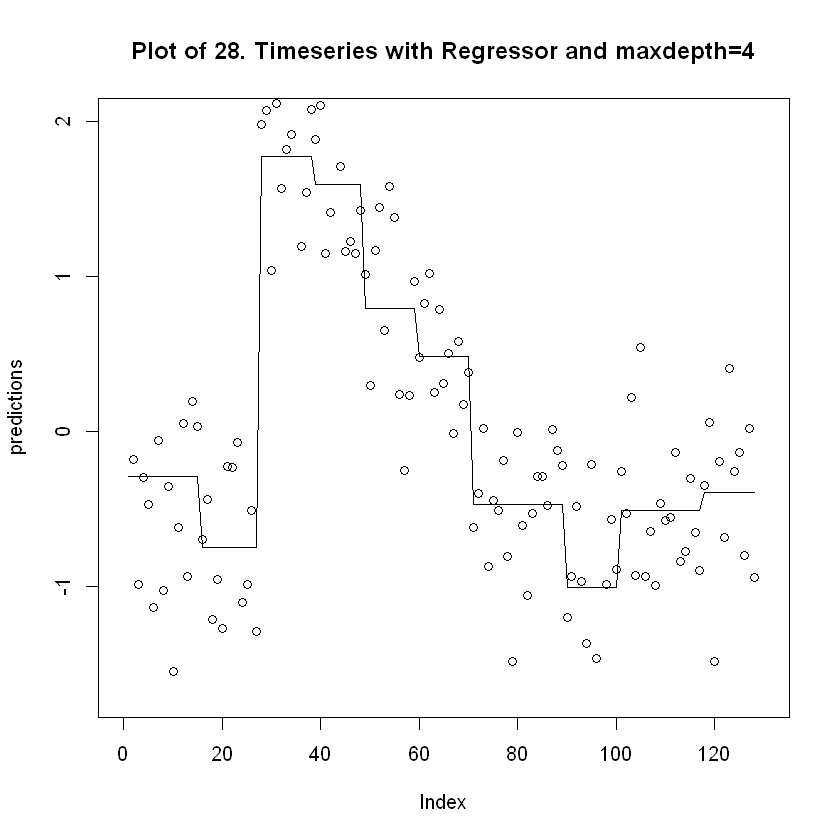

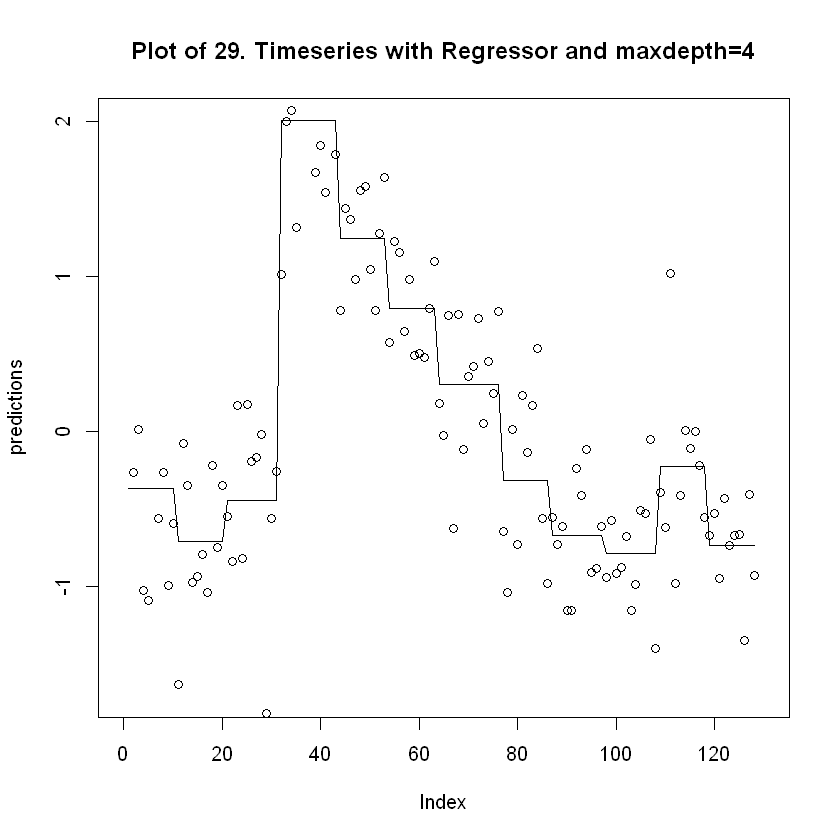

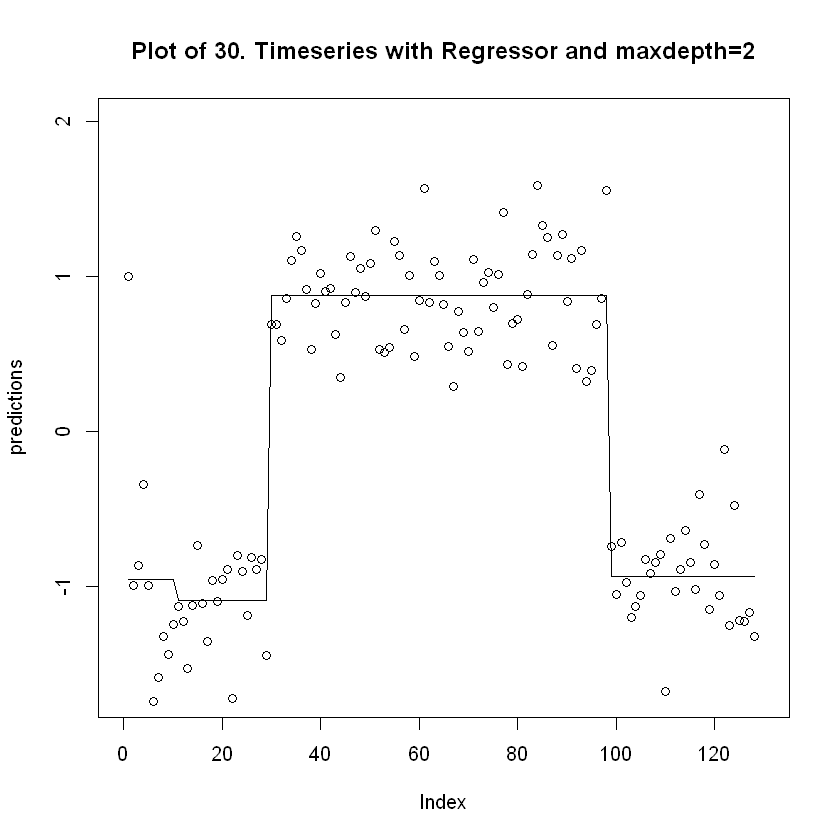

In [26]:
for(i in seq(1:30)){  
    regression_results[[i]]=regression_function(train, i)
}

By looking at plots, it can be said that generalization of the class of time-series was achieved in this model. In addition, this generalization may cause a loss in terms of closeness of lines to points. Meanwhile, this representation can be preferred to fused lasso if we want to more generalized representation compared to fused lasso. In general, 4-5 lines were enough to represent these timeseries in Regressor Tree Model with a tuned max_depth parameter.

In [27]:
for(i in seq(1:30)){
    print(paste0(i,". Timeseries"))
    print(regression_results[[i]][[1]])
    cat(paste0("By considering RMSE Value, the best Max Depth Parameter: ", which.min(regression_results[[i]]$RMSE),"for ",
          i, ".Timeseries \n\n"))
}

[1] "1. Timeseries"
     n       mean       sd    FBias     MAPE     RMSE      MAD     WMAPE
1: 128 0.01065383 10.29315 21.49203 7.829556 2.277579 6.703218 202.78260
2: 128 0.01065383 10.29315 26.23742 4.475559 1.030317 2.687912  85.44759
3: 128 0.01065383 10.29315 27.88158 4.428331 1.039888 2.713523  85.05516
4: 128 0.01065383 10.29315 27.00000 4.460407 1.038501 2.780869  86.66474
5: 128 0.01065383 10.29315 27.13154 4.450938 1.037014 2.775027  87.29551
   max_depth
1:         1
2:         2
3:         3
4:         4
5:         5
By considering RMSE Value, the best Max Depth Parameter: for 1.Timeseries 

[1] "2. Timeseries"
     n       mean       sd      FBias      MAPE     RMSE      MAD     WMAPE
1: 128 0.02268789 10.23826   9.833593  8.648465 1.979136 5.192381 -685.7847
2: 128 0.02268789 10.23826 -58.402068  9.857764 1.132407 3.065501 -400.5138
3: 128 0.02268789 10.23826 -58.513762 10.106603 1.153101 3.102030 -387.3366
4: 128 0.02268789 10.23826 -51.365294 10.463572 1.183861 3.20942

In order to inspect performance of the models with different max_depth parameters for each timeseries, this dataframes can be controlled. In addition, The best max depth information and number of existing timeseries were also mention close to the dataframes.

<a id="4"></a>
# Task 3: Performance Comparison by Boxplot

As mentioned in introduction, performance comparison will be tried by considering MSE values of predictions for each timeseries. In addition, a boxplot will be plotted to compare performance of models in terms of how much predictions close to actual values. 

In [28]:
head(train)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129
1,-0.4642765,-0.5550479,-0.84284310,-0.86589548,-0.9363963,-0.8172700,-0.2636122,-1.25804830,-1.2503934,...,-1.3310856,-1.0837000,-1.0179615,-0.9160287,-1.1342892,-0.9202237,-0.7893615,-0.6387058,-0.9636643,-1.24516910
1,-0.8969721,-0.6856855,-1.35138180,-1.45866680,-1.1653456,-1.4039293,-1.8217996,-0.83160109,-1.0163124,...,-1.0625534,-1.5686762,-1.3640403,-1.1551774,-0.9958611,-1.1637529,-0.9165233,-0.5820981,-1.2590094,-1.39252410
1,-0.4646960,-0.5677389,-0.03202276,-0.63504562,-0.6028255,-0.2668563,-0.2670613,-0.93104230,-0.4493819,...,-0.2867213,-0.6371576,-0.1552602,-0.6881293,-0.8856088,-0.7662393,-0.8653152,-0.2844857,-0.6878891,-0.88760835
3,-0.1871897,-0.6208077,-0.81566070,-0.52139796,-0.7904229,-0.9675174,-1.4870063,-0.27788714,-0.8350747,...,-0.9086154,-0.7262865,0.1837776,-0.7374441,-1.1139967,-0.3939866,-0.5878895,-0.6082319,-0.6364646,-0.34902865
2,-1.1360166,-1.3191953,-1.84462380,-0.78869178,-0.2517154,-1.4876032,-0.6687641,-0.34036037,-1.0463815,...,-1.1829110,-1.0735136,-1.6113624,-1.0643404,-0.9707364,-0.8272809,-0.9535377,-1.2701854,-1.7427579,-0.92594391
2,-0.5687087,-0.8881180,-0.04797658,-0.03803611,-0.4830683,-1.0946887,-0.9534529,-0.03000688,-0.7954546,...,-0.9907398,0.5183746,-0.2285628,-0.5652887,-0.6429980,-1.1094278,-0.1010932,-0.2339490,-0.6198269,-0.08306189


## Obtained Values from Fused Lasso

To understand performance of the fused lasso model, all predictions for each timeseries will be stored in fused_dt. fused_results represents returned values from the Fused Lasso models.

In [29]:
fused_list=vector("list", 30)

In [30]:
for(i in seq(1:30)){
    fused_list[[i]]=as.data.table(t(predict(fused_results[[i]][[1]], fused_results[[i]][[2]]$lambda.min)$fit))
}

In [31]:
fused_dt=rbindlist(fused_list)
fused_dt

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128
-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.9745224,-0.9745224,-0.9745224,...,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423
-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,...,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790
-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.6247595,-0.6247595,-0.6247595,...,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623
-0.6698067,-0.6698067,-0.6698067,-0.6698067,-0.6698067,-0.6698067,-0.6698067,-0.6698067,-0.6698067,-0.6698067,...,-0.4690187,-0.4690187,-0.4690187,-0.4690187,-0.4690187,-0.4690187,-0.4690187,-0.4690187,-0.4690187,-0.4690187
-1.0927387,-1.0927387,-1.0927387,-0.9361692,-0.9361692,-0.9361692,-0.9361692,-0.9361692,-0.9361692,-0.9361692,...,-1.1088608,-1.1088608,-1.1088608,-1.1088608,-1.1088608,-1.1088608,-1.1088608,-1.1088608,-1.1088608,-1.1088608
-0.5003466,-0.5003466,-0.5003466,-0.5003466,-0.5003466,-0.5003466,-0.5003466,-0.5003466,-0.5003466,-0.5003466,...,-0.4375492,-0.4375492,-0.4375492,-0.4375492,-0.4375492,-0.4375492,-0.4375492,-0.4375492,-0.4375492,-0.4375492
-1.1715456,-1.1715456,-1.1715456,-1.1715456,-1.1244566,-1.1244566,-1.1244566,-1.1244566,-1.1244566,-1.1244566,...,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410
-0.6154343,-0.6154343,-0.6154343,-0.6154343,-0.6154343,-0.6154343,-0.6154343,-0.6154343,-0.6154343,-0.6154343,...,-0.6402687,-0.6402687,-0.6402687,-0.6402687,-0.6402687,-0.6402687,-0.6402687,-0.6631938,-0.6631938,-0.6631938
-0.8066349,-0.8066349,-0.8066349,-0.8066349,-0.8066349,-0.8066349,-0.8066349,-0.8066349,-0.8066349,-0.8066349,...,-0.7520592,-0.7520592,-0.7520592,-0.7520592,-0.7520592,-0.7520592,-0.7520592,-0.7520592,-0.7520592,-0.7520592
-1.0313383,-0.9384036,-0.9384036,-0.9384036,-1.2528852,-1.2528852,-1.2528852,-1.2528852,-1.1027905,-1.1027905,...,-1.0123148,-1.0206394,-1.0206394,-1.2798399,-1.2798399,-1.0336173,-1.0336173,-1.0336173,-1.1155947,-1.1155947


## Obtained Values from Regressors

To understand performance of the Regression Tree model, all predictions for each timeseries will be stored in regressor_dt. regression_results represents returned values from the Fused Lasso models.

In [32]:
regressor_list=vector("list", 30)

In [33]:
for(i in seq(1:30)){
    regressor_list[[i]]=as.data.table(t(regression_results[[i]][[2]]))
}

In [34]:
regressor_dt=rbindlist(regressor_list)
regressor_dt

1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
-0.8410389,-0.8410389,-0.8410389,-0.8410389,-0.8410389,-0.8410389,-0.8410389,-0.8410389,-0.8410389,-0.8410389,...,-0.9268190,-0.9268190,-0.9268190,-0.9268190,-0.9268190,-0.9268190,-0.9268190,-0.9268190,-0.9268190,-0.9268190
-1.0341753,-1.0341753,-1.0341753,-1.0341753,-1.0341753,-1.0341753,-1.0341753,-1.0341753,-1.0341753,-1.0341753,...,-1.1044832,-1.1044832,-1.1044832,-1.1044832,-1.1044832,-1.1044832,-1.1044832,-1.1044832,-1.1044832,-1.1044832
-0.5711000,-0.5711000,-0.5711000,-0.5711000,-0.5711000,-0.5711000,-0.5711000,-0.5711000,-0.5711000,-0.5711000,...,-0.6409625,-0.6409625,-0.6409625,-0.6409625,-0.6409625,-0.6409625,-0.6409625,-0.6409625,-0.6409625,-0.6409625
-0.3138521,-0.3138521,-0.3138521,-0.3138521,-0.3138521,-0.3138521,-0.3138521,-0.3138521,-0.3138521,-0.3138521,...,-0.4434685,-0.4434685,-0.4434685,-0.4434685,-0.4434685,-0.4434685,-0.4434685,-0.4434685,-0.4434685,-0.4434685
-0.6541423,-0.6541423,-0.6541423,-0.6541423,-0.6541423,-0.6541423,-0.6541423,-0.6541423,-0.6541423,-0.6541423,...,-1.2293144,-1.2293144,-1.2293144,-1.2293144,-1.2293144,-1.2293144,-1.2293144,-1.2293144,-1.2293144,-1.2293144
-0.2899511,-0.2899511,-0.2899511,-0.2899511,-0.2899511,-0.2899511,-0.2899511,-0.2899511,-0.2899511,-0.2899511,...,-0.3929675,-0.3929675,-0.3929675,-0.3929675,-0.3929675,-0.3929675,-0.3929675,-0.3929675,-0.3929675,-0.3929675
-1.0501874,-1.0501874,-1.0501874,-1.0501874,-1.0501874,-1.0501874,-1.0501874,-1.0501874,-1.0501874,-1.0501874,...,-0.9059874,-0.9059874,-0.9059874,-0.9059874,-0.9059874,-0.9059874,-0.9059874,-0.9059874,-0.9059874,-0.9059874
-0.4597361,-0.4597361,-0.4597361,-0.4597361,-0.4597361,-0.4597361,-0.4597361,-0.4597361,-0.4597361,-0.4597361,...,-0.7070520,-0.7070520,-0.7070520,-0.7070520,-0.7070520,-0.7070520,-0.7070520,-0.7070520,-0.7070520,-0.7070520
-0.5113501,-0.5113501,-0.5113501,-0.5113501,-0.5113501,-0.5113501,-0.5113501,-0.5113501,-0.5113501,-0.5113501,...,-0.8273659,-0.8273659,-0.8273659,-0.8273659,-0.8273659,-0.8273659,-0.8273659,-0.8273659,-0.8273659,-0.8273659
-0.8861423,-0.8861423,-0.8861423,-0.8861423,-0.8861423,-0.8861423,-0.8861423,-0.8861423,-0.8861423,-0.8861423,...,-1.1428111,-1.1428111,-1.1428111,-1.1428111,-1.1428111,-1.1428111,-1.1428111,-1.1428111,-1.1428111,-1.1428111


## Performance Calculation

In [61]:
library(hydroGOF)

In [36]:
performance_list=vector("list", 30)

performance_list includes mse values of each indexes for both fused lasso and regressor tree

## MSE Calculation Function

In [56]:
mse_calculator=function(index, train, fused, regressor){
    fused_lasso_performance=sum(mse(train[1], fused[1]))/128
    regressor_performance=sum(mse(train[1], regressor[1]))/128
    perf_dt=data.frame(index, fused_lasso_performance, regressor_performance)
    return(perf_dt)
}

## Performance of each timeseries

In [57]:
for(i in seq(1:30)){
    performance_list[[i]]=mse_calculator(i, train_perf[i], fused_dt[i], regressor_dt[i])   
}

## Obtained Results

In [58]:
performance_dt=rbindlist(performance_list)
performance_dt

index,fused_lasso_performance,regressor_performance
1,0.07102399,0.1804780
2,0.10601782,0.1708229
3,0.07415701,0.1346419
4,0.15575689,0.3018673
5,0.15307345,0.2561870
6,0.19777540,0.2915757
7,0.10559115,0.1703902
8,0.18519098,0.2538997
9,0.14116961,0.2042506
10,0.02774909,0.1630095


## Boxplot

Boxplot to display performance of the models

In [59]:
box_plot_dt <- melt(performance_dt[,c(2,3)], id.vars=NULL)

Warning message in melt.data.table(performance_dt[, c(2, 3)], id.vars = NULL):
"id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future."

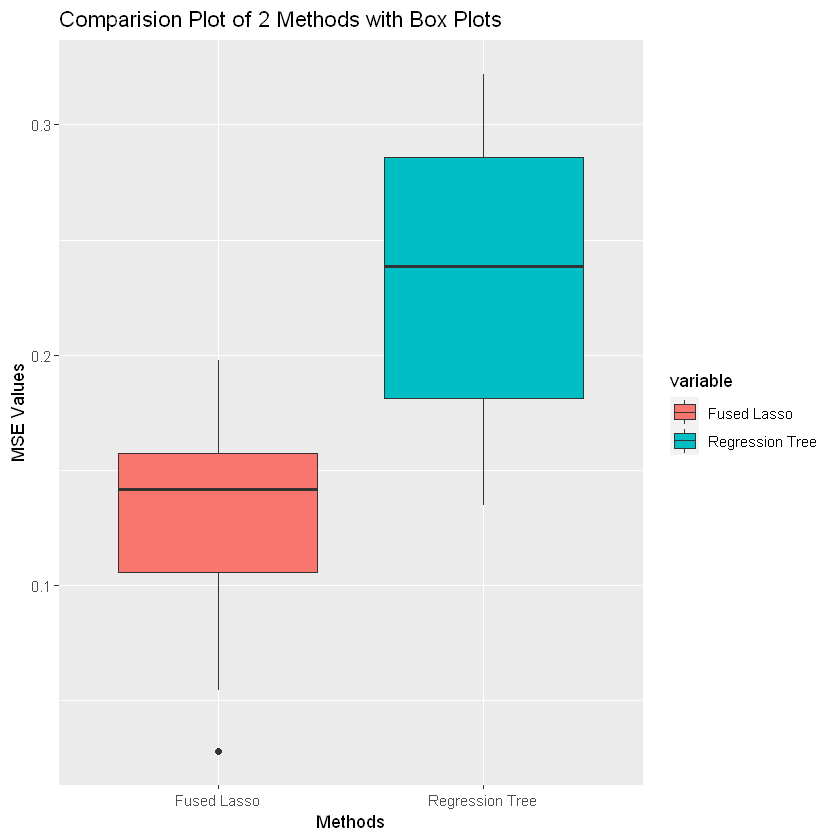

In [60]:
box_plot_dt %>%
  ggplot( aes(x=variable, y=value, fill=variable)) +
    geom_boxplot() +
    ggtitle("Comparision Plot of 2 Methods with Box Plots") +
    xlab("Methods")+ylab("MSE Values")+
    scale_fill_discrete(labels = c("Fused Lasso", "Regression Tree"))+
    scale_x_discrete(labels= c("fused_lasso_performance"="Fused Lasso","regressor_performance"="Regression Tree"))


By looking boxplot, fused lasso is a better option to find closer lines to points of timeseries. In addition, variance in the perfomance is also better in the fused lasso model. Moreover, mean value of MSE value is much better in fused lasso model. So, it can be said that fused lasso is the best option in terms of MSE values. 

<a id="5"></a>
#  Task 4: Accuracy with 1-NN

For this task, the performance of the models will be analyzed from a different perspective. Namely, rather than controlling how much lines are close to time series values, how to line represents the class can be understood by looking at the performance of 1-NN(like differentiation). In both models, euclidean distance was calculated and stored by euc_dist_fused and euc_dist_regressor matrices. **The display is not required from the Homework description** for them, so matrices will not be displayed.

In [42]:
timeseries_class=as.matrix(train[,1])

In order to penalyze diagonal values, a large number is selected as 10000

In [52]:
large_number=10000

## Raw Dataset

In [53]:
euc_dist_raw=as.matrix(dist(train_perf))

diag(euc_dist_raw)=large_number

neighborhood_raw=apply(euc_dist_raw,1,order)

predicted_raw=timeseries_class[neighborhood_raw[1,]]

table(timeseries_class,predicted_raw)

acc_raw=sum(timeseries_class==predicted_raw)/length(predicted_raw)
print(paste0("The accuracy of Raw Dataset: ", acc_raw))

                predicted_raw
timeseries_class  1  2  3
               1  8  0  2
               2  1 11  0
               3  2  0  6

[1] "The accuracy of Raw Dataset: 0.833333333333333"


This raw data has a lot of noise, so it is hard to classify these raw values by using 1-NN algorithm. 0.8333 was achieved by raw data.

## Fused Lasso Accuracy

In [54]:
euc_dist_fused=as.matrix(dist(fused_dt))

diag(euc_dist_fused)=large_number

neighborhood_fused=apply(euc_dist_fused,1,order)

predicted_fused=timeseries_class[neighborhood_fused[1,]]

table(timeseries_class,predicted_fused)

acc_lasso=sum(timeseries_class==predicted_fused)/length(predicted_fused)
print(paste0("The accuracy of Fused Lasso Model: ", acc_lasso))

                predicted_fused
timeseries_class  1  2  3
               1  8  0  2
               2  1 11  0
               3  1  0  7

[1] "The accuracy of Fused Lasso Model: 0.866666666666667"


For fused lasso model, lambda was selected with lambda.min value, which may cause detailed representations for timeseries. So, it is hard to classify these types of a lot of differentiated representations. This fact can be understood by result of 1-NN of Fused Lasso. My increasing the lambda this situation can be fixed but an increase will be obtained in the MSE values.

## Regressor Accuracy

In [55]:
euc_dist_regressor=as.matrix(dist(regressor_dt))

diag(euc_dist_regressor)=large_number

neighborhood_regressor=apply(euc_dist_regressor,1,order)

predicted_regressor=timeseries_class[neighborhood_regressor[1,]]

table(timeseries_class,predicted_regressor)

acc_fused=sum(timeseries_class==predicted_regressor)/length(predicted_regressor)
print(paste0("The accuracy of Regressor Tree Model: ", acc_fused))

                predicted_regressor
timeseries_class  1  2  3
               1  8  0  2
               2  0 12  0
               3  1  0  7

[1] "The accuracy of Regressor Tree Model: 0.9"


For fused Regressor Tree Model, more generalized representation was achieved by having high MSE values. However, this generalization caused better opportunity for classification, which can be observed by looking the accuracy result of 1-NN with Regressor Tree Data.

<a id="6"></a>
# Last Comment and Conclusion

In this homework, 2 different representation types were tried to understand advantages/disadvantages of the Fused Lasso and Regressor Tress. In addition, a custom validation was tried in Regressor Tree models, which was existed in genlasso packages so this manuel validation didn't tried in this model. By looking plots, all models have good lines to represents timeseries. Moreover, In addition, different parameters were tuned for this two model. In the first model lambda values, in the second models max_depth values were tuned. 

After ploting the predictions, these values were controlled in 2 different perspectives to understand the performance of the models. In the first task, MSE values were inspected to control how much lines are close to actual points for each time series. Namely, 30 different values are obtained for each models to control performance. In addition, Boxplot was used to understand the MSE values of the models. In addition, time representation is an important knowledge to make them generalized. However, this transformation can cause extra problems. In task 4, we controlled models in a differnt perspective like classification to control whether there is an extra problem in terms of classification performance of the representation. At the end, more generalized representation gave better opportunity to classify datasets by considering their class information. In addition, lambda values can be increased to get more generalized representation with higher MSE values.